In [1]:
import numpy as np
import csv
from utils_predictions_manipulation import*
from utils_nans_manipulation import*
from cross_validation import*

# Model testing on training data

## Loading and cleaning data

### Loading training data

In [2]:
dtypes = "i8,S5,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,i8,f8,f8,f8,f8,f8,f8,f8"
with open('Data/train.csv', 'r') as f:
    reader = csv.reader(f, delimiter=',')
    headerstrain = next(reader)
datatrain = np.genfromtxt('Data/train.csv', delimiter=",",names=True, dtype=dtypes)

### Format training data, add fake feature

In [3]:
# Building y
Y_total = np.array((datatrain['Prediction']==b's').astype(int))

# Filtering out useless data from x
names = list(datatrain.dtype.names)[2:]
datatrain_filtered = datatrain[names]

# Building x
x = np.empty((len(datatrain_filtered),len(datatrain_filtered[0].item())))
for i in range(len(datatrain_filtered)):
    x[i] = np.array(datatrain_filtered[i].item()).reshape(1,-1)
    
# Adding 1s at the beginning
X_total = np.c_[np.ones(len(x)),x]

### Separating data points with and without NaNs

In [4]:
# Replacing undefined data with NaNs

X_nans = replace_bad_data_with_nans(X_total, -999)

In [5]:
# Splitting the dataset based on presence of NaNs

X_no_nans, Y_no_nans = delete_nan_points(X_nans, Y_total)
X_with_nans, Y_with_nans = store_nan_points(X_nans, Y_total)

In [6]:
# Replacing NaNs with median

X_cleaned = replace_nans_with_median(X_with_nans, threshold=0.5)
Y_cleaned = Y_with_nans  # As we do not delete any data point, Y is the same for the cleaned data

### Cleaned Data names in the cell below!

In [7]:
print(X_no_nans.shape, Y_no_nans.shape)
print(X_cleaned.shape, Y_cleaned.shape)

(68114, 31) (68114,)
(181886, 21) (181886,)


# LPM

## Gradient Descent

In [23]:
meanacc_dtest_gd = []
meanacc_dtrain_gd = []

from time import time

start = time()
# Execute for data originally with no NaNs
dtmp_tr,dtmp_te=cross_validation(Y_no_nans,X_no_nans,k_fold=4,seed=1, function_name='gd', gamma=0.000002, max_iters=1000)
meanacc_dtest_gd.append(dtmp_te)
meanacc_dtrain_gd.append(dtmp_tr)

# Execute for data originally with NaNs
dtmp_tr,dtmp_te=cross_validation(Y_cleaned,X_cleaned,k_fold=4,seed=1, function_name='gd', gamma=0.000002, max_iters=1000)
meanacc_dtest_gd.append(dtmp_te)
meanacc_dtrain_gd.append(dtmp_tr)
end = time()

print(end - start)

Gradient Descent(0/999): loss=0.2344471850285804
Gradient Descent(1/999): loss=0.12572120799910913
Gradient Descent(2/999): loss=0.1246789471861695
Gradient Descent(3/999): loss=0.12434172030491897
Gradient Descent(4/999): loss=0.1240301876036757
Gradient Descent(5/999): loss=0.12373514673728662
Gradient Descent(6/999): loss=0.12345326030185856
Gradient Descent(7/999): loss=0.1231823034183267
Gradient Descent(8/999): loss=0.12292075770498662
Gradient Descent(9/999): loss=0.12266756497252462
Gradient Descent(10/999): loss=0.12242196769899616
Gradient Descent(11/999): loss=0.12218340561150044
Gradient Descent(12/999): loss=0.12195144861125863
Gradient Descent(13/999): loss=0.12172575324182368
Gradient Descent(14/999): loss=0.12150603440949644
Gradient Descent(15/999): loss=0.12129204698575002
Gradient Descent(16/999): loss=0.1210835738132422
Gradient Descent(17/999): loss=0.12088041786231343
Gradient Descent(18/999): loss=0.12068239707851944
Gradient Descent(19/999): loss=0.1204893409758

Gradient Descent(180/999): loss=0.11101259498711236
Gradient Descent(181/999): loss=0.11099490707279779
Gradient Descent(182/999): loss=0.11097736268295005
Gradient Descent(183/999): loss=0.11095995987147483
Gradient Descent(184/999): loss=0.11094269672668763
Gradient Descent(185/999): loss=0.11092557137056024
Gradient Descent(186/999): loss=0.11090858195798721
Gradient Descent(187/999): loss=0.11089172667607208
Gradient Descent(188/999): loss=0.11087500374343248
Gradient Descent(189/999): loss=0.11085841140952336
Gradient Descent(190/999): loss=0.11084194795397799
Gradient Descent(191/999): loss=0.11082561168596654
Gradient Descent(192/999): loss=0.11080940094357089
Gradient Descent(193/999): loss=0.11079331409317568
Gradient Descent(194/999): loss=0.11077734952887539
Gradient Descent(195/999): loss=0.11076150567189623
Gradient Descent(196/999): loss=0.11074578097003285
Gradient Descent(197/999): loss=0.1107301738970996
Gradient Descent(198/999): loss=0.11071468295239535
Gradient Desc

Gradient Descent(364/999): loss=0.10907786820745072
Gradient Descent(365/999): loss=0.10907130390368627
Gradient Descent(366/999): loss=0.10906476322208969
Gradient Descent(367/999): loss=0.1090582460042829
Gradient Descent(368/999): loss=0.10905175209355279
Gradient Descent(369/999): loss=0.109045281334829
Gradient Descent(370/999): loss=0.10903883357466218
Gradient Descent(371/999): loss=0.10903240866120231
Gradient Descent(372/999): loss=0.1090260064441774
Gradient Descent(373/999): loss=0.10901962677487283
Gradient Descent(374/999): loss=0.10901326950611039
Gradient Descent(375/999): loss=0.1090069344922283
Gradient Descent(376/999): loss=0.1090006215890609
Gradient Descent(377/999): loss=0.10899433065391922
Gradient Descent(378/999): loss=0.10898806154557139
Gradient Descent(379/999): loss=0.10898181412422354
Gradient Descent(380/999): loss=0.10897558825150098
Gradient Descent(381/999): loss=0.10896938379042968
Gradient Descent(382/999): loss=0.10896320060541785
Gradient Descent(3

Gradient Descent(558/999): loss=0.108119589672934
Gradient Descent(559/999): loss=0.10811584064252516
Gradient Descent(560/999): loss=0.10811210062384388
Gradient Descent(561/999): loss=0.10810836958266003
Gradient Descent(562/999): loss=0.10810464748493806
Gradient Descent(563/999): loss=0.10810093429683519
Gradient Descent(564/999): loss=0.10809722998469984
Gradient Descent(565/999): loss=0.1080935345150701
Gradient Descent(566/999): loss=0.10808984785467202
Gradient Descent(567/999): loss=0.10808616997041808
Gradient Descent(568/999): loss=0.10808250082940567
Gradient Descent(569/999): loss=0.1080788403989155
Gradient Descent(570/999): loss=0.10807518864641007
Gradient Descent(571/999): loss=0.1080715455395322
Gradient Descent(572/999): loss=0.10806791104610358
Gradient Descent(573/999): loss=0.10806428513412314
Gradient Descent(574/999): loss=0.10806066777176579
Gradient Descent(575/999): loss=0.10805705892738088
Gradient Descent(576/999): loss=0.10805345856949075
Gradient Descent(

Gradient Descent(752/999): loss=0.1075284592174605
Gradient Descent(753/999): loss=0.10752598488227612
Gradient Descent(754/999): loss=0.10752351528769138
Gradient Descent(755/999): loss=0.10752105041975173
Gradient Descent(756/999): loss=0.10751859026455689
Gradient Descent(757/999): loss=0.10751613480826082
Gradient Descent(758/999): loss=0.10751368403707122
Gradient Descent(759/999): loss=0.1075112379372493
Gradient Descent(760/999): loss=0.10750879649510957
Gradient Descent(761/999): loss=0.10750635969701954
Gradient Descent(762/999): loss=0.10750392752939941
Gradient Descent(763/999): loss=0.10750149997872191
Gradient Descent(764/999): loss=0.10749907703151189
Gradient Descent(765/999): loss=0.10749665867434614
Gradient Descent(766/999): loss=0.10749424489385316
Gradient Descent(767/999): loss=0.10749183567671285
Gradient Descent(768/999): loss=0.10748943100965622
Gradient Descent(769/999): loss=0.1074870308794652
Gradient Descent(770/999): loss=0.10748463527297243
Gradient Descen

Gradient Descent(945/999): loss=0.10712484597695777
Gradient Descent(946/999): loss=0.1071230797669036
Gradient Descent(947/999): loss=0.10712131636403957
Gradient Descent(948/999): loss=0.10711955576133594
Gradient Descent(949/999): loss=0.10711779795178601
Gradient Descent(950/999): loss=0.10711604292840593
Gradient Descent(951/999): loss=0.10711429068423467
Gradient Descent(952/999): loss=0.10711254121233388
Gradient Descent(953/999): loss=0.10711079450578793
Gradient Descent(954/999): loss=0.10710905055770364
Gradient Descent(955/999): loss=0.10710730936121028
Gradient Descent(956/999): loss=0.10710557090945948
Gradient Descent(957/999): loss=0.10710383519562515
Gradient Descent(958/999): loss=0.10710210221290337
Gradient Descent(959/999): loss=0.1071003719545123
Gradient Descent(960/999): loss=0.10709864441369212
Gradient Descent(961/999): loss=0.10709691958370497
Gradient Descent(962/999): loss=0.10709519745783473
Gradient Descent(963/999): loss=0.10709347802938705
Gradient Desce

Gradient Descent(116/999): loss=0.11234123837313603
Gradient Descent(117/999): loss=0.11230710851650244
Gradient Descent(118/999): loss=0.11227338242441638
Gradient Descent(119/999): loss=0.1122400526246067
Gradient Descent(120/999): loss=0.11220711182606401
Gradient Descent(121/999): loss=0.11217455291372025
Gradient Descent(122/999): loss=0.11214236894330429
Gradient Descent(123/999): loss=0.11211055313636642
Gradient Descent(124/999): loss=0.11207909887546666
Gradient Descent(125/999): loss=0.11204799969952056
Gradient Descent(126/999): loss=0.11201724929929728
Gradient Descent(127/999): loss=0.11198684151306464
Gradient Descent(128/999): loss=0.11195677032237587
Gradient Descent(129/999): loss=0.11192702984799334
Gradient Descent(130/999): loss=0.11189761434594407
Gradient Descent(131/999): loss=0.1118685182037032
Gradient Descent(132/999): loss=0.11183973593649998
Gradient Descent(133/999): loss=0.11181126218374311
Gradient Descent(134/999): loss=0.11178309170556022
Gradient Desce

Gradient Descent(305/999): loss=0.10920067382124397
Gradient Descent(306/999): loss=0.10919211620037858
Gradient Descent(307/999): loss=0.10918359685363185
Gradient Descent(308/999): loss=0.109175115459988
Gradient Descent(309/999): loss=0.10916667170232218
Gradient Descent(310/999): loss=0.10915826526734415
Gradient Descent(311/999): loss=0.10914989584554267
Gradient Descent(312/999): loss=0.10914156313113083
Gradient Descent(313/999): loss=0.10913326682199215
Gradient Descent(314/999): loss=0.10912500661962796
Gradient Descent(315/999): loss=0.10911678222910491
Gradient Descent(316/999): loss=0.10910859335900419
Gradient Descent(317/999): loss=0.10910043972137079
Gradient Descent(318/999): loss=0.10909232103166414
Gradient Descent(319/999): loss=0.10908423700870915
Gradient Descent(320/999): loss=0.10907618737464818
Gradient Descent(321/999): loss=0.10906817185489404
Gradient Descent(322/999): loss=0.10906019017808306
Gradient Descent(323/999): loss=0.10905224207602976
Gradient Desce

Gradient Descent(493/999): loss=0.10804129393179074
Gradient Descent(494/999): loss=0.10803677123294206
Gradient Descent(495/999): loss=0.10803226066015485
Gradient Descent(496/999): loss=0.10802776215950827
Gradient Descent(497/999): loss=0.10802327567745625
Gradient Descent(498/999): loss=0.10801880116082346
Gradient Descent(499/999): loss=0.10801433855680181
Gradient Descent(500/999): loss=0.10800988781294656
Gradient Descent(501/999): loss=0.10800544887717277
Gradient Descent(502/999): loss=0.1080010216977518
Gradient Descent(503/999): loss=0.1079966062233076
Gradient Descent(504/999): loss=0.1079922024028133
Gradient Descent(505/999): loss=0.10798781018558777
Gradient Descent(506/999): loss=0.10798342952129215
Gradient Descent(507/999): loss=0.1079790603599265
Gradient Descent(508/999): loss=0.1079747026518265
Gradient Descent(509/999): loss=0.10797035634766011
Gradient Descent(510/999): loss=0.10796602139842441
Gradient Descent(511/999): loss=0.10796169775544225
Gradient Descent(

Gradient Descent(689/999): loss=0.10733612845048172
Gradient Descent(690/999): loss=0.10733326441406835
Gradient Descent(691/999): loss=0.107330406240822
Gradient Descent(692/999): loss=0.10732755391206843
Gradient Descent(693/999): loss=0.10732470740921436
Gradient Descent(694/999): loss=0.10732186671374676
Gradient Descent(695/999): loss=0.10731903180723258
Gradient Descent(696/999): loss=0.10731620267131817
Gradient Descent(697/999): loss=0.10731337928772887
Gradient Descent(698/999): loss=0.10731056163826849
Gradient Descent(699/999): loss=0.10730774970481896
Gradient Descent(700/999): loss=0.1073049434693397
Gradient Descent(701/999): loss=0.10730214291386739
Gradient Descent(702/999): loss=0.10729934802051525
Gradient Descent(703/999): loss=0.10729655877147287
Gradient Descent(704/999): loss=0.1072937751490056
Gradient Descent(705/999): loss=0.10729099713545419
Gradient Descent(706/999): loss=0.10728822471323428
Gradient Descent(707/999): loss=0.10728545786483604
Gradient Descent

Gradient Descent(874/999): loss=0.10688984544710357
Gradient Descent(875/999): loss=0.10688781471490579
Gradient Descent(876/999): loss=0.10688578740459803
Gradient Descent(877/999): loss=0.10688376350705386
Gradient Descent(878/999): loss=0.10688174301317865
Gradient Descent(879/999): loss=0.10687972591390978
Gradient Descent(880/999): loss=0.10687771220021638
Gradient Descent(881/999): loss=0.10687570186309918
Gradient Descent(882/999): loss=0.1068736948935903
Gradient Descent(883/999): loss=0.10687169128275334
Gradient Descent(884/999): loss=0.10686969102168299
Gradient Descent(885/999): loss=0.10686769410150501
Gradient Descent(886/999): loss=0.1068657005133762
Gradient Descent(887/999): loss=0.10686371024848401
Gradient Descent(888/999): loss=0.10686172329804668
Gradient Descent(889/999): loss=0.10685973965331291
Gradient Descent(890/999): loss=0.10685775930556185
Gradient Descent(891/999): loss=0.10685578224610291
Gradient Descent(892/999): loss=0.1068538084662756
Gradient Descen

Gradient Descent(41/999): loss=0.11699414199566352
Gradient Descent(42/999): loss=0.11687866750649824
Gradient Descent(43/999): loss=0.11676559755932733
Gradient Descent(44/999): loss=0.11665486485326451
Gradient Descent(45/999): loss=0.11654640426614787
Gradient Descent(46/999): loss=0.11644015277869521
Gradient Descent(47/999): loss=0.11633604940139615
Gradient Descent(48/999): loss=0.11623403510403803
Gradient Descent(49/999): loss=0.11613405274776889
Gradient Descent(50/999): loss=0.11603604701960327
Gradient Descent(51/999): loss=0.11593996436928092
Gradient Descent(52/999): loss=0.11584575294839254
Gradient Descent(53/999): loss=0.11575336255168993
Gradient Descent(54/999): loss=0.11566274456049924
Gradient Descent(55/999): loss=0.11557385188816222
Gradient Descent(56/999): loss=0.11548663892743048
Gradient Descent(57/999): loss=0.11540106149974154
Gradient Descent(58/999): loss=0.11531707680630866
Gradient Descent(59/999): loss=0.11523464338095757
Gradient Descent(60/999): loss=

Gradient Descent(243/999): loss=0.10968923009452268
Gradient Descent(244/999): loss=0.10967764104016285
Gradient Descent(245/999): loss=0.10966612101514299
Gradient Descent(246/999): loss=0.10965466927314456
Gradient Descent(247/999): loss=0.1096432850785558
Gradient Descent(248/999): loss=0.10963196770629159
Gradient Descent(249/999): loss=0.10962071644161696
Gradient Descent(250/999): loss=0.10960953057997383
Gradient Descent(251/999): loss=0.10959840942681136
Gradient Descent(252/999): loss=0.10958735229741932
Gradient Descent(253/999): loss=0.10957635851676509
Gradient Descent(254/999): loss=0.1095654274193333
Gradient Descent(255/999): loss=0.1095545583489689
Gradient Descent(256/999): loss=0.10954375065872334
Gradient Descent(257/999): loss=0.10953300371070304
Gradient Descent(258/999): loss=0.10952231687592162
Gradient Descent(259/999): loss=0.10951168953415415
Gradient Descent(260/999): loss=0.10950112107379464
Gradient Descent(261/999): loss=0.10949061089171602
Gradient Descen

Gradient Descent(422/999): loss=0.10828952405085757
Gradient Descent(423/999): loss=0.10828406996097487
Gradient Descent(424/999): loss=0.10827863261399104
Gradient Descent(425/999): loss=0.10827321191768188
Gradient Descent(426/999): loss=0.10826780778064655
Gradient Descent(427/999): loss=0.10826242011229747
Gradient Descent(428/999): loss=0.10825704882285052
Gradient Descent(429/999): loss=0.10825169382331526
Gradient Descent(430/999): loss=0.10824635502548535
Gradient Descent(431/999): loss=0.10824103234192914
Gradient Descent(432/999): loss=0.10823572568598022
Gradient Descent(433/999): loss=0.10823043497172838
Gradient Descent(434/999): loss=0.10822516011401036
Gradient Descent(435/999): loss=0.10821990102840102
Gradient Descent(436/999): loss=0.10821465763120461
Gradient Descent(437/999): loss=0.10820942983944587
Gradient Descent(438/999): loss=0.10820421757086161
Gradient Descent(439/999): loss=0.10819902074389216
Gradient Descent(440/999): loss=0.1081938392776732
Gradient Desc

Gradient Descent(606/999): loss=0.10750007484420772
Gradient Descent(607/999): loss=0.10749668691199184
Gradient Descent(608/999): loss=0.10749330653183012
Gradient Descent(609/999): loss=0.10748993367709415
Gradient Descent(610/999): loss=0.10748656832129035
Gradient Descent(611/999): loss=0.10748321043805903
Gradient Descent(612/999): loss=0.10747986000117338
Gradient Descent(613/999): loss=0.10747651698453851
Gradient Descent(614/999): loss=0.10747318136219038
Gradient Descent(615/999): loss=0.10746985310829497
Gradient Descent(616/999): loss=0.10746653219714734
Gradient Descent(617/999): loss=0.10746321860317042
Gradient Descent(618/999): loss=0.10745991230091446
Gradient Descent(619/999): loss=0.10745661326505586
Gradient Descent(620/999): loss=0.10745332147039635
Gradient Descent(621/999): loss=0.1074500368918619
Gradient Descent(622/999): loss=0.10744675950450226
Gradient Descent(623/999): loss=0.10744348928348953
Gradient Descent(624/999): loss=0.10744022620411768
Gradient Desc

Gradient Descent(933/999): loss=0.10668441287092419
Gradient Descent(934/999): loss=0.1066825706315096
Gradient Descent(935/999): loss=0.10668073126966113
Gradient Descent(936/999): loss=0.10667889477810705
Gradient Descent(937/999): loss=0.10667706114959997
Gradient Descent(938/999): loss=0.10667523037691665
Gradient Descent(939/999): loss=0.10667340245285774
Gradient Descent(940/999): loss=0.10667157737024795
Gradient Descent(941/999): loss=0.10666975512193581
Gradient Descent(942/999): loss=0.10666793570079355
Gradient Descent(943/999): loss=0.1066661190997171
Gradient Descent(944/999): loss=0.1066643053116259
Gradient Descent(945/999): loss=0.10666249432946286
Gradient Descent(946/999): loss=0.10666068614619426
Gradient Descent(947/999): loss=0.10665888075480962
Gradient Descent(948/999): loss=0.10665707814832168
Gradient Descent(949/999): loss=0.10665527831976628
Gradient Descent(950/999): loss=0.10665348126220213
Gradient Descent(951/999): loss=0.10665168696871101
Gradient Descen

Gradient Descent(96/999): loss=0.11311742687907307
Gradient Descent(97/999): loss=0.11307241460488007
Gradient Descent(98/999): loss=0.11302801592822609
Gradient Descent(99/999): loss=0.11298421804847629
Gradient Descent(100/999): loss=0.11294100850693804
Gradient Descent(101/999): loss=0.11289837517619984
Gradient Descent(102/999): loss=0.11285630624983173
Gradient Descent(103/999): loss=0.11281479023243508
Gradient Descent(104/999): loss=0.11277381593002851
Gradient Descent(105/999): loss=0.11273337244075927
Gradient Descent(106/999): loss=0.11269344914592731
Gradient Descent(107/999): loss=0.11265403570131208
Gradient Descent(108/999): loss=0.11261512202879062
Gradient Descent(109/999): loss=0.11257669830823723
Gradient Descent(110/999): loss=0.11253875496969457
Gradient Descent(111/999): loss=0.11250128268580657
Gradient Descent(112/999): loss=0.11246427236450408
Gradient Descent(113/999): loss=0.1124277151419346
Gradient Descent(114/999): loss=0.11239160237562697
Gradient Descent(

Gradient Descent(288/999): loss=0.10926792545369501
Gradient Descent(289/999): loss=0.1092584452898348
Gradient Descent(290/999): loss=0.10924901031621019
Gradient Descent(291/999): loss=0.10923962012858243
Gradient Descent(292/999): loss=0.10923027432781851
Gradient Descent(293/999): loss=0.10922097251981475
Gradient Descent(294/999): loss=0.10921171431542157
Gradient Descent(295/999): loss=0.10920249933036962
Gradient Descent(296/999): loss=0.10919332718519707
Gradient Descent(297/999): loss=0.10918419750517815
Gradient Descent(298/999): loss=0.1091751099202529
Gradient Descent(299/999): loss=0.10916606406495816
Gradient Descent(300/999): loss=0.10915705957835958
Gradient Descent(301/999): loss=0.10914809610398488
Gradient Descent(302/999): loss=0.10913917328975814
Gradient Descent(303/999): loss=0.10913029078793511
Gradient Descent(304/999): loss=0.10912144825504
Gradient Descent(305/999): loss=0.10911264535180254
Gradient Descent(306/999): loss=0.109103881743097
Gradient Descent(30

Gradient Descent(463/999): loss=0.10806830481774762
Gradient Descent(464/999): loss=0.10806325063906995
Gradient Descent(465/999): loss=0.10805821065823751
Gradient Descent(466/999): loss=0.10805318480705123
Gradient Descent(467/999): loss=0.10804817301783536
Gradient Descent(468/999): loss=0.10804317522343208
Gradient Descent(469/999): loss=0.10803819135719558
Gradient Descent(470/999): loss=0.10803322135298675
Gradient Descent(471/999): loss=0.10802826514516749
Gradient Descent(472/999): loss=0.10802332266859543
Gradient Descent(473/999): loss=0.10801839385861862
Gradient Descent(474/999): loss=0.1080134786510701
Gradient Descent(475/999): loss=0.10800857698226289
Gradient Descent(476/999): loss=0.10800368878898467
Gradient Descent(477/999): loss=0.10799881400849297
Gradient Descent(478/999): loss=0.10799395257850991
Gradient Descent(479/999): loss=0.10798910443721738
Gradient Descent(480/999): loss=0.10798426952325221
Gradient Descent(481/999): loss=0.1079794477757013
Gradient Desce

Gradient Descent(654/999): loss=0.10730264727466689
Gradient Descent(655/999): loss=0.1072994626316937
Gradient Descent(656/999): loss=0.10729628471530953
Gradient Descent(657/999): loss=0.10729311350335752
Gradient Descent(658/999): loss=0.1072899489737822
Gradient Descent(659/999): loss=0.10728679110462896
Gradient Descent(660/999): loss=0.10728363987404341
Gradient Descent(661/999): loss=0.10728049526027067
Gradient Descent(662/999): loss=0.10727735724165482
Gradient Descent(663/999): loss=0.10727422579663819
Gradient Descent(664/999): loss=0.10727110090376075
Gradient Descent(665/999): loss=0.1072679825416595
Gradient Descent(666/999): loss=0.10726487068906791
Gradient Descent(667/999): loss=0.10726176532481517
Gradient Descent(668/999): loss=0.10725866642782565
Gradient Descent(669/999): loss=0.10725557397711842
Gradient Descent(670/999): loss=0.10725248795180652
Gradient Descent(671/999): loss=0.10724940833109628
Gradient Descent(672/999): loss=0.10724633509428705
Gradient Descen

Gradient Descent(841/999): loss=0.10680441220324596
Gradient Descent(842/999): loss=0.10680218452310423
Gradient Descent(843/999): loss=0.10679996069304323
Gradient Descent(844/999): loss=0.10679774070259625
Gradient Descent(845/999): loss=0.10679552454133401
Gradient Descent(846/999): loss=0.10679331219886459
Gradient Descent(847/999): loss=0.10679110366483321
Gradient Descent(848/999): loss=0.10678889892892211
Gradient Descent(849/999): loss=0.10678669798085026
Gradient Descent(850/999): loss=0.10678450081037344
Gradient Descent(851/999): loss=0.10678230740728381
Gradient Descent(852/999): loss=0.10678011776140994
Gradient Descent(853/999): loss=0.10677793186261647
Gradient Descent(854/999): loss=0.10677574970080415
Gradient Descent(855/999): loss=0.10677357126590956
Gradient Descent(856/999): loss=0.10677139654790489
Gradient Descent(857/999): loss=0.106769225536798
Gradient Descent(858/999): loss=0.10676705822263208
Gradient Descent(859/999): loss=0.10676489459548547
Gradient Desce

Gradient Descent(1/999): loss=0.13520156577666093
Gradient Descent(2/999): loss=0.12617133474016917
Gradient Descent(3/999): loss=0.11980817246015243
Gradient Descent(4/999): loss=0.11531862134887258
Gradient Descent(5/999): loss=0.11214531233136474
Gradient Descent(6/999): loss=0.1098967179053675
Gradient Descent(7/999): loss=0.10829780682407136
Gradient Descent(8/999): loss=0.10715538122918253
Gradient Descent(9/999): loss=0.10633372754522481
Gradient Descent(10/999): loss=0.1057375123274167
Gradient Descent(11/999): loss=0.10529976736371024
Gradient Descent(12/999): loss=0.10497344974907173
Gradient Descent(13/999): loss=0.10472551321703684
Gradient Descent(14/999): loss=0.1045327435165986
Gradient Descent(15/999): loss=0.10437883295163332
Gradient Descent(16/999): loss=0.10425232537629948
Gradient Descent(17/999): loss=0.10414517264662367
Gradient Descent(18/999): loss=0.10405172059256956
Gradient Descent(19/999): loss=0.10396799670893586
Gradient Descent(20/999): loss=0.1038912097

Gradient Descent(161/999): loss=0.09786577136020087
Gradient Descent(162/999): loss=0.097837168728843
Gradient Descent(163/999): loss=0.09780870784586355
Gradient Descent(164/999): loss=0.0977803878421866
Gradient Descent(165/999): loss=0.09775220785440324
Gradient Descent(166/999): loss=0.09772416702473274
Gradient Descent(167/999): loss=0.09769626450098372
Gradient Descent(168/999): loss=0.09766849943651582
Gradient Descent(169/999): loss=0.09764087099020147
Gradient Descent(170/999): loss=0.09761337832638811
Gradient Descent(171/999): loss=0.09758602061486085
Gradient Descent(172/999): loss=0.09755879703080499
Gradient Descent(173/999): loss=0.09753170675476928
Gradient Descent(174/999): loss=0.09750474897262926
Gradient Descent(175/999): loss=0.09747792287555077
Gradient Descent(176/999): loss=0.09745122765995425
Gradient Descent(177/999): loss=0.09742466252747842
Gradient Descent(178/999): loss=0.09739822668494526
Gradient Descent(179/999): loss=0.09737191934432464
Gradient Descen

Gradient Descent(324/999): loss=0.09459068468638406
Gradient Descent(325/999): loss=0.09457684218114926
Gradient Descent(326/999): loss=0.09456305356385594
Gradient Descent(327/999): loss=0.09454931852949741
Gradient Descent(328/999): loss=0.09453563677499276
Gradient Descent(329/999): loss=0.09452200799917466
Gradient Descent(330/999): loss=0.09450843190277686
Gradient Descent(331/999): loss=0.09449490818842182
Gradient Descent(332/999): loss=0.09448143656060858
Gradient Descent(333/999): loss=0.09446801672570054
Gradient Descent(334/999): loss=0.09445464839191338
Gradient Descent(335/999): loss=0.09444133126930304
Gradient Descent(336/999): loss=0.09442806506975383
Gradient Descent(337/999): loss=0.09441484950696664
Gradient Descent(338/999): loss=0.09440168429644705
Gradient Descent(339/999): loss=0.09438856915549369
Gradient Descent(340/999): loss=0.09437550380318672
Gradient Descent(341/999): loss=0.09436248796037618
Gradient Descent(342/999): loss=0.09434952134967049
Gradient Des

Gradient Descent(639/999): loss=0.09186547151800131
Gradient Descent(640/999): loss=0.09185994300504886
Gradient Descent(641/999): loss=0.09185442607861216
Gradient Descent(642/999): loss=0.091848920693551
Gradient Descent(643/999): loss=0.09184342680497933
Gradient Descent(644/999): loss=0.09183794436826401
Gradient Descent(645/999): loss=0.09183247333902286
Gradient Descent(646/999): loss=0.09182701367312329
Gradient Descent(647/999): loss=0.09182156532668065
Gradient Descent(648/999): loss=0.0918161282560567
Gradient Descent(649/999): loss=0.09181070241785803
Gradient Descent(650/999): loss=0.09180528776893455
Gradient Descent(651/999): loss=0.09179988426637797
Gradient Descent(652/999): loss=0.0917944918675202
Gradient Descent(653/999): loss=0.09178911052993197
Gradient Descent(654/999): loss=0.09178374021142112
Gradient Descent(655/999): loss=0.0917783808700314
Gradient Descent(656/999): loss=0.09177303246404073
Gradient Descent(657/999): loss=0.09176769495195984
Gradient Descent(

Gradient Descent(809/999): loss=0.09106278137692264
Gradient Descent(810/999): loss=0.09105873465610484
Gradient Descent(811/999): loss=0.09105469449657204
Gradient Descent(812/999): loss=0.09105066087988312
Gradient Descent(813/999): loss=0.09104663378768557
Gradient Descent(814/999): loss=0.0910426132017149
Gradient Descent(815/999): loss=0.09103859910379428
Gradient Descent(816/999): loss=0.09103459147583357
Gradient Descent(817/999): loss=0.09103059029982935
Gradient Descent(818/999): loss=0.09102659555786402
Gradient Descent(819/999): loss=0.09102260723210535
Gradient Descent(820/999): loss=0.09101862530480613
Gradient Descent(821/999): loss=0.09101464975830344
Gradient Descent(822/999): loss=0.09101068057501825
Gradient Descent(823/999): loss=0.091006717737455
Gradient Descent(824/999): loss=0.09100276122820092
Gradient Descent(825/999): loss=0.09099881102992557
Gradient Descent(826/999): loss=0.09099486712538056
Gradient Descent(827/999): loss=0.09099092949739875
Gradient Descen

Gradient Descent(983/999): loss=0.0904441939397807
Gradient Descent(984/999): loss=0.09044107165346894
Gradient Descent(985/999): loss=0.09043795369433055
Gradient Descent(986/999): loss=0.09043484005357742
Gradient Descent(987/999): loss=0.09043173072245347
Gradient Descent(988/999): loss=0.09042862569223481
Gradient Descent(989/999): loss=0.09042552495422948
Gradient Descent(990/999): loss=0.09042242849977718
Gradient Descent(991/999): loss=0.0904193363202491
Gradient Descent(992/999): loss=0.09041624840704797
Gradient Descent(993/999): loss=0.09041316475160754
Gradient Descent(994/999): loss=0.09041008534539277
Gradient Descent(995/999): loss=0.09040701017989934
Gradient Descent(996/999): loss=0.09040393924665371
Gradient Descent(997/999): loss=0.0904008725372128
Gradient Descent(998/999): loss=0.09039781004316395
Gradient Descent(999/999): loss=0.09039475175612473
Gradient Descent(0/999): loss=0.1474419593440508
Gradient Descent(1/999): loss=0.1347117309955451
Gradient Descent(2/99

Gradient Descent(156/999): loss=0.09772009496377483
Gradient Descent(157/999): loss=0.0976904429597492
Gradient Descent(158/999): loss=0.09766093864369084
Gradient Descent(159/999): loss=0.09763158112060313
Gradient Descent(160/999): loss=0.09760236950124579
Gradient Descent(161/999): loss=0.09757330290209551
Gradient Descent(162/999): loss=0.09754438044530706
Gradient Descent(163/999): loss=0.09751560125867456
Gradient Descent(164/999): loss=0.09748696447559328
Gradient Descent(165/999): loss=0.09745846923502148
Gradient Descent(166/999): loss=0.09743011468144257
Gradient Descent(167/999): loss=0.09740189996482805
Gradient Descent(168/999): loss=0.09737382424060001
Gradient Descent(169/999): loss=0.09734588666959444
Gradient Descent(170/999): loss=0.0973180864180247
Gradient Descent(171/999): loss=0.09729042265744516
Gradient Descent(172/999): loss=0.09726289456471532
Gradient Descent(173/999): loss=0.09723550132196393
Gradient Descent(174/999): loss=0.09720824211655384
Gradient Desce

Gradient Descent(314/999): loss=0.09440826739564119
Gradient Descent(315/999): loss=0.09439377107845044
Gradient Descent(316/999): loss=0.09437933303128211
Gradient Descent(317/999): loss=0.09436495292516281
Gradient Descent(318/999): loss=0.09435063043316871
Gradient Descent(319/999): loss=0.0943363652304124
Gradient Descent(320/999): loss=0.09432215699402999
Gradient Descent(321/999): loss=0.09430800540316817
Gradient Descent(322/999): loss=0.09429391013897118
Gradient Descent(323/999): loss=0.09427987088456834
Gradient Descent(324/999): loss=0.09426588732506122
Gradient Descent(325/999): loss=0.09425195914751104
Gradient Descent(326/999): loss=0.09423808604092618
Gradient Descent(327/999): loss=0.09422426769624986
Gradient Descent(328/999): loss=0.09421050380634761
Gradient Descent(329/999): loss=0.09419679406599507
Gradient Descent(330/999): loss=0.0941831381718659
Gradient Descent(331/999): loss=0.09416953582251954
Gradient Descent(332/999): loss=0.09415598671838919
Gradient Desce

Gradient Descent(486/999): loss=0.09255675452272535
Gradient Descent(487/999): loss=0.092548774190708
Gradient Descent(488/999): loss=0.09254081720408076
Gradient Descent(489/999): loss=0.09253288344851432
Gradient Descent(490/999): loss=0.09252497281036448
Gradient Descent(491/999): loss=0.09251708517666794
Gradient Descent(492/999): loss=0.09250922043513789
Gradient Descent(493/999): loss=0.09250137847415989
Gradient Descent(494/999): loss=0.0924935591827874
Gradient Descent(495/999): loss=0.09248576245073774
Gradient Descent(496/999): loss=0.09247798816838793
Gradient Descent(497/999): loss=0.0924702362267703
Gradient Descent(498/999): loss=0.09246250651756859
Gradient Descent(499/999): loss=0.09245479893311377
Gradient Descent(500/999): loss=0.0924471133663799
Gradient Descent(501/999): loss=0.0924394497109801
Gradient Descent(502/999): loss=0.09243180786116258
Gradient Descent(503/999): loss=0.09242418771180652
Gradient Descent(504/999): loss=0.09241658915841823
Gradient Descent(5

Gradient Descent(658/999): loss=0.09145197403771937
Gradient Descent(659/999): loss=0.09144677410763866
Gradient Descent(660/999): loss=0.09144158512559077
Gradient Descent(661/999): loss=0.09143640704941483
Gradient Descent(662/999): loss=0.09143123983718268
Gradient Descent(663/999): loss=0.09142608344719745
Gradient Descent(664/999): loss=0.09142093783799217
Gradient Descent(665/999): loss=0.09141580296832823
Gradient Descent(666/999): loss=0.09141067879719414
Gradient Descent(667/999): loss=0.091405565283804
Gradient Descent(668/999): loss=0.09140046238759604
Gradient Descent(669/999): loss=0.0913953700682315
Gradient Descent(670/999): loss=0.09139028828559294
Gradient Descent(671/999): loss=0.09138521699978312
Gradient Descent(672/999): loss=0.0913801561711235
Gradient Descent(673/999): loss=0.09137510576015294
Gradient Descent(674/999): loss=0.0913700657276263
Gradient Descent(675/999): loss=0.09136503603451325
Gradient Descent(676/999): loss=0.09136001664199671
Gradient Descent(

Gradient Descent(831/999): loss=0.09068642118797285
Gradient Descent(832/999): loss=0.09068264290181764
Gradient Descent(833/999): loss=0.09067887078125113
Gradient Descent(834/999): loss=0.09067510480899495
Gradient Descent(835/999): loss=0.09067134496785188
Gradient Descent(836/999): loss=0.09066759124070542
Gradient Descent(837/999): loss=0.09066384361051955
Gradient Descent(838/999): loss=0.09066010206033792
Gradient Descent(839/999): loss=0.09065636657328362
Gradient Descent(840/999): loss=0.09065263713255851
Gradient Descent(841/999): loss=0.09064891372144303
Gradient Descent(842/999): loss=0.09064519632329543
Gradient Descent(843/999): loss=0.09064148492155151
Gradient Descent(844/999): loss=0.09063777949972411
Gradient Descent(845/999): loss=0.0906340800414027
Gradient Descent(846/999): loss=0.09063038653025282
Gradient Descent(847/999): loss=0.09062669895001574
Gradient Descent(848/999): loss=0.09062301728450793
Gradient Descent(849/999): loss=0.0906193415176207
Gradient Desce

Gradient Descent(0/999): loss=0.14738697924684596
Gradient Descent(1/999): loss=0.1346629104511156
Gradient Descent(2/999): loss=0.1257064250805438
Gradient Descent(3/999): loss=0.11939615502227299
Gradient Descent(4/999): loss=0.11494452468250674
Gradient Descent(5/999): loss=0.11179839227269665
Gradient Descent(6/999): loss=0.10956926681731245
Gradient Descent(7/999): loss=0.10798429719325478
Gradient Descent(8/999): loss=0.10685185007109234
Gradient Descent(9/999): loss=0.10603733413649513
Gradient Descent(10/999): loss=0.10544622062151542
Gradient Descent(11/999): loss=0.10501211804817087
Gradient Descent(12/999): loss=0.10468839671662615
Gradient Descent(13/999): loss=0.10444230629931313
Gradient Descent(14/999): loss=0.10425084442784954
Gradient Descent(15/999): loss=0.1040978550615452
Gradient Descent(16/999): loss=0.10397199057319773
Gradient Descent(17/999): loss=0.10386528045281493
Gradient Descent(18/999): loss=0.10377212605966744
Gradient Descent(19/999): loss=0.10368859460

Gradient Descent(169/999): loss=0.09731866552259769
Gradient Descent(170/999): loss=0.097290797635322
Gradient Descent(171/999): loss=0.0972630647529109
Gradient Descent(172/999): loss=0.09723546606372274
Gradient Descent(173/999): loss=0.09720800076130172
Gradient Descent(174/999): loss=0.09718066804434317
Gradient Descent(175/999): loss=0.09715346711665905
Gradient Descent(176/999): loss=0.09712639718714408
Gradient Descent(177/999): loss=0.09709945746974154
Gradient Descent(178/999): loss=0.09707264718340983
Gradient Descent(179/999): loss=0.09704596555208904
Gradient Descent(180/999): loss=0.09701941180466786
Gradient Descent(181/999): loss=0.09699298517495063
Gradient Descent(182/999): loss=0.09696668490162474
Gradient Descent(183/999): loss=0.09694051022822828
Gradient Descent(184/999): loss=0.09691446040311776
Gradient Descent(185/999): loss=0.09688853467943631
Gradient Descent(186/999): loss=0.09686273231508193
Gradient Descent(187/999): loss=0.09683705257267607
Gradient Descen

Gradient Descent(341/999): loss=0.09398299121962174
Gradient Descent(342/999): loss=0.09396975356564176
Gradient Descent(343/999): loss=0.09395656565824988
Gradient Descent(344/999): loss=0.09394342722304597
Gradient Descent(345/999): loss=0.09393033798733047
Gradient Descent(346/999): loss=0.09391729768009353
Gradient Descent(347/999): loss=0.09390430603200442
Gradient Descent(348/999): loss=0.0938913627754006
Gradient Descent(349/999): loss=0.09387846764427726
Gradient Descent(350/999): loss=0.09386562037427677
Gradient Descent(351/999): loss=0.09385282070267797
Gradient Descent(352/999): loss=0.09384006836838603
Gradient Descent(353/999): loss=0.09382736311192193
Gradient Descent(354/999): loss=0.09381470467541222
Gradient Descent(355/999): loss=0.09380209280257877
Gradient Descent(356/999): loss=0.09378952723872858
Gradient Descent(357/999): loss=0.09377700773074378
Gradient Descent(358/999): loss=0.09376453402707158
Gradient Descent(359/999): loss=0.09375210587771418
Gradient Desc

Gradient Descent(510/999): loss=0.09228101889786496
Gradient Descent(511/999): loss=0.09227334540813814
Gradient Descent(512/999): loss=0.09226569274210937
Gradient Descent(513/999): loss=0.09225806080190264
Gradient Descent(514/999): loss=0.0922504494902227
Gradient Descent(515/999): loss=0.09224285871035105
Gradient Descent(516/999): loss=0.09223528836614271
Gradient Descent(517/999): loss=0.0922277383620223
Gradient Descent(518/999): loss=0.09222020860298061
Gradient Descent(519/999): loss=0.09221269899457094
Gradient Descent(520/999): loss=0.0922052094429057
Gradient Descent(521/999): loss=0.09219773985465264
Gradient Descent(522/999): loss=0.09219029013703159
Gradient Descent(523/999): loss=0.09218286019781101
Gradient Descent(524/999): loss=0.09217544994530419
Gradient Descent(525/999): loss=0.09216805928836627
Gradient Descent(526/999): loss=0.09216068813639046
Gradient Descent(527/999): loss=0.09215333639930487
Gradient Descent(528/999): loss=0.09214600398756914
Gradient Descen

Gradient Descent(675/999): loss=0.09123898567368292
Gradient Descent(676/999): loss=0.09123376080388639
Gradient Descent(677/999): loss=0.09122854634802224
Gradient Descent(678/999): loss=0.09122334226801941
Gradient Descent(679/999): loss=0.09121814852601338
Gradient Descent(680/999): loss=0.09121296508434504
Gradient Descent(681/999): loss=0.09120779190555922
Gradient Descent(682/999): loss=0.09120262895240365
Gradient Descent(683/999): loss=0.09119747618782761
Gradient Descent(684/999): loss=0.09119233357498069
Gradient Descent(685/999): loss=0.0911872010772115
Gradient Descent(686/999): loss=0.0911820786580666
Gradient Descent(687/999): loss=0.09117696628128912
Gradient Descent(688/999): loss=0.09117186391081765
Gradient Descent(689/999): loss=0.09116677151078498
Gradient Descent(690/999): loss=0.09116168904551693
Gradient Descent(691/999): loss=0.09115661647953119
Gradient Descent(692/999): loss=0.09115155377753606
Gradient Descent(693/999): loss=0.09114650090442937
Gradient Desce

Gradient Descent(844/999): loss=0.09047933820632215
Gradient Descent(845/999): loss=0.09047546175226936
Gradient Descent(846/999): loss=0.09047159142229556
Gradient Descent(847/999): loss=0.09046772720016391
Gradient Descent(848/999): loss=0.09046386906971177
Gradient Descent(849/999): loss=0.0904600170148503
Gradient Descent(850/999): loss=0.09045617101956399
Gradient Descent(851/999): loss=0.09045233106791037
Gradient Descent(852/999): loss=0.09044849714401937
Gradient Descent(853/999): loss=0.090444669232093
Gradient Descent(854/999): loss=0.090440847316405
Gradient Descent(855/999): loss=0.09043703138130028
Gradient Descent(856/999): loss=0.09043322141119461
Gradient Descent(857/999): loss=0.09042941739057415
Gradient Descent(858/999): loss=0.09042561930399508
Gradient Descent(859/999): loss=0.09042182713608309
Gradient Descent(860/999): loss=0.09041804087153309
Gradient Descent(861/999): loss=0.09041426049510885
Gradient Descent(862/999): loss=0.0904104859916424
Gradient Descent(8

Gradient Descent(20/999): loss=0.10401346088386959
Gradient Descent(21/999): loss=0.10394064014239571
Gradient Descent(22/999): loss=0.10387145026537949
Gradient Descent(23/999): loss=0.1038049134924613
Gradient Descent(24/999): loss=0.10374034217390479
Gradient Descent(25/999): loss=0.10367725250129078
Gradient Descent(26/999): loss=0.10361530389319515
Gradient Descent(27/999): loss=0.10355425640649538
Gradient Descent(28/999): loss=0.1034939408127902
Gradient Descent(29/999): loss=0.1034342375735444
Gradient Descent(30/999): loss=0.10337506206762895
Gradient Descent(31/999): loss=0.10331635421190145
Gradient Descent(32/999): loss=0.10325807116841179
Gradient Descent(33/999): loss=0.1032001822203233
Gradient Descent(34/999): loss=0.1031426651716113
Gradient Descent(35/999): loss=0.10308550381739355
Gradient Descent(36/999): loss=0.10302868616650558
Gradient Descent(37/999): loss=0.10297220319261648
Gradient Descent(38/999): loss=0.10291604795670667
Gradient Descent(39/999): loss=0.102

Gradient Descent(187/999): loss=0.09718267892288476
Gradient Descent(188/999): loss=0.0971571078096572
Gradient Descent(189/999): loss=0.0971316597713945
Gradient Descent(190/999): loss=0.09710633406140753
Gradient Descent(191/999): loss=0.09708112993781108
Gradient Descent(192/999): loss=0.09705604666349193
Gradient Descent(193/999): loss=0.09703108350607766
Gradient Descent(194/999): loss=0.09700623973790538
Gradient Descent(195/999): loss=0.09698151463599089
Gradient Descent(196/999): loss=0.0969569074819977
Gradient Descent(197/999): loss=0.0969324175622067
Gradient Descent(198/999): loss=0.09690804416748573
Gradient Descent(199/999): loss=0.0968837865932595
Gradient Descent(200/999): loss=0.09685964413947959
Gradient Descent(201/999): loss=0.0968356161105949
Gradient Descent(202/999): loss=0.09681170181552193
Gradient Descent(203/999): loss=0.0967879005676156
Gradient Descent(204/999): loss=0.09676421168464013
Gradient Descent(205/999): loss=0.09674063448874007
Gradient Descent(20

Gradient Descent(520/999): loss=0.09257725284264244
Gradient Descent(521/999): loss=0.09256985261771278
Gradient Descent(522/999): loss=0.0925624720037306
Gradient Descent(523/999): loss=0.09255511090853795
Gradient Descent(524/999): loss=0.0925477692405305
Gradient Descent(525/999): loss=0.09254044690865389
Gradient Descent(526/999): loss=0.09253314382240041
Gradient Descent(527/999): loss=0.0925258598918053
Gradient Descent(528/999): loss=0.09251859502744339
Gradient Descent(529/999): loss=0.09251134914042562
Gradient Descent(530/999): loss=0.09250412214239559
Gradient Descent(531/999): loss=0.09249691394552617
Gradient Descent(532/999): loss=0.09248972446251623
Gradient Descent(533/999): loss=0.09248255360658703
Gradient Descent(534/999): loss=0.09247540129147912
Gradient Descent(535/999): loss=0.09246826743144894
Gradient Descent(536/999): loss=0.09246115194126543
Gradient Descent(537/999): loss=0.09245405473620692
Gradient Descent(538/999): loss=0.09244697573205769
Gradient Descen

Gradient Descent(690/999): loss=0.09154204419834189
Gradient Descent(691/999): loss=0.0915370020337519
Gradient Descent(692/999): loss=0.09153196954761558
Gradient Descent(693/999): loss=0.09152694670539176
Gradient Descent(694/999): loss=0.0915219334727274
Gradient Descent(695/999): loss=0.09151692981545625
Gradient Descent(696/999): loss=0.09151193569959767
Gradient Descent(697/999): loss=0.09150695109135565
Gradient Descent(698/999): loss=0.0915019759571175
Gradient Descent(699/999): loss=0.09149701026345276
Gradient Descent(700/999): loss=0.09149205397711205
Gradient Descent(701/999): loss=0.09148710706502587
Gradient Descent(702/999): loss=0.09148216949430373
Gradient Descent(703/999): loss=0.0914772412322327
Gradient Descent(704/999): loss=0.09147232224627656
Gradient Descent(705/999): loss=0.09146741250407445
Gradient Descent(706/999): loss=0.09146251197344016
Gradient Descent(707/999): loss=0.09145762062236061
Gradient Descent(708/999): loss=0.09145273841899496
Gradient Descent

Gradient Descent(858/999): loss=0.09080889258652942
Gradient Descent(859/999): loss=0.09080510693277326
Gradient Descent(860/999): loss=0.09080132707917166
Gradient Descent(861/999): loss=0.09079755301088319
Gradient Descent(862/999): loss=0.09079378471313364
Gradient Descent(863/999): loss=0.09079002217121553
Gradient Descent(864/999): loss=0.09078626537048767
Gradient Descent(865/999): loss=0.09078251429637506
Gradient Descent(866/999): loss=0.09077876893436806
Gradient Descent(867/999): loss=0.0907750292700224
Gradient Descent(868/999): loss=0.09077129528895854
Gradient Descent(869/999): loss=0.09076756697686135
Gradient Descent(870/999): loss=0.09076384431947981
Gradient Descent(871/999): loss=0.09076012730262659
Gradient Descent(872/999): loss=0.09075641591217755
Gradient Descent(873/999): loss=0.09075271013407159
Gradient Descent(874/999): loss=0.09074900995431007
Gradient Descent(875/999): loss=0.09074531535895662
Gradient Descent(876/999): loss=0.09074162633413664
Gradient Desc

In [24]:
print("No NaNs accuracy:")
print("Test:",meanacc_dtest_gd[0],"Data:", meanacc_dtrain_gd[0])
print("\nCleaned NaNs accuracy:", )
print("Test:",meanacc_dtest_gd[1],"Data:", meanacc_dtrain_gd[1])

No NaNs error:
Test: 0.664963589382194 Data: 0.6653648892020985

Cleaned NaNs error:
Test: 0.7165281168217105 Data: 0.7165702682295676


<b>Comment:</b> Apparently, GD is not converging fast enough. We get higher error than with Least Squares

## Stochastic Gradient Descsent

In [ ]:
from time import time

meanacc_dtest_sgd = []
meanacc_dtrain_sgd = []

now = time()
# Execute for data originally with no NaNs
dtmp_tr,dtmp_te=cross_validation(Y_no_nans,X_no_nans,k_fold=4,seed=1, function_name='sgd', gamma=0.0000001, max_iters=1000)
meanacc_dtest_sgd.append(dtmp_te)
meanacc_dtrain_sgd.append(dtmp_tr)

# Execute for data originally with NaNs
dtmp_tr,dtmp_te=cross_validation(Y_cleaned,X_cleaned,k_fold=4,seed=1, function_name='sgd', gamma=0.0000001, max_iters=1000)
meanacc_dtest_sgd.append(dtmp_te)
meanacc_dtrain_sgd.append(dtmp_tr)
final = time()
print(final - now)

In [ ]:
print("No NaNs accuracy:")
print("Test:",meanacc_dtest_sgd[0],"Data:", meanacc_dtrain_sgd[0])
print("\nCleaned NaNs accuracy:", )
print("Test:",meanacc_dtest_sgd[1],"Data:", meanacc_dtrain_sgd[1])

<b>Comment: </b>same result we had with GD. Apparently is not even faster. Might be worth measuring with time().

## Least Squares

In [ ]:
meanacc_dtest_ls = []
meanacc_dtrain_ls = []

# Execute for data originally with no NaNs
dtmp_tr,dtmp_te=cross_validation(Y_no_nans,X_no_nans,k_fold=4,seed=1, function_name='least_squares')
meanacc_dtest_ls.append(dtmp_te)
meanacc_dtrain_ls.append(dtmp_tr)

# Execute for data originally with NaNs
dtmp_tr,dtmp_te=cross_validation(Y_cleaned,X_cleaned,k_fold=4,seed=1, function_name='least_squares')
meanacc_dtest_ls.append(dtmp_te)
meanacc_dtrain_ls.append(dtmp_tr)

In [ ]:
print("No NaNs accuracy:")
print("Test:",meanacc_dtest_ls[0],"Data:", meanacc_dtrain_ls[0])
print("\nCleaned NaNs accuracy:", )
print("Test:",meanacc_dtest_ls[1],"Data:", meanacc_dtrain_ls[1])

<b>Comment: </b>same result we got in the other notebook. Fine accuracy.

## Ridge Regression

In [28]:
meanacc_dtest_rr = []
meanacc_dtrain_rr = []

for lambda_ in np.logspace(-5,0,15):
    # Execute for data originally with no NaNs
    dtmp_tr,dtmp_te=cross_validation(Y_no_nans,X_no_nans,k_fold=4,seed=1, function_name='ridge_regression', lambda_=lambda_)
    meanacc_dtest_rr.append(dtmp_te)
    meanacc_dtrain_rr.append(dtmp_tr)
    
    # Execute for data originally with NaNs
    dtmp_tr,dtmp_te=cross_validation(Y_cleaned,X_cleaned,k_fold=4,seed=1, function_name='ridge_regression', lambda_=lambda_)
    meanacc_dtest_rr.append(dtmp_te)
    meanacc_dtrain_rr.append(dtmp_tr)

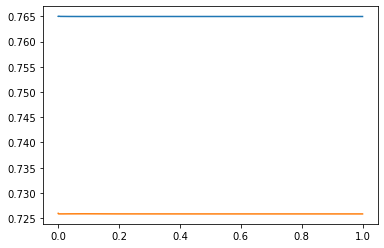

[0.725452196382429, 0.7254668780831572, 0.725452196382429, 0.7254668780831572, 0.725452196382429, 0.7254668780831571, 0.7254815597838853, 0.7254962414846136, 0.7254668780831571, 0.7254375146817007, 0.7254228329809724, 0.7254228329809724, 0.725452196382429, 0.725452196382429, 0.725452196382429]


In [66]:
"""
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.logspace(-5,0,15), meanacc_dtrain_rr[1::2])

plt.plot(np.logspace(-5,0,15), meanacc_dtrain_rr[::2])
plt.show()

print(meanacc_dtest_rr[::2])
"""b

In [67]:
print("No NaNs accuracy:")
print("Test:",meanacc_dtest_rr[::2],"Data:", meanacc_dtrain_rr[::2])
print("\nCleaned NaNs accuracy:", )
print("Test:",meanacc_dtest_rr[1::2],"Data:", meanacc_dtrain_rr[1::2])

No NaNs error:
Test: [0.725452196382429, 0.7254668780831572, 0.725452196382429, 0.7254668780831572, 0.725452196382429, 0.7254668780831571, 0.7254815597838853, 0.7254962414846136, 0.7254668780831571, 0.7254375146817007, 0.7254228329809724, 0.7254228329809724, 0.725452196382429, 0.725452196382429, 0.725452196382429] Data: [0.7259317986062173, 0.7259220108057317, 0.7259220108057317, 0.7259269047059744, 0.725917116905489, 0.7259122230052463, 0.7258828596037898, 0.725843708401848, 0.7258437084018479, 0.725843708401848, 0.7258534962023334, 0.7258632840028189, 0.725843708401848, 0.7258388145016053, 0.7258388145016051]

Cleaned NaNs error:
Test: [0.7648281322161378, 0.7648281322161378, 0.7648226342064173, 0.7648226342064173, 0.7648226342064173, 0.7648171361966967, 0.7648171361966968, 0.7648171361966968, 0.7648061401772559, 0.7648061401772559, 0.7647896461480943, 0.7647786501286534, 0.7647951441578149, 0.7647896461480944, 0.7647896461480944] Data: [0.7650223952262614, 0.7650242278961682, 0.7650

# Logit

## Logistic Regression

In [ ]:
meanacc_dtest_lr = []
meanacc_dtrain_lr = []

gamma = 0.0000000005

# Execute for data originally with no NaNs
dtmp_tr,dtmp_te=cross_validation(Y_no_nans,X_no_nans,k_fold=3,seed=1, function_name='logistic_regression', max_iters=10000,gamma=gamma)
meanacc_dtest_lr.append(dtmp_te)
meanacc_dtrain_lr.append(dtmp_tr)

# Execute for data originally with NaNs
dtmp_tr,dtmp_te=cross_validation(Y_cleaned,X_cleaned,k_fold=3,seed=1, function_name='logistic_regression', max_iters=10000,gamma=gamma)
meanacc_dtest_lr.append(dtmp_te)
meanacc_dtrain_lr.append(dtmp_tr)

Current iteration=0, loss=426371.94111903745
Current iteration=1, loss=304412.28049685917
Current iteration=2, loss=182517.70687172943
Current iteration=3, loss=75007.6071168799
Current iteration=4, loss=43018.768026563506
Current iteration=5, loss=40429.84931408414
Current iteration=6, loss=38828.43388929998
Current iteration=7, loss=37389.65898451601
Current iteration=8, loss=36117.05518427581
Current iteration=9, loss=35011.50945624462
Current iteration=10, loss=34069.1108166949
Current iteration=11, loss=33280.67184909558
Current iteration=12, loss=32631.947149979005
Current iteration=13, loss=32104.66628223557
Current iteration=14, loss=31678.268293028483
Current iteration=15, loss=31331.964252862
Current iteration=16, loss=31046.628370914168
Current iteration=17, loss=30806.095699402777
Current iteration=18, loss=30597.698511703184
Current iteration=19, loss=30412.141789082416
Current iteration=20, loss=30242.972376525762
Current iteration=21, loss=30085.903759645746
Current iter

Current iteration=200, loss=26114.193714756315
Current iteration=201, loss=26112.553146903152
Current iteration=202, loss=26110.930672845338
Current iteration=203, loss=26109.329326332394
Current iteration=204, loss=26107.745540413103
Current iteration=205, loss=26106.181568831846
Current iteration=206, loss=26104.634582415336
Current iteration=207, loss=26103.10622572301
Current iteration=208, loss=26101.59425529006
Current iteration=209, loss=26100.099844661054
Current iteration=210, loss=26098.621212910413
Current iteration=211, loss=26097.159173195654
Current iteration=212, loss=26095.712308178816
Current iteration=213, loss=26094.281158322778
Current iteration=214, loss=26092.864590983667
Current iteration=215, loss=26091.462942754453
Current iteration=216, loss=26090.07530322576
Current iteration=217, loss=26088.701858602806
Current iteration=218, loss=26087.3418715806
Current iteration=219, loss=26085.99541912073
Current iteration=220, loss=26084.661898603008
Current iteration=2

Current iteration=403, loss=25947.950178853855
Current iteration=404, loss=25947.52155743366
Current iteration=405, loss=25947.094943627362
Current iteration=406, loss=25946.67032420038
Current iteration=407, loss=25946.24768602856
Current iteration=408, loss=25945.827016096995
Current iteration=409, loss=25945.408301498668
Current iteration=410, loss=25944.991529433308
Current iteration=411, loss=25944.57668720617
Current iteration=412, loss=25944.16376222683
Current iteration=413, loss=25943.75274200808
Current iteration=414, loss=25943.343614164725
Current iteration=415, loss=25942.936366412498
Current iteration=416, loss=25942.530986566955
Current iteration=417, loss=25942.12746254235
Current iteration=418, loss=25941.72578235063
Current iteration=419, loss=25941.32593410032
Current iteration=420, loss=25940.92790599553
Current iteration=421, loss=25940.531686334907
Current iteration=422, loss=25940.13726351066
Current iteration=423, loss=25939.744626007534
Current iteration=424, l

Current iteration=597, loss=25891.012048458982
Current iteration=598, loss=25890.81238259322
Current iteration=599, loss=25890.61336636213
Current iteration=600, loss=25890.414996430598
Current iteration=601, loss=25890.21726948477
Current iteration=602, loss=25890.020182231834
Current iteration=603, loss=25889.82373139992
Current iteration=604, loss=25889.627913737946
Current iteration=605, loss=25889.432726015442
Current iteration=606, loss=25889.23816502241
Current iteration=607, loss=25889.044227569208
Current iteration=608, loss=25888.850910486362
Current iteration=609, loss=25888.658210624446
Current iteration=610, loss=25888.46612485395
Current iteration=611, loss=25888.274650065105
Current iteration=612, loss=25888.08378316776
Current iteration=613, loss=25887.89352109126
Current iteration=614, loss=25887.703860784277
Current iteration=615, loss=25887.5147992147
Current iteration=616, loss=25887.326333369463
Current iteration=617, loss=25887.138460254453
Current iteration=618, 

Current iteration=789, loss=25861.628463863864
Current iteration=790, loss=25861.510622749018
Current iteration=791, loss=25861.393052853553
Current iteration=792, loss=25861.27575310475
Current iteration=793, loss=25861.15872243567
Current iteration=794, loss=25861.041959785154
Current iteration=795, loss=25860.92546409779
Current iteration=796, loss=25860.809234323842
Current iteration=797, loss=25860.69326941926
Current iteration=798, loss=25860.5775683456
Current iteration=799, loss=25860.46213007003
Current iteration=800, loss=25860.346953565255
Current iteration=801, loss=25860.232037809514
Current iteration=802, loss=25860.117381786527
Current iteration=803, loss=25860.002984485473
Current iteration=804, loss=25859.888844900932
Current iteration=805, loss=25859.77496203289
Current iteration=806, loss=25859.661334886663
Current iteration=807, loss=25859.547962472894
Current iteration=808, loss=25859.434843807518
Current iteration=809, loss=25859.32197791169
Current iteration=810,

Current iteration=978, loss=25843.228546209142
Current iteration=979, loss=25843.147841593323
Current iteration=980, loss=25843.06727818368
Current iteration=981, loss=25842.986855559804
Current iteration=982, loss=25842.906573303186
Current iteration=983, loss=25842.82643099719
Current iteration=984, loss=25842.746428227012
Current iteration=985, loss=25842.666564579726
Current iteration=986, loss=25842.586839644224
Current iteration=987, loss=25842.507253011223
Current iteration=988, loss=25842.427804273277
Current iteration=989, loss=25842.348493024725
Current iteration=990, loss=25842.269318861716
Current iteration=991, loss=25842.190281382173
Current iteration=992, loss=25842.111380185812
Current iteration=993, loss=25842.032614874104
Current iteration=994, loss=25841.953985050284
Current iteration=995, loss=25841.875490319337
Current iteration=996, loss=25841.79713028797
Current iteration=997, loss=25841.718904564634
Current iteration=998, loss=25841.6408127595
Current iteration=

Current iteration=1155, loss=25830.823432188146
Current iteration=1156, loss=25830.762541314416
Current iteration=1157, loss=25830.70173908297
Current iteration=1158, loss=25830.641025288613
Current iteration=1159, loss=25830.58039972686
Current iteration=1160, loss=25830.519862193996
Current iteration=1161, loss=25830.45941248704
Current iteration=1162, loss=25830.39905040373
Current iteration=1163, loss=25830.33877574255
Current iteration=1164, loss=25830.2785883027
Current iteration=1165, loss=25830.218487884118
Current iteration=1166, loss=25830.158474287444
Current iteration=1167, loss=25830.098547314043
Current iteration=1168, loss=25830.038706765987
Current iteration=1169, loss=25829.978952446076
Current iteration=1170, loss=25829.91928415779
Current iteration=1171, loss=25829.859701705336
Current iteration=1172, loss=25829.800204893596
Current iteration=1173, loss=25829.740793528166
Current iteration=1174, loss=25829.681467415336
Current iteration=1175, loss=25829.622226362066


Current iteration=1369, loss=25819.535056831097
Current iteration=1370, loss=25819.489411007537
Current iteration=1371, loss=25819.443822441415
Current iteration=1372, loss=25819.39829102919
Current iteration=1373, loss=25819.352816667582
Current iteration=1374, loss=25819.30739925365
Current iteration=1375, loss=25819.262038684687
Current iteration=1376, loss=25819.216734858303
Current iteration=1377, loss=25819.171487672378
Current iteration=1378, loss=25819.12629702509
Current iteration=1379, loss=25819.081162814884
Current iteration=1380, loss=25819.03608494049
Current iteration=1381, loss=25818.991063300913
Current iteration=1382, loss=25818.94609779545
Current iteration=1383, loss=25818.901188323667
Current iteration=1384, loss=25818.856334785403
Current iteration=1385, loss=25818.811537080783
Current iteration=1386, loss=25818.766795110198
Current iteration=1387, loss=25818.722108774302
Current iteration=1388, loss=25818.677477974048
Current iteration=1389, loss=25818.6329026106

Current iteration=1563, loss=25811.641971550886
Current iteration=1564, loss=25811.605785686177
Current iteration=1565, loss=25811.569641283124
Current iteration=1566, loss=25811.53353827795
Current iteration=1567, loss=25811.49747660705
Current iteration=1568, loss=25811.46145620694
Current iteration=1569, loss=25811.42547701428
Current iteration=1570, loss=25811.38953896589
Current iteration=1571, loss=25811.353641998696
Current iteration=1572, loss=25811.317786049796
Current iteration=1573, loss=25811.281971056407
Current iteration=1574, loss=25811.2461969559
Current iteration=1575, loss=25811.210463685784
Current iteration=1576, loss=25811.17477118368
Current iteration=1577, loss=25811.139119387386
Current iteration=1578, loss=25811.103508234806
Current iteration=1579, loss=25811.067937664
Current iteration=1580, loss=25811.03240761316
Current iteration=1581, loss=25810.996918020595
Current iteration=1582, loss=25810.961468824793
Current iteration=1583, loss=25810.926059964324
Curr

Current iteration=1764, loss=25805.12530354364
Current iteration=1765, loss=25805.09633318519
Current iteration=1766, loss=25805.067393818565
Current iteration=1767, loss=25805.03848540132
Current iteration=1768, loss=25805.009607891086
Current iteration=1769, loss=25804.980761245573
Current iteration=1770, loss=25804.95194542258
Current iteration=1771, loss=25804.92316037997
Current iteration=1772, loss=25804.894406075688
Current iteration=1773, loss=25804.865682467742
Current iteration=1774, loss=25804.836989514253
Current iteration=1775, loss=25804.808327173374
Current iteration=1776, loss=25804.77969540337
Current iteration=1777, loss=25804.75109416256
Current iteration=1778, loss=25804.722523409346
Current iteration=1779, loss=25804.69398310222
Current iteration=1780, loss=25804.66547319971
Current iteration=1781, loss=25804.636993660475
Current iteration=1782, loss=25804.608544443196
Current iteration=1783, loss=25804.58012550667
Current iteration=1784, loss=25804.551736809735
Cu

Current iteration=1964, loss=25799.896790548835
Current iteration=1965, loss=25799.873264437072
Current iteration=1966, loss=25799.8497621462
Current iteration=1967, loss=25799.82628364602
Current iteration=1968, loss=25799.802828906355
Current iteration=1969, loss=25799.779397897106
Current iteration=1970, loss=25799.75599058821
Current iteration=1971, loss=25799.73260694965
Current iteration=1972, loss=25799.709246951443
Current iteration=1973, loss=25799.685910563687
Current iteration=1974, loss=25799.662597756487
Current iteration=1975, loss=25799.639308500024
Current iteration=1976, loss=25799.61604276452
Current iteration=1977, loss=25799.592800520233
Current iteration=1978, loss=25799.569581737476
Current iteration=1979, loss=25799.546386386613
Current iteration=1980, loss=25799.523214438042
Current iteration=1981, loss=25799.500065862216
Current iteration=1982, loss=25799.476940629625
Current iteration=1983, loss=25799.45383871083
Current iteration=1984, loss=25799.43076007641


Current iteration=2176, loss=25795.398312979083
Current iteration=2177, loss=25795.379228217585
Current iteration=2178, loss=25795.36016179616
Current iteration=2179, loss=25795.341113692775
Current iteration=2180, loss=25795.322083885403
Current iteration=2181, loss=25795.30307235206
Current iteration=2182, loss=25795.284079070785
Current iteration=2183, loss=25795.26510401967
Current iteration=2184, loss=25795.2461471768
Current iteration=2185, loss=25795.227208520337
Current iteration=2186, loss=25795.208288028418
Current iteration=2187, loss=25795.18938567926
Current iteration=2188, loss=25795.170501451095
Current iteration=2189, loss=25795.15163532217
Current iteration=2190, loss=25795.132787270777
Current iteration=2191, loss=25795.113957275236
Current iteration=2192, loss=25795.0951453139
Current iteration=2193, loss=25795.076351365144
Current iteration=2194, loss=25795.057575407387
Current iteration=2195, loss=25795.038817419052
Current iteration=2196, loss=25795.020077378627
C

Current iteration=2375, loss=25791.93506917846
Current iteration=2376, loss=25791.91923642413
Current iteration=2377, loss=25791.90341816563
Current iteration=2378, loss=25791.88761438609
Current iteration=2379, loss=25791.871825068665
Current iteration=2380, loss=25791.85605019656
Current iteration=2381, loss=25791.840289752956
Current iteration=2382, loss=25791.824543721097
Current iteration=2383, loss=25791.808812084237
Current iteration=2384, loss=25791.793094825625
Current iteration=2385, loss=25791.777391928572
Current iteration=2386, loss=25791.761703376393
Current iteration=2387, loss=25791.74602915241
Current iteration=2388, loss=25791.730369239987
Current iteration=2389, loss=25791.714723622514
Current iteration=2390, loss=25791.69909228337
Current iteration=2391, loss=25791.68347520599
Current iteration=2392, loss=25791.667872373822
Current iteration=2393, loss=25791.65228377032
Current iteration=2394, loss=25791.636709378967
Current iteration=2395, loss=25791.62114918329
Cu

Current iteration=2583, loss=25788.93055611093
Current iteration=2584, loss=25788.917405435866
Current iteration=2585, loss=25788.904266174166
Current iteration=2586, loss=25788.891138312865
Current iteration=2587, loss=25788.878021839013
Current iteration=2588, loss=25788.86491673967
Current iteration=2589, loss=25788.85182300192
Current iteration=2590, loss=25788.838740612868
Current iteration=2591, loss=25788.825669559614
Current iteration=2592, loss=25788.8126098293
Current iteration=2593, loss=25788.799561409065
Current iteration=2594, loss=25788.786524286068
Current iteration=2595, loss=25788.77349844749
Current iteration=2596, loss=25788.760483880516
Current iteration=2597, loss=25788.747480572365
Current iteration=2598, loss=25788.73448851025
Current iteration=2599, loss=25788.721507681425
Current iteration=2600, loss=25788.70853807313
Current iteration=2601, loss=25788.695579672636
Current iteration=2602, loss=25788.68263246724
Current iteration=2603, loss=25788.669696444238
C

Current iteration=2792, loss=25786.411862553476
Current iteration=2793, loss=25786.400837703015
Current iteration=2794, loss=25786.38982187112
Current iteration=2795, loss=25786.378815047698
Current iteration=2796, loss=25786.3678172227
Current iteration=2797, loss=25786.356828386073
Current iteration=2798, loss=25786.345848527762
Current iteration=2799, loss=25786.334877637757
Current iteration=2800, loss=25786.323915706027
Current iteration=2801, loss=25786.312962722575
Current iteration=2802, loss=25786.30201867742
Current iteration=2803, loss=25786.29108356055
Current iteration=2804, loss=25786.280157362027
Current iteration=2805, loss=25786.26924007188
Current iteration=2806, loss=25786.25833168016
Current iteration=2807, loss=25786.247432176948
Current iteration=2808, loss=25786.23654155231
Current iteration=2809, loss=25786.22565979633
Current iteration=2810, loss=25786.214786899127
Current iteration=2811, loss=25786.203922850797
Current iteration=2812, loss=25786.193067641478
C

Current iteration=3003, loss=25784.27078205886
Current iteration=3004, loss=25784.26145413319
Current iteration=3005, loss=25784.252133342095
Current iteration=3006, loss=25784.242819677704
Current iteration=3007, loss=25784.23351313216
Current iteration=3008, loss=25784.224213697602
Current iteration=3009, loss=25784.21492136619
Current iteration=3010, loss=25784.205636130086
Current iteration=3011, loss=25784.196357981476
Current iteration=3012, loss=25784.18708691253
Current iteration=3013, loss=25784.177822915448
Current iteration=3014, loss=25784.168565982418
Current iteration=3015, loss=25784.15931610567
Current iteration=3016, loss=25784.150073277415
Current iteration=3017, loss=25784.140837489875
Current iteration=3018, loss=25784.131608735297
Current iteration=3019, loss=25784.122387005922
Current iteration=3020, loss=25784.113172294008
Current iteration=3021, loss=25784.10396459181
Current iteration=3022, loss=25784.09476389162
Current iteration=3023, loss=25784.085570185696


Current iteration=3213, loss=25782.45719106894
Current iteration=3214, loss=25782.449201669784
Current iteration=3215, loss=25782.441217935815
Current iteration=3216, loss=25782.43323986085
Current iteration=3217, loss=25782.425267438703
Current iteration=3218, loss=25782.41730066321
Current iteration=3219, loss=25782.409339528207
Current iteration=3220, loss=25782.40138402752
Current iteration=3221, loss=25782.393434155
Current iteration=3222, loss=25782.385489904518
Current iteration=3223, loss=25782.377551269918
Current iteration=3224, loss=25782.369618245066
Current iteration=3225, loss=25782.36169082386
Current iteration=3226, loss=25782.353769000158
Current iteration=3227, loss=25782.345852767863
Current iteration=3228, loss=25782.337942120874
Current iteration=3229, loss=25782.330037053085
Current iteration=3230, loss=25782.32213755841
Current iteration=3231, loss=25782.31424363076
Current iteration=3232, loss=25782.306355264078
Current iteration=3233, loss=25782.298472452272
Cu

Current iteration=3423, loss=25780.894852883124
Current iteration=3424, loss=25780.887927456
Current iteration=3425, loss=25780.881006536933
Current iteration=3426, loss=25780.87409012106
Current iteration=3427, loss=25780.867178203476
Current iteration=3428, loss=25780.860270779336
Current iteration=3429, loss=25780.85336784376
Current iteration=3430, loss=25780.846469391898
Current iteration=3431, loss=25780.839575418893
Current iteration=3432, loss=25780.83268591989
Current iteration=3433, loss=25780.825800890063
Current iteration=3434, loss=25780.81892032455
Current iteration=3435, loss=25780.812044218546
Current iteration=3436, loss=25780.805172567205
Current iteration=3437, loss=25780.798305365715
Current iteration=3438, loss=25780.791442609247
Current iteration=3439, loss=25780.78458429301
Current iteration=3440, loss=25780.777730412196
Current iteration=3441, loss=25780.77088096199
Current iteration=3442, loss=25780.76403593761
Current iteration=3443, loss=25780.75719533427
Cur

Current iteration=3630, loss=25779.5506827158
Current iteration=3631, loss=25779.544593911716
Current iteration=3632, loss=25779.53850871327
Current iteration=3633, loss=25779.53242711659
Current iteration=3634, loss=25779.5263491178
Current iteration=3635, loss=25779.52027471303
Current iteration=3636, loss=25779.514203898438
Current iteration=3637, loss=25779.508136670152
Current iteration=3638, loss=25779.502073024316
Current iteration=3639, loss=25779.496012957097
Current iteration=3640, loss=25779.489956464644
Current iteration=3641, loss=25779.483903543118
Current iteration=3642, loss=25779.477854188677
Current iteration=3643, loss=25779.471808397502
Current iteration=3644, loss=25779.46576616577
Current iteration=3645, loss=25779.459727489633
Current iteration=3646, loss=25779.453692365303
Current iteration=3647, loss=25779.447660788952
Current iteration=3648, loss=25779.44163275677
Current iteration=3649, loss=25779.435608264954
Current iteration=3650, loss=25779.4295873097
Cur

Current iteration=3835, loss=25778.372684716505
Current iteration=3836, loss=25778.367259821804
Current iteration=3837, loss=25778.36183782202
Current iteration=3838, loss=25778.356418714076
Current iteration=3839, loss=25778.351002494885
Current iteration=3840, loss=25778.345589161374
Current iteration=3841, loss=25778.340178710445
Current iteration=3842, loss=25778.334771139045
Current iteration=3843, loss=25778.329366444097
Current iteration=3844, loss=25778.323964622523
Current iteration=3845, loss=25778.318565671278
Current iteration=3846, loss=25778.313169587294
Current iteration=3847, loss=25778.307776367514
Current iteration=3848, loss=25778.302386008887
Current iteration=3849, loss=25778.29699850836
Current iteration=3850, loss=25778.29161386289
Current iteration=3851, loss=25778.28623206943
Current iteration=3852, loss=25778.28085312494
Current iteration=3853, loss=25778.275477026385
Current iteration=3854, loss=25778.270103770737
Current iteration=3855, loss=25778.2647333549

Current iteration=4044, loss=25777.29742679385
Current iteration=4045, loss=25777.292544654578
Current iteration=4046, loss=25777.287664833508
Current iteration=4047, loss=25777.282787328186
Current iteration=4048, loss=25777.277912136164
Current iteration=4049, loss=25777.273039254997
Current iteration=4050, loss=25777.268168682236
Current iteration=4051, loss=25777.26330041544
Current iteration=4052, loss=25777.258434452167
Current iteration=4053, loss=25777.253570789977
Current iteration=4054, loss=25777.248709426443
Current iteration=4055, loss=25777.24385035913
Current iteration=4056, loss=25777.2389935856
Current iteration=4057, loss=25777.23413910343
Current iteration=4058, loss=25777.22928691021
Current iteration=4059, loss=25777.224437003493
Current iteration=4060, loss=25777.21958938088
Current iteration=4061, loss=25777.214744039946
Current iteration=4062, loss=25777.209900978283
Current iteration=4063, loss=25777.20506019347
Current iteration=4064, loss=25777.20022168311
Cu

Current iteration=4217, loss=25776.485319364765
Current iteration=4218, loss=25776.48080394204
Current iteration=4219, loss=25776.476290450537
Current iteration=4220, loss=25776.47177888824
Current iteration=4221, loss=25776.46726925312
Current iteration=4222, loss=25776.462761543156
Current iteration=4223, loss=25776.458255756304
Current iteration=4224, loss=25776.45375189055
Current iteration=4225, loss=25776.44924994388
Current iteration=4226, loss=25776.444749914277
Current iteration=4227, loss=25776.440251799708
Current iteration=4228, loss=25776.435755598184
Current iteration=4229, loss=25776.43126130767
Current iteration=4230, loss=25776.42676892618
Current iteration=4231, loss=25776.42227845169
Current iteration=4232, loss=25776.417789882198
Current iteration=4233, loss=25776.4133032157
Current iteration=4234, loss=25776.408818450207
Current iteration=4235, loss=25776.404335583702
Current iteration=4236, loss=25776.39985461421
Current iteration=4237, loss=25776.395375539723
Cur

Current iteration=4424, loss=25775.58900047904
Current iteration=4425, loss=25775.584844560486
Current iteration=4426, loss=25775.580690196457
Current iteration=4427, loss=25775.57653738532
Current iteration=4428, loss=25775.57238612546
Current iteration=4429, loss=25775.56823641526
Current iteration=4430, loss=25775.5640882531
Current iteration=4431, loss=25775.55994163737
Current iteration=4432, loss=25775.555796566456
Current iteration=4433, loss=25775.551653038732
Current iteration=4434, loss=25775.547511052606
Current iteration=4435, loss=25775.543370606458
Current iteration=4436, loss=25775.53923169869
Current iteration=4437, loss=25775.535094327697
Current iteration=4438, loss=25775.530958491865
Current iteration=4439, loss=25775.5268241896
Current iteration=4440, loss=25775.52269141931
Current iteration=4441, loss=25775.518560179386
Current iteration=4442, loss=25775.514430468233
Current iteration=4443, loss=25775.510302284263
Current iteration=4444, loss=25775.506175625876
Cur

Current iteration=4636, loss=25774.740311545458
Current iteration=4637, loss=25774.73645149841
Current iteration=4638, loss=25774.732592698354
Current iteration=4639, loss=25774.728735144
Current iteration=4640, loss=25774.72487883406
Current iteration=4641, loss=25774.721023767244
Current iteration=4642, loss=25774.717169942276
Current iteration=4643, loss=25774.713317357855
Current iteration=4644, loss=25774.709466012715
Current iteration=4645, loss=25774.705615905554
Current iteration=4646, loss=25774.70176703511
Current iteration=4647, loss=25774.6979194001
Current iteration=4648, loss=25774.694072999228
Current iteration=4649, loss=25774.690227831237
Current iteration=4650, loss=25774.68638389486
Current iteration=4651, loss=25774.6825411888
Current iteration=4652, loss=25774.67869971179
Current iteration=4653, loss=25774.674859462568
Current iteration=4654, loss=25774.67102043986
Current iteration=4655, loss=25774.667182642395
Current iteration=4656, loss=25774.663346068908
Curre

Current iteration=4844, loss=25773.962460233688
Current iteration=4845, loss=25773.95883372486
Current iteration=4846, loss=25773.9552082224
Current iteration=4847, loss=25773.951583725262
Current iteration=4848, loss=25773.947960232425
Current iteration=4849, loss=25773.944337742854
Current iteration=4850, loss=25773.94071625552
Current iteration=4851, loss=25773.937095769405
Current iteration=4852, loss=25773.93347628347
Current iteration=4853, loss=25773.929857796695
Current iteration=4854, loss=25773.926240308054
Current iteration=4855, loss=25773.922623816525
Current iteration=4856, loss=25773.919008321092
Current iteration=4857, loss=25773.91539382072
Current iteration=4858, loss=25773.911780314404
Current iteration=4859, loss=25773.90816780111
Current iteration=4860, loss=25773.904556279835
Current iteration=4861, loss=25773.900945749552
Current iteration=4862, loss=25773.897336209247
Current iteration=4863, loss=25773.893727657916
Current iteration=4864, loss=25773.89012009453


Current iteration=5055, loss=25773.218054674653
Current iteration=5056, loss=25773.21461925548
Current iteration=5057, loss=25773.21118464762
Current iteration=5058, loss=25773.207750850244
Current iteration=5059, loss=25773.20431786253
Current iteration=5060, loss=25773.20088568367
Current iteration=5061, loss=25773.19745431283
Current iteration=5062, loss=25773.194023749187
Current iteration=5063, loss=25773.19059399193
Current iteration=5064, loss=25773.187165040235
Current iteration=5065, loss=25773.18373689329
Current iteration=5066, loss=25773.180309550276
Current iteration=5067, loss=25773.176883010372
Current iteration=5068, loss=25773.17345727277
Current iteration=5069, loss=25773.170032336653
Current iteration=5070, loss=25773.166608201205
Current iteration=5071, loss=25773.163184865618
Current iteration=5072, loss=25773.159762329073
Current iteration=5073, loss=25773.156340590773
Current iteration=5074, loss=25773.15291964989
Current iteration=5075, loss=25773.149499505627
C

Current iteration=5262, loss=25772.52308310641
Current iteration=5263, loss=25772.519799275244
Current iteration=5264, loss=25772.516516102252
Current iteration=5265, loss=25772.513233586775
Current iteration=5266, loss=25772.509951728152
Current iteration=5267, loss=25772.506670525723
Current iteration=5268, loss=25772.503389978832
Current iteration=5269, loss=25772.50011008682
Current iteration=5270, loss=25772.496830849028
Current iteration=5271, loss=25772.493552264797
Current iteration=5272, loss=25772.490274333482
Current iteration=5273, loss=25772.486997054406
Current iteration=5274, loss=25772.48372042693
Current iteration=5275, loss=25772.480444450404
Current iteration=5276, loss=25772.47716912416
Current iteration=5277, loss=25772.47389444756
Current iteration=5278, loss=25772.470620419943
Current iteration=5279, loss=25772.467347040656
Current iteration=5280, loss=25772.46407430905
Current iteration=5281, loss=25772.46080222448
Current iteration=5282, loss=25772.457530786283

Current iteration=5472, loss=25771.846969137867
Current iteration=5473, loss=25771.843810024387
Current iteration=5474, loss=25771.840651444527
Current iteration=5475, loss=25771.83749339776
Current iteration=5476, loss=25771.834335883555
Current iteration=5477, loss=25771.831178901393
Current iteration=5478, loss=25771.82802245074
Current iteration=5479, loss=25771.824866531068
Current iteration=5480, loss=25771.821711141856
Current iteration=5481, loss=25771.818556282567
Current iteration=5482, loss=25771.81540195268
Current iteration=5483, loss=25771.81224815168
Current iteration=5484, loss=25771.809094879023
Current iteration=5485, loss=25771.8059421342
Current iteration=5486, loss=25771.802789916692
Current iteration=5487, loss=25771.79963822596
Current iteration=5488, loss=25771.796487061492
Current iteration=5489, loss=25771.79333642276
Current iteration=5490, loss=25771.790186309256
Current iteration=5491, loss=25771.78703672044
Current iteration=5492, loss=25771.78388765581
Cu

Current iteration=5680, loss=25771.200619196927
Current iteration=5681, loss=25771.197560460387
Current iteration=5682, loss=25771.194502158527
Current iteration=5683, loss=25771.191444290896
Current iteration=5684, loss=25771.188386857102
Current iteration=5685, loss=25771.185329856693
Current iteration=5686, loss=25771.18227328926
Current iteration=5687, loss=25771.179217154368
Current iteration=5688, loss=25771.176161451604
Current iteration=5689, loss=25771.173106180544
Current iteration=5690, loss=25771.17005134076
Current iteration=5691, loss=25771.16699693184
Current iteration=5692, loss=25771.16394295335
Current iteration=5693, loss=25771.160889404877
Current iteration=5694, loss=25771.157836285995
Current iteration=5695, loss=25771.154783596292
Current iteration=5696, loss=25771.151731335343
Current iteration=5697, loss=25771.14867950273
Current iteration=5698, loss=25771.14562809803
Current iteration=5699, loss=25771.142577120838
Current iteration=5700, loss=25771.13952657071

Current iteration=5892, loss=25770.561257811994
Current iteration=5893, loss=25770.55828237237
Current iteration=5894, loss=25770.555307286508
Current iteration=5895, loss=25770.55233255406
Current iteration=5896, loss=25770.549358174692
Current iteration=5897, loss=25770.54638414806
Current iteration=5898, loss=25770.54341047383
Current iteration=5899, loss=25770.540437151652
Current iteration=5900, loss=25770.53746418121
Current iteration=5901, loss=25770.534491562128
Current iteration=5902, loss=25770.531519294105
Current iteration=5903, loss=25770.52854737678
Current iteration=5904, loss=25770.525575809825
Current iteration=5905, loss=25770.522604592894
Current iteration=5906, loss=25770.519633725668
Current iteration=5907, loss=25770.516663207793
Current iteration=5908, loss=25770.513693038938
Current iteration=5909, loss=25770.510723218773
Current iteration=5910, loss=25770.50775374696
Current iteration=5911, loss=25770.504784623154
Current iteration=5912, loss=25770.50181584703


Current iteration=6094, loss=25769.966962510043
Current iteration=6095, loss=25769.96405206965
Current iteration=6096, loss=25769.96114192092
Current iteration=6097, loss=25769.958232063575
Current iteration=6098, loss=25769.955322497357
Current iteration=6099, loss=25769.952413221967
Current iteration=6100, loss=25769.94950423714
Current iteration=6101, loss=25769.946595542613
Current iteration=6102, loss=25769.943687138097
Current iteration=6103, loss=25769.940779023324
Current iteration=6104, loss=25769.937871198006
Current iteration=6105, loss=25769.93496366189
Current iteration=6106, loss=25769.93205641469
Current iteration=6107, loss=25769.92914945614
Current iteration=6108, loss=25769.926242785954
Current iteration=6109, loss=25769.923336403877
Current iteration=6110, loss=25769.920430309623
Current iteration=6111, loss=25769.917524502933
Current iteration=6112, loss=25769.914618983516
Current iteration=6113, loss=25769.911713751124
Current iteration=6114, loss=25769.90880880546

Current iteration=6296, loss=25769.384619592045
Current iteration=6297, loss=25769.38176283265
Current iteration=6298, loss=25769.378906314596
Current iteration=6299, loss=25769.376050037652
Current iteration=6300, loss=25769.3731940016
Current iteration=6301, loss=25769.370338206205
Current iteration=6302, loss=25769.367482651258
Current iteration=6303, loss=25769.364627336523
Current iteration=6304, loss=25769.361772261782
Current iteration=6305, loss=25769.35891742682
Current iteration=6306, loss=25769.356062831404
Current iteration=6307, loss=25769.353208475313
Current iteration=6308, loss=25769.350354358336
Current iteration=6309, loss=25769.34750048024
Current iteration=6310, loss=25769.34464684081
Current iteration=6311, loss=25769.341793439824
Current iteration=6312, loss=25769.338940277055
Current iteration=6313, loss=25769.336087352287
Current iteration=6314, loss=25769.3332346653
Current iteration=6315, loss=25769.330382215885
Current iteration=6316, loss=25769.327530003797


Current iteration=6469, loss=25768.893808991757
Current iteration=6470, loss=25768.89099084021
Current iteration=6471, loss=25768.888172894513
Current iteration=6472, loss=25768.885355154474
Current iteration=6473, loss=25768.882537619906
Current iteration=6474, loss=25768.879720290628
Current iteration=6475, loss=25768.876903166456
Current iteration=6476, loss=25768.874086247193
Current iteration=6477, loss=25768.87126953267
Current iteration=6478, loss=25768.86845302267
Current iteration=6479, loss=25768.865636717033
Current iteration=6480, loss=25768.862820615574
Current iteration=6481, loss=25768.860004718095
Current iteration=6482, loss=25768.85718902442
Current iteration=6483, loss=25768.854373534352
Current iteration=6484, loss=25768.85155824772
Current iteration=6485, loss=25768.848743164326
Current iteration=6486, loss=25768.845928284
Current iteration=6487, loss=25768.843113606545
Current iteration=6488, loss=25768.84029913178
Current iteration=6489, loss=25768.837484859523
C

Current iteration=6684, loss=25768.292352074655
Current iteration=6685, loss=25768.289574170783
Current iteration=6686, loss=25768.286796436627
Current iteration=6687, loss=25768.284018872026
Current iteration=6688, loss=25768.281241476838
Current iteration=6689, loss=25768.27846425091
Current iteration=6690, loss=25768.275687194084
Current iteration=6691, loss=25768.27291030623
Current iteration=6692, loss=25768.270133587175
Current iteration=6693, loss=25768.267357036795
Current iteration=6694, loss=25768.26458065492
Current iteration=6695, loss=25768.261804441412
Current iteration=6696, loss=25768.259028396118
Current iteration=6697, loss=25768.256252518884
Current iteration=6698, loss=25768.253476809583
Current iteration=6699, loss=25768.250701268033
Current iteration=6700, loss=25768.24792589412
Current iteration=6701, loss=25768.245150687675
Current iteration=6702, loss=25768.24237564856
Current iteration=6703, loss=25768.239600776615
Current iteration=6704, loss=25768.2368260717

Current iteration=6897, loss=25767.70426411663
Current iteration=6898, loss=25767.701519202434
Current iteration=6899, loss=25767.69877442921
Current iteration=6900, loss=25767.696029796818
Current iteration=6901, loss=25767.693285305148
Current iteration=6902, loss=25767.69054095407
Current iteration=6903, loss=25767.68779674348
Current iteration=6904, loss=25767.685052673245
Current iteration=6905, loss=25767.682308743242
Current iteration=6906, loss=25767.679564953356
Current iteration=6907, loss=25767.676821303474
Current iteration=6908, loss=25767.674077793465
Current iteration=6909, loss=25767.671334423212
Current iteration=6910, loss=25767.668591192603
Current iteration=6911, loss=25767.66584810151
Current iteration=6912, loss=25767.66310514982
Current iteration=6913, loss=25767.660362337407
Current iteration=6914, loss=25767.657619664158
Current iteration=6915, loss=25767.654877129953
Current iteration=6916, loss=25767.65213473467
Current iteration=6917, loss=25767.64939247819


Current iteration=7101, loss=25767.14706025255
Current iteration=7102, loss=25767.14434175672
Current iteration=7103, loss=25767.141623379594
Current iteration=7104, loss=25767.138905121068
Current iteration=7105, loss=25767.136186981053
Current iteration=7106, loss=25767.133468959444
Current iteration=7107, loss=25767.130751056153
Current iteration=7108, loss=25767.128033271063
Current iteration=7109, loss=25767.1253156041
Current iteration=7110, loss=25767.122598055154
Current iteration=7111, loss=25767.119880624126
Current iteration=7112, loss=25767.117163310922
Current iteration=7113, loss=25767.114446115447
Current iteration=7114, loss=25767.1117290376
Current iteration=7115, loss=25767.109012077286
Current iteration=7116, loss=25767.106295234404
Current iteration=7117, loss=25767.10357850886
Current iteration=7118, loss=25767.100861900566
Current iteration=7119, loss=25767.098145409407
Current iteration=7120, loss=25767.09542903531
Current iteration=7121, loss=25767.09271277815
C

Current iteration=7302, loss=25766.602903993273
Current iteration=7303, loss=25766.600207510448
Current iteration=7304, loss=25766.59751112847
Current iteration=7305, loss=25766.59481484726
Current iteration=7306, loss=25766.592118666733
Current iteration=7307, loss=25766.589422586814
Current iteration=7308, loss=25766.586726607427
Current iteration=7309, loss=25766.58403072848
Current iteration=7310, loss=25766.581334949908
Current iteration=7311, loss=25766.57863927162
Current iteration=7312, loss=25766.575943693548
Current iteration=7313, loss=25766.573248215605
Current iteration=7314, loss=25766.570552837708
Current iteration=7315, loss=25766.56785755978
Current iteration=7316, loss=25766.56516238175
Current iteration=7317, loss=25766.562467303535
Current iteration=7318, loss=25766.559772325047
Current iteration=7319, loss=25766.557077446218
Current iteration=7320, loss=25766.55438266696
Current iteration=7321, loss=25766.551687987205
Current iteration=7322, loss=25766.54899340687


Current iteration=7506, loss=25766.054803438237
Current iteration=7507, loss=25766.052125977283
Current iteration=7508, loss=25766.049448602404
Current iteration=7509, loss=25766.046771313533
Current iteration=7510, loss=25766.044094110606
Current iteration=7511, loss=25766.041416993558
Current iteration=7512, loss=25766.03873996232
Current iteration=7513, loss=25766.036063016836
Current iteration=7514, loss=25766.033386157036
Current iteration=7515, loss=25766.030709382852
Current iteration=7516, loss=25766.028032694227
Current iteration=7517, loss=25766.025356091086
Current iteration=7518, loss=25766.02267957337
Current iteration=7519, loss=25766.02000314102
Current iteration=7520, loss=25766.017326793964
Current iteration=7521, loss=25766.014650532135
Current iteration=7522, loss=25766.011974355475
Current iteration=7523, loss=25766.00929826392
Current iteration=7524, loss=25766.006622257402
Current iteration=7525, loss=25766.00394633586
Current iteration=7526, loss=25766.0012704992

Current iteration=7719, loss=25765.48634930935
Current iteration=7720, loss=25765.483688808337
Current iteration=7721, loss=25765.481028380887
Current iteration=7722, loss=25765.47836802694
Current iteration=7723, loss=25765.47570774645
Current iteration=7724, loss=25765.47304753936
Current iteration=7725, loss=25765.470387405618
Current iteration=7726, loss=25765.46772734517
Current iteration=7727, loss=25765.465067357974
Current iteration=7728, loss=25765.46240744396
Current iteration=7729, loss=25765.459747603094
Current iteration=7730, loss=25765.45708783531
Current iteration=7731, loss=25765.454428140565
Current iteration=7732, loss=25765.451768518804
Current iteration=7733, loss=25765.44910896997
Current iteration=7734, loss=25765.446449494015
Current iteration=7735, loss=25765.443790090885
Current iteration=7736, loss=25765.441130760533
Current iteration=7737, loss=25765.4384715029
Current iteration=7738, loss=25765.43581231794
Current iteration=7739, loss=25765.4331532056
Curre

Current iteration=7924, loss=25764.94241377845
Current iteration=7925, loss=25764.93976732595
Current iteration=7926, loss=25764.93712093723
Current iteration=7927, loss=25764.93447461224
Current iteration=7928, loss=25764.931828350956
Current iteration=7929, loss=25764.929182153326
Current iteration=7930, loss=25764.92653601931
Current iteration=7931, loss=25764.92388994886
Current iteration=7932, loss=25764.921243941935
Current iteration=7933, loss=25764.918597998494
Current iteration=7934, loss=25764.915952118492
Current iteration=7935, loss=25764.91330630189
Current iteration=7936, loss=25764.910660548645
Current iteration=7937, loss=25764.90801485871
Current iteration=7938, loss=25764.905369232052
Current iteration=7939, loss=25764.902723668616
Current iteration=7940, loss=25764.900078168364
Current iteration=7941, loss=25764.897432731257
Current iteration=7942, loss=25764.894787357254
Current iteration=7943, loss=25764.8921420463
Current iteration=7944, loss=25764.889496798372
Cu

Current iteration=8126, loss=25764.40906982846
Current iteration=8127, loss=25764.406435442546
Current iteration=8128, loss=25764.403801112545
Current iteration=8129, loss=25764.401166838412
Current iteration=8130, loss=25764.398532620122
Current iteration=8131, loss=25764.395898457635
Current iteration=8132, loss=25764.39326435092
Current iteration=8133, loss=25764.390630299946
Current iteration=8134, loss=25764.387996304667
Current iteration=8135, loss=25764.38536236505
Current iteration=8136, loss=25764.38272848107
Current iteration=8137, loss=25764.38009465268
Current iteration=8138, loss=25764.377460879852
Current iteration=8139, loss=25764.374827162545
Current iteration=8140, loss=25764.372193500734
Current iteration=8141, loss=25764.36955989438
Current iteration=8142, loss=25764.36692634344
Current iteration=8143, loss=25764.364292847895
Current iteration=8144, loss=25764.3616594077
Current iteration=8145, loss=25764.359026022812
Current iteration=8146, loss=25764.356392693215
C

Current iteration=8328, loss=25763.878013518708
Current iteration=8329, loss=25763.875389756777
Current iteration=8330, loss=25763.872766044296
Current iteration=8331, loss=25763.870142381245
Current iteration=8332, loss=25763.8675187676
Current iteration=8333, loss=25763.864895203333
Current iteration=8334, loss=25763.862271688395
Current iteration=8335, loss=25763.85964822278
Current iteration=8336, loss=25763.857024806446
Current iteration=8337, loss=25763.854401439374
Current iteration=8338, loss=25763.851778121527
Current iteration=8339, loss=25763.849154852876
Current iteration=8340, loss=25763.846531633404
Current iteration=8341, loss=25763.843908463066
Current iteration=8342, loss=25763.84128534185
Current iteration=8343, loss=25763.838662269714
Current iteration=8344, loss=25763.836039246635
Current iteration=8345, loss=25763.833416272584
Current iteration=8346, loss=25763.830793347533
Current iteration=8347, loss=25763.828170471457
Current iteration=8348, loss=25763.825547644

Current iteration=8532, loss=25763.343751819146
Current iteration=8533, loss=25763.341137586376
Current iteration=8534, loss=25763.338523397717
Current iteration=8535, loss=25763.335909253154
Current iteration=8536, loss=25763.333295152654
Current iteration=8537, loss=25763.330681096206
Current iteration=8538, loss=25763.328067083767
Current iteration=8539, loss=25763.325453115336
Current iteration=8540, loss=25763.32283919087
Current iteration=8541, loss=25763.320225310363
Current iteration=8542, loss=25763.31761147378
Current iteration=8543, loss=25763.314997681096
Current iteration=8544, loss=25763.312383932294
Current iteration=8545, loss=25763.309770227355
Current iteration=8546, loss=25763.307156566243
Current iteration=8547, loss=25763.304542948936
Current iteration=8548, loss=25763.301929375422
Current iteration=8549, loss=25763.29931584567
Current iteration=8550, loss=25763.296702359658
Current iteration=8551, loss=25763.294088917362
Current iteration=8552, loss=25763.29147551

Current iteration=8730, loss=25762.82696533013
Current iteration=8731, loss=25762.824359398517
Current iteration=8732, loss=25762.821753506756
Current iteration=8733, loss=25762.819147654824
Current iteration=8734, loss=25762.8165418427
Current iteration=8735, loss=25762.813936070368
Current iteration=8736, loss=25762.81133033781
Current iteration=8737, loss=25762.808724644994
Current iteration=8738, loss=25762.80611899192
Current iteration=8739, loss=25762.80351337856
Current iteration=8740, loss=25762.800907804885
Current iteration=8741, loss=25762.798302270887
Current iteration=8742, loss=25762.79569677655
Current iteration=8743, loss=25762.793091321837
Current iteration=8744, loss=25762.790485906742
Current iteration=8745, loss=25762.78788053125
Current iteration=8746, loss=25762.785275195325
Current iteration=8747, loss=25762.78266989897
Current iteration=8748, loss=25762.780064642146
Current iteration=8749, loss=25762.777459424844
Current iteration=8750, loss=25762.774854247047
C

Current iteration=8938, loss=25762.28576190252
Current iteration=8939, loss=25762.283163865184
Current iteration=8940, loss=25762.28056586401
Current iteration=8941, loss=25762.27796789898
Current iteration=8942, loss=25762.275369970088
Current iteration=8943, loss=25762.2727720773
Current iteration=8944, loss=25762.27017422062
Current iteration=8945, loss=25762.267576400012
Current iteration=8946, loss=25762.264978615473
Current iteration=8947, loss=25762.262380866985
Current iteration=8948, loss=25762.259783154535
Current iteration=8949, loss=25762.257185478098
Current iteration=8950, loss=25762.25458783767
Current iteration=8951, loss=25762.25199023322
Current iteration=8952, loss=25762.249392664748
Current iteration=8953, loss=25762.24679513223
Current iteration=8954, loss=25762.24419763565
Current iteration=8955, loss=25762.24160017499
Current iteration=8956, loss=25762.23900275024
Current iteration=8957, loss=25762.236405361386
Current iteration=8958, loss=25762.2338080084
Curren

Current iteration=9142, loss=25761.756489756954
Current iteration=9143, loss=25761.75389878532
Current iteration=9144, loss=25761.75130784688
Current iteration=9145, loss=25761.748716941613
Current iteration=9146, loss=25761.74612606951
Current iteration=9147, loss=25761.743535230562
Current iteration=9148, loss=25761.74094442475
Current iteration=9149, loss=25761.73835365206
Current iteration=9150, loss=25761.73576291248
Current iteration=9151, loss=25761.733172206004
Current iteration=9152, loss=25761.730581532614
Current iteration=9153, loss=25761.727990892294
Current iteration=9154, loss=25761.725400285035
Current iteration=9155, loss=25761.722809710816
Current iteration=9156, loss=25761.720219169638
Current iteration=9157, loss=25761.717628661478
Current iteration=9158, loss=25761.715038186325
Current iteration=9159, loss=25761.71244774416
Current iteration=9160, loss=25761.709857334987
Current iteration=9161, loss=25761.707266958772
Current iteration=9162, loss=25761.70467661552


Current iteration=9338, loss=25761.24927799601
Current iteration=9339, loss=25761.24669329221
Current iteration=9340, loss=25761.244108619234
Current iteration=9341, loss=25761.24152397707
Current iteration=9342, loss=25761.23893936572
Current iteration=9343, loss=25761.236354785164
Current iteration=9344, loss=25761.233770235387
Current iteration=9345, loss=25761.23118571638
Current iteration=9346, loss=25761.228601228133
Current iteration=9347, loss=25761.22601677064
Current iteration=9348, loss=25761.223432343893
Current iteration=9349, loss=25761.220847947872
Current iteration=9350, loss=25761.21826358256
Current iteration=9351, loss=25761.21567924796
Current iteration=9352, loss=25761.213094944058
Current iteration=9353, loss=25761.210510670837
Current iteration=9354, loss=25761.207926428287
Current iteration=9355, loss=25761.205342216414
Current iteration=9356, loss=25761.20275803518
Current iteration=9357, loss=25761.2001738846
Current iteration=9358, loss=25761.197589764637
Cur

Current iteration=9543, loss=25760.720043474576
Current iteration=9544, loss=25760.717464874462
Current iteration=9545, loss=25760.71488630313
Current iteration=9546, loss=25760.712307760565
Current iteration=9547, loss=25760.709729246755
Current iteration=9548, loss=25760.707150761697
Current iteration=9549, loss=25760.70457230537
Current iteration=9550, loss=25760.70199387778
Current iteration=9551, loss=25760.69941547891
Current iteration=9552, loss=25760.696837108764
Current iteration=9553, loss=25760.694258767304
Current iteration=9554, loss=25760.691680454547
Current iteration=9555, loss=25760.68910217048
Current iteration=9556, loss=25760.68652391508
Current iteration=9557, loss=25760.683945688354
Current iteration=9558, loss=25760.68136749028
Current iteration=9559, loss=25760.67878932086
Current iteration=9560, loss=25760.67621118009
Current iteration=9561, loss=25760.673633067938
Current iteration=9562, loss=25760.671054984417
Current iteration=9563, loss=25760.668476929503
C

Current iteration=9748, loss=25760.192019880793
Current iteration=9749, loss=25760.18944700109
Current iteration=9750, loss=25760.18687414847
Current iteration=9751, loss=25760.18430132291
Current iteration=9752, loss=25760.181728524418
Current iteration=9753, loss=25760.17915575298
Current iteration=9754, loss=25760.176583008586
Current iteration=9755, loss=25760.174010291237
Current iteration=9756, loss=25760.17143760092
Current iteration=9757, loss=25760.168864937626
Current iteration=9758, loss=25760.166292301346
Current iteration=9759, loss=25760.163719692082
Current iteration=9760, loss=25760.16114710982
Current iteration=9761, loss=25760.15857455455
Current iteration=9762, loss=25760.15600202627
Current iteration=9763, loss=25760.15342952497
Current iteration=9764, loss=25760.15085705064
Current iteration=9765, loss=25760.148284603274
Current iteration=9766, loss=25760.145712182868
Current iteration=9767, loss=25760.143139789412
Current iteration=9768, loss=25760.140567422903
Cu

Current iteration=9960, loss=25759.647163741094
Current iteration=9961, loss=25759.644596443486
Current iteration=9962, loss=25759.642029171504
Current iteration=9963, loss=25759.63946192514
Current iteration=9964, loss=25759.636894704385
Current iteration=9965, loss=25759.63432750923
Current iteration=9966, loss=25759.631760339682
Current iteration=9967, loss=25759.629193195724
Current iteration=9968, loss=25759.62662607735
Current iteration=9969, loss=25759.624058984547
Current iteration=9970, loss=25759.62149191733
Current iteration=9971, loss=25759.61892487567
Current iteration=9972, loss=25759.61635785958
Current iteration=9973, loss=25759.613790869043
Current iteration=9974, loss=25759.61122390406
Current iteration=9975, loss=25759.608656964607
Current iteration=9976, loss=25759.606090050693
Current iteration=9977, loss=25759.603523162314
Current iteration=9978, loss=25759.600956299455
Current iteration=9979, loss=25759.59838946212
Current iteration=9980, loss=25759.59582265029
C

Current iteration=155, loss=26181.825368622864
Current iteration=156, loss=26178.64384976087
Current iteration=157, loss=26175.61144885221
Current iteration=158, loss=26172.503067331574
Current iteration=159, loss=26169.53715382316
Current iteration=160, loss=26166.50192988075
Current iteration=161, loss=26163.601984599405
Current iteration=162, loss=26160.640215232896
Current iteration=163, loss=26157.806139620334
Current iteration=164, loss=26154.918240901163
Current iteration=165, loss=26152.15020197066
Current iteration=166, loss=26149.33657372979
Current iteration=167, loss=26146.634864366722
Current iteration=168, loss=26143.895779613813
Current iteration=169, loss=26141.26069779762
Current iteration=170, loss=26138.596217659957
Current iteration=171, loss=26136.027966809634
Current iteration=172, loss=26133.43788042306
Current iteration=173, loss=26130.936491770615
Current iteration=174, loss=26128.420279467322
Current iteration=175, loss=26125.98555621112
Current iteration=176,

Current iteration=355, loss=25928.848372210337
Current iteration=356, loss=25928.293950055468
Current iteration=357, loss=25927.742348202177
Current iteration=358, loss=25927.193545602655
Current iteration=359, loss=25926.647521428313
Current iteration=360, loss=25926.104255066417
Current iteration=361, loss=25925.563726116685
Current iteration=362, loss=25925.025914388036
Current iteration=363, loss=25924.4907998954
Current iteration=364, loss=25923.95836285655
Current iteration=365, loss=25923.42858368906
Current iteration=366, loss=25922.9014430073
Current iteration=367, loss=25922.376921619507
Current iteration=368, loss=25921.85500052485
Current iteration=369, loss=25921.335660910725
Current iteration=370, loss=25920.818884149878
Current iteration=371, loss=25920.304651797804
Current iteration=372, loss=25919.79294559005
Current iteration=373, loss=25919.28374743964
Current iteration=374, loss=25918.77703943455
Current iteration=375, loss=25918.272803835214
Current iteration=376, 

Current iteration=559, loss=25854.534019644816
Current iteration=560, loss=25854.295740402642
Current iteration=561, loss=25854.05825317167
Current iteration=562, loss=25853.82155371291
Current iteration=563, loss=25853.585637815562
Current iteration=564, loss=25853.350501296845
Current iteration=565, loss=25853.116140001763
Current iteration=566, loss=25852.882549802915
Current iteration=567, loss=25852.649726600255
Current iteration=568, loss=25852.417666320925
Current iteration=569, loss=25852.186364919016
Current iteration=570, loss=25851.955818375405
Current iteration=571, loss=25851.726022697512
Current iteration=572, loss=25851.496973919126
Current iteration=573, loss=25851.26866810022
Current iteration=574, loss=25851.041101326715
Current iteration=575, loss=25850.814269710325
Current iteration=576, loss=25850.588169388368
Current iteration=577, loss=25850.362796523506
Current iteration=578, loss=25850.138147303678
Current iteration=579, loss=25849.91421794179
Current iteration

Current iteration=768, loss=25817.248850831293
Current iteration=769, loss=25817.11414700885
Current iteration=770, loss=25816.979742861207
Current iteration=771, loss=25816.845637207356
Current iteration=772, loss=25816.71182887282
Current iteration=773, loss=25816.578316689625
Current iteration=774, loss=25816.445099496275
Current iteration=775, loss=25816.312176137682
Current iteration=776, loss=25816.179545465136
Current iteration=777, loss=25816.047206336265
Current iteration=778, loss=25815.915157614996
Current iteration=779, loss=25815.7833981715
Current iteration=780, loss=25815.651926882183
Current iteration=781, loss=25815.520742629604
Current iteration=782, loss=25815.389844302463
Current iteration=783, loss=25815.259230795557
Current iteration=784, loss=25815.128901009735
Current iteration=785, loss=25814.998853851874
Current iteration=786, loss=25814.86908823481
Current iteration=787, loss=25814.73960307733
Current iteration=788, loss=25814.610397304114
Current iteration=7

Current iteration=978, loss=25794.145260260488
Current iteration=979, loss=25794.054956346117
Current iteration=980, loss=25793.964801010916
Current iteration=981, loss=25793.87479384037
Current iteration=982, loss=25793.784934421772
Current iteration=983, loss=25793.695222344257
Current iteration=984, loss=25793.605657198706
Current iteration=985, loss=25793.516238577842
Current iteration=986, loss=25793.426966076135
Current iteration=987, loss=25793.337839289845
Current iteration=988, loss=25793.24885781698
Current iteration=989, loss=25793.160021257303
Current iteration=990, loss=25793.07132921231
Current iteration=991, loss=25792.98278128524
Current iteration=992, loss=25792.894377081047
Current iteration=993, loss=25792.806116206393
Current iteration=994, loss=25792.717998269647
Current iteration=995, loss=25792.630022880865
Current iteration=996, loss=25792.542189651795
Current iteration=997, loss=25792.454498195846
Current iteration=998, loss=25792.366948128103
Current iteration

Current iteration=1181, loss=25778.39240634029
Current iteration=1182, loss=25778.32570693476
Current iteration=1183, loss=25778.25909870741
Current iteration=1184, loss=25778.192581469142
Current iteration=1185, loss=25778.126155031467
Current iteration=1186, loss=25778.059819206544
Current iteration=1187, loss=25777.993573807154
Current iteration=1188, loss=25777.9274186467
Current iteration=1189, loss=25777.861353539218
Current iteration=1190, loss=25777.795378299335
Current iteration=1191, loss=25777.729492742328
Current iteration=1192, loss=25777.663696684063
Current iteration=1193, loss=25777.59798994103
Current iteration=1194, loss=25777.532372330308
Current iteration=1195, loss=25777.466843669605
Current iteration=1196, loss=25777.401403777207
Current iteration=1197, loss=25777.336052472005
Current iteration=1198, loss=25777.270789573497
Current iteration=1199, loss=25777.205614901766
Current iteration=1200, loss=25777.140528277472
Current iteration=1201, loss=25777.07552952188

Current iteration=1389, loss=25766.242485839204
Current iteration=1390, loss=25766.191432864747
Current iteration=1391, loss=25766.14044196097
Current iteration=1392, loss=25766.089513024854
Current iteration=1393, loss=25766.038645953642
Current iteration=1394, loss=25765.987840644833
Current iteration=1395, loss=25765.93709699619
Current iteration=1396, loss=25765.88641490573
Current iteration=1397, loss=25765.835794271723
Current iteration=1398, loss=25765.785234992713
Current iteration=1399, loss=25765.734736967468
Current iteration=1400, loss=25765.684300095036
Current iteration=1401, loss=25765.633924274705
Current iteration=1402, loss=25765.583609406025
Current iteration=1403, loss=25765.533355388776
Current iteration=1404, loss=25765.48316212302
Current iteration=1405, loss=25765.433029509033
Current iteration=1406, loss=25765.382957447364
Current iteration=1407, loss=25765.3329458388
Current iteration=1408, loss=25765.282994584373
Current iteration=1409, loss=25765.23310358536

Current iteration=1597, loss=25756.82455091914
Current iteration=1598, loss=25756.784513563525
Current iteration=1599, loss=25756.74452129373
Current iteration=1600, loss=25756.704574045136
Current iteration=1601, loss=25756.664671753257
Current iteration=1602, loss=25756.62481435373
Current iteration=1603, loss=25756.585001782314
Current iteration=1604, loss=25756.545233974917
Current iteration=1605, loss=25756.50551086756
Current iteration=1606, loss=25756.465832396374
Current iteration=1607, loss=25756.426198497644
Current iteration=1608, loss=25756.386609107776
Current iteration=1609, loss=25756.34706416329
Current iteration=1610, loss=25756.307563600836
Current iteration=1611, loss=25756.268107357188
Current iteration=1612, loss=25756.228695369253
Current iteration=1613, loss=25756.189327574044
Current iteration=1614, loss=25756.150003908722
Current iteration=1615, loss=25756.11072431055
Current iteration=1616, loss=25756.07148871692
Current iteration=1617, loss=25756.032297065354

Current iteration=1805, loss=25749.380561120648
Current iteration=1806, loss=25749.348675572488
Current iteration=1807, loss=25749.31682396728
Current iteration=1808, loss=25749.2850062607
Current iteration=1809, loss=25749.2532224085
Current iteration=1810, loss=25749.221472366517
Current iteration=1811, loss=25749.189756090644
Current iteration=1812, loss=25749.158073536873
Current iteration=1813, loss=25749.126424661248
Current iteration=1814, loss=25749.094809419883
Current iteration=1815, loss=25749.063227768984
Current iteration=1816, loss=25749.0316796648
Current iteration=1817, loss=25749.000165063688
Current iteration=1818, loss=25748.968683922056
Current iteration=1819, loss=25748.937236196376
Current iteration=1820, loss=25748.905821843215
Current iteration=1821, loss=25748.87444081919
Current iteration=1822, loss=25748.843093081003
Current iteration=1823, loss=25748.811778585416
Current iteration=1824, loss=25748.78049728927
Current iteration=1825, loss=25748.749249149478
C

Current iteration=2009, loss=25743.521651908257
Current iteration=2010, loss=25743.49586472534
Current iteration=2011, loss=25743.47010375723
Current iteration=2012, loss=25743.44436897163
Current iteration=2013, loss=25743.41866033633
Current iteration=2014, loss=25743.39297781912
Current iteration=2015, loss=25743.36732138788
Current iteration=2016, loss=25743.341691010508
Current iteration=2017, loss=25743.31608665496
Current iteration=2018, loss=25743.29050828922
Current iteration=2019, loss=25743.264955881372
Current iteration=2020, loss=25743.23942939948
Current iteration=2021, loss=25743.213928811703
Current iteration=2022, loss=25743.188454086216
Current iteration=2023, loss=25743.163005191258
Current iteration=2024, loss=25743.1375820951
Current iteration=2025, loss=25743.11218476608
Current iteration=2026, loss=25743.086813172562
Current iteration=2027, loss=25743.06146728296
Current iteration=2028, loss=25743.036147065748
Current iteration=2029, loss=25743.01085248942
Curren

Current iteration=2211, loss=25738.804086471704
Current iteration=2212, loss=25738.782997519847
Current iteration=2213, loss=25738.76192910872
Current iteration=2214, loss=25738.740881213977
Current iteration=2215, loss=25738.719853811293
Current iteration=2216, loss=25738.698846876396
Current iteration=2217, loss=25738.677860385033
Current iteration=2218, loss=25738.65689431299
Current iteration=2219, loss=25738.63594863608
Current iteration=2220, loss=25738.61502333016
Current iteration=2221, loss=25738.594118371093
Current iteration=2222, loss=25738.573233734805
Current iteration=2223, loss=25738.552369397235
Current iteration=2224, loss=25738.53152533437
Current iteration=2225, loss=25738.510701522206
Current iteration=2226, loss=25738.48989793679
Current iteration=2227, loss=25738.469114554187
Current iteration=2228, loss=25738.448351350515
Current iteration=2229, loss=25738.4276083019
Current iteration=2230, loss=25738.406885384516
Current iteration=2231, loss=25738.386182574563


Current iteration=2422, loss=25734.774265946326
Current iteration=2423, loss=25734.757017967248
Current iteration=2424, loss=25734.739786038117
Current iteration=2425, loss=25734.72257014041
Current iteration=2426, loss=25734.705370255637
Current iteration=2427, loss=25734.688186365325
Current iteration=2428, loss=25734.671018451027
Current iteration=2429, loss=25734.65386649432
Current iteration=2430, loss=25734.636730476803
Current iteration=2431, loss=25734.619610380098
Current iteration=2432, loss=25734.602506185834
Current iteration=2433, loss=25734.585417875707
Current iteration=2434, loss=25734.56834543139
Current iteration=2435, loss=25734.551288834606
Current iteration=2436, loss=25734.53424806709
Current iteration=2437, loss=25734.517223110597
Current iteration=2438, loss=25734.50021394691
Current iteration=2439, loss=25734.483220557846
Current iteration=2440, loss=25734.466242925224
Current iteration=2441, loss=25734.449281030895
Current iteration=2442, loss=25734.4323348567

Current iteration=2632, loss=25731.477961918692
Current iteration=2633, loss=25731.463711005483
Current iteration=2634, loss=25731.449472717188
Current iteration=2635, loss=25731.435247039513
Current iteration=2636, loss=25731.42103395818
Current iteration=2637, loss=25731.406833458932
Current iteration=2638, loss=25731.392645527536
Current iteration=2639, loss=25731.378470149757
Current iteration=2640, loss=25731.36430731139
Current iteration=2641, loss=25731.350156998258
Current iteration=2642, loss=25731.33601919617
Current iteration=2643, loss=25731.321893890985
Current iteration=2644, loss=25731.307781068557
Current iteration=2645, loss=25731.293680714767
Current iteration=2646, loss=25731.27959281552
Current iteration=2647, loss=25731.265517356722
Current iteration=2648, loss=25731.25145432429
Current iteration=2649, loss=25731.237403704195
Current iteration=2650, loss=25731.223365482387
Current iteration=2651, loss=25731.209339644847
Current iteration=2652, loss=25731.1953261775

Current iteration=2804, loss=25729.20113781596
Current iteration=2805, loss=25729.188861811643
Current iteration=2806, loss=25729.176596209643
Current iteration=2807, loss=25729.1643409983
Current iteration=2808, loss=25729.152096166006
Current iteration=2809, loss=25729.139861701147
Current iteration=2810, loss=25729.127637592126
Current iteration=2811, loss=25729.11542382736
Current iteration=2812, loss=25729.103220395282
Current iteration=2813, loss=25729.091027284336
Current iteration=2814, loss=25729.078844482974
Current iteration=2815, loss=25729.066671979675
Current iteration=2816, loss=25729.05450976293
Current iteration=2817, loss=25729.042357821225
Current iteration=2818, loss=25729.03021614308
Current iteration=2819, loss=25729.01808471702
Current iteration=2820, loss=25729.005963531585
Current iteration=2821, loss=25728.99385257533
Current iteration=2822, loss=25728.981751836818
Current iteration=2823, loss=25728.969661304633
Current iteration=2824, loss=25728.95758096737
C

Current iteration=3009, loss=25726.88653634866
Current iteration=3010, loss=25726.876167721162
Current iteration=3011, loss=25726.865807374226
Current iteration=3012, loss=25726.855455298686
Current iteration=3013, loss=25726.845111485414
Current iteration=3014, loss=25726.834775925254
Current iteration=3015, loss=25726.82444860909
Current iteration=3016, loss=25726.8141295278
Current iteration=3017, loss=25726.803818672288
Current iteration=3018, loss=25726.793516033456
Current iteration=3019, loss=25726.78322160221
Current iteration=3020, loss=25726.77293536949
Current iteration=3021, loss=25726.762657326224
Current iteration=3022, loss=25726.752387463366
Current iteration=3023, loss=25726.742125771874
Current iteration=3024, loss=25726.73187224271
Current iteration=3025, loss=25726.721626866864
Current iteration=3026, loss=25726.711389635315
Current iteration=3027, loss=25726.70116053906
Current iteration=3028, loss=25726.69093956913
Current iteration=3029, loss=25726.680726716517
C

Current iteration=3218, loss=25724.88652336242
Current iteration=3219, loss=25724.87770124827
Current iteration=3220, loss=25724.86888571261
Current iteration=3221, loss=25724.860076748242
Current iteration=3222, loss=25724.85127434796
Current iteration=3223, loss=25724.84247850458
Current iteration=3224, loss=25724.833689210922
Current iteration=3225, loss=25724.824906459824
Current iteration=3226, loss=25724.816130244115
Current iteration=3227, loss=25724.807360556642
Current iteration=3228, loss=25724.798597390258
Current iteration=3229, loss=25724.789840737827
Current iteration=3230, loss=25724.781090592216
Current iteration=3231, loss=25724.772346946298
Current iteration=3232, loss=25724.763609792975
Current iteration=3233, loss=25724.754879125125
Current iteration=3234, loss=25724.746154935656
Current iteration=3235, loss=25724.737437217478
Current iteration=3236, loss=25724.728725963512
Current iteration=3237, loss=25724.720021166682
Current iteration=3238, loss=25724.7113228199

Current iteration=3421, loss=25723.221155075487
Current iteration=3422, loss=25723.213531327197
Current iteration=3423, loss=25723.20591285059
Current iteration=3424, loss=25723.19829963995
Current iteration=3425, loss=25723.190691689564
Current iteration=3426, loss=25723.18308899372
Current iteration=3427, loss=25723.17549154671
Current iteration=3428, loss=25723.167899342843
Current iteration=3429, loss=25723.160312376418
Current iteration=3430, loss=25723.152730641763
Current iteration=3431, loss=25723.145154133177
Current iteration=3432, loss=25723.13758284502
Current iteration=3433, loss=25723.130016771604
Current iteration=3434, loss=25723.122455907273
Current iteration=3435, loss=25723.11490024638
Current iteration=3436, loss=25723.107349783273
Current iteration=3437, loss=25723.099804512312
Current iteration=3438, loss=25723.092264427865
Current iteration=3439, loss=25723.084729524315
Current iteration=3440, loss=25723.07719979602
Current iteration=3441, loss=25723.069675237377

Current iteration=3636, loss=25721.694507531454
Current iteration=3637, loss=25721.687895434232
Current iteration=3638, loss=25721.681287514835
Current iteration=3639, loss=25721.67468376877
Current iteration=3640, loss=25721.66808419154
Current iteration=3641, loss=25721.661488778667
Current iteration=3642, loss=25721.654897525663
Current iteration=3643, loss=25721.64831042805
Current iteration=3644, loss=25721.64172748135
Current iteration=3645, loss=25721.635148681104
Current iteration=3646, loss=25721.62857402285
Current iteration=3647, loss=25721.622003502118
Current iteration=3648, loss=25721.61543711447
Current iteration=3649, loss=25721.608874855454
Current iteration=3650, loss=25721.60231672062
Current iteration=3651, loss=25721.59576270554
Current iteration=3652, loss=25721.58921280577
Current iteration=3653, loss=25721.5826670169
Current iteration=3654, loss=25721.576125334486
Current iteration=3655, loss=25721.569587754126
Current iteration=3656, loss=25721.5630542714
Curre

Current iteration=3844, loss=25720.402845687873
Current iteration=3845, loss=25720.397012748796
Current iteration=3846, loss=25720.39118315193
Current iteration=3847, loss=25720.385356893697
Current iteration=3848, loss=25720.379533970547
Current iteration=3849, loss=25720.373714378904
Current iteration=3850, loss=25720.367898115226
Current iteration=3851, loss=25720.362085175937
Current iteration=3852, loss=25720.356275557508
Current iteration=3853, loss=25720.35046925638
Current iteration=3854, loss=25720.34466626902
Current iteration=3855, loss=25720.33886659188
Current iteration=3856, loss=25720.333070221433
Current iteration=3857, loss=25720.327277154145
Current iteration=3858, loss=25720.321487386493
Current iteration=3859, loss=25720.315700914947
Current iteration=3860, loss=25720.309917735995
Current iteration=3861, loss=25720.30413784612
Current iteration=3862, loss=25720.298361241814
Current iteration=3863, loss=25720.29258791956
Current iteration=3864, loss=25720.28681787587

Current iteration=4050, loss=25719.2669803663
Current iteration=4051, loss=25719.261765901378
Current iteration=4052, loss=25719.256554120533
Current iteration=4053, loss=25719.251345020926
Current iteration=4054, loss=25719.246138599712
Current iteration=4055, loss=25719.24093485406
Current iteration=4056, loss=25719.235733781126
Current iteration=4057, loss=25719.230535378087
Current iteration=4058, loss=25719.2253396421
Current iteration=4059, loss=25719.22014657035
Current iteration=4060, loss=25719.214956160013
Current iteration=4061, loss=25719.20976840827
Current iteration=4062, loss=25719.204583312294
Current iteration=4063, loss=25719.19940086929
Current iteration=4064, loss=25719.19422107643
Current iteration=4065, loss=25719.189043930917
Current iteration=4066, loss=25719.183869429937
Current iteration=4067, loss=25719.1786975707
Current iteration=4068, loss=25719.173528350402
Current iteration=4069, loss=25719.168361766246
Current iteration=4070, loss=25719.163197815447
Cur

Current iteration=4258, loss=25718.236175448605
Current iteration=4259, loss=25718.23146239244
Current iteration=4260, loss=25718.226751490958
Current iteration=4261, loss=25718.222042741883
Current iteration=4262, loss=25718.217336142956
Current iteration=4263, loss=25718.212631691917
Current iteration=4264, loss=25718.20792938651
Current iteration=4265, loss=25718.203229224488
Current iteration=4266, loss=25718.198531203572
Current iteration=4267, loss=25718.19383532153
Current iteration=4268, loss=25718.189141576113
Current iteration=4269, loss=25718.184449965076
Current iteration=4270, loss=25718.17976048617
Current iteration=4271, loss=25718.17507313715
Current iteration=4272, loss=25718.17038791579
Current iteration=4273, loss=25718.165704819847
Current iteration=4274, loss=25718.16102384708
Current iteration=4275, loss=25718.15634499527
Current iteration=4276, loss=25718.151668262184
Current iteration=4277, loss=25718.146993645594
Current iteration=4278, loss=25718.142321143278


Current iteration=4470, loss=25717.28184495636
Current iteration=4471, loss=25717.277541669686
Current iteration=4472, loss=25717.27324010853
Current iteration=4473, loss=25717.268940271082
Current iteration=4474, loss=25717.264642155562
Current iteration=4475, loss=25717.26034576015
Current iteration=4476, loss=25717.256051083084
Current iteration=4477, loss=25717.251758122547
Current iteration=4478, loss=25717.24746687676
Current iteration=4479, loss=25717.24317734394
Current iteration=4480, loss=25717.23888952229
Current iteration=4481, loss=25717.234603410026
Current iteration=4482, loss=25717.23031900538
Current iteration=4483, loss=25717.226036306554
Current iteration=4484, loss=25717.221755311784
Current iteration=4485, loss=25717.217476019287
Current iteration=4486, loss=25717.2131984273
Current iteration=4487, loss=25717.20892253403
Current iteration=4488, loss=25717.204648337727
Current iteration=4489, loss=25717.200375836605
Current iteration=4490, loss=25717.19610502891
Cur

Current iteration=4677, loss=25716.42537127129
Current iteration=4678, loss=25716.421389487103
Current iteration=4679, loss=25716.41740909453
Current iteration=4680, loss=25716.413430092125
Current iteration=4681, loss=25716.40945247845
Current iteration=4682, loss=25716.405476252065
Current iteration=4683, loss=25716.401501411543
Current iteration=4684, loss=25716.397527955454
Current iteration=4685, loss=25716.393555882358
Current iteration=4686, loss=25716.389585190824
Current iteration=4687, loss=25716.38561587943
Current iteration=4688, loss=25716.38164794675
Current iteration=4689, loss=25716.377681391357
Current iteration=4690, loss=25716.373716211827
Current iteration=4691, loss=25716.369752406743
Current iteration=4692, loss=25716.365789974676
Current iteration=4693, loss=25716.361828914207
Current iteration=4694, loss=25716.357869223935
Current iteration=4695, loss=25716.35391090242
Current iteration=4696, loss=25716.349953948265
Current iteration=4697, loss=25716.34599836005

Current iteration=4881, loss=25715.639999639083
Current iteration=4882, loss=25715.636273992794
Current iteration=4883, loss=25715.63254947438
Current iteration=4884, loss=25715.628826082684
Current iteration=4885, loss=25715.62510381655
Current iteration=4886, loss=25715.621382674835
Current iteration=4887, loss=25715.61766265637
Current iteration=4888, loss=25715.613943760007
Current iteration=4889, loss=25715.6102259846
Current iteration=4890, loss=25715.60650932901
Current iteration=4891, loss=25715.602793792077
Current iteration=4892, loss=25715.59907937266
Current iteration=4893, loss=25715.59536606961
Current iteration=4894, loss=25715.591653881784
Current iteration=4895, loss=25715.587942808044
Current iteration=4896, loss=25715.584232847246
Current iteration=4897, loss=25715.58052399825
Current iteration=4898, loss=25715.576816259923
Current iteration=4899, loss=25715.57310963112
Current iteration=4900, loss=25715.5694041107
Current iteration=4901, loss=25715.56569969755
Curre

Current iteration=5083, loss=25714.90883136211
Current iteration=5084, loss=25714.90531166541
Current iteration=5085, loss=25714.90179288645
Current iteration=5086, loss=25714.89827502429
Current iteration=5087, loss=25714.894758077997
Current iteration=5088, loss=25714.89124204665
Current iteration=5089, loss=25714.887726929315
Current iteration=5090, loss=25714.88421272507
Current iteration=5091, loss=25714.88069943298
Current iteration=5092, loss=25714.87718705212
Current iteration=5093, loss=25714.87367558157
Current iteration=5094, loss=25714.87016502041
Current iteration=5095, loss=25714.8666553677
Current iteration=5096, loss=25714.863146622534
Current iteration=5097, loss=25714.859638783986
Current iteration=5098, loss=25714.856131851127
Current iteration=5099, loss=25714.852625823063
Current iteration=5100, loss=25714.849120698855
Current iteration=5101, loss=25714.845616477585
Current iteration=5102, loss=25714.842113158345
Current iteration=5103, loss=25714.838610740226
Curr

Current iteration=5268, loss=25714.272384919386
Current iteration=5269, loss=25714.269020123997
Current iteration=5270, loss=25714.26565608976
Current iteration=5271, loss=25714.262292815903
Current iteration=5272, loss=25714.258930301665
Current iteration=5273, loss=25714.255568546272
Current iteration=5274, loss=25714.252207548976
Current iteration=5275, loss=25714.248847309012
Current iteration=5276, loss=25714.245487825614
Current iteration=5277, loss=25714.24212909802
Current iteration=5278, loss=25714.23877112547
Current iteration=5279, loss=25714.235413907205
Current iteration=5280, loss=25714.23205744247
Current iteration=5281, loss=25714.228701730506
Current iteration=5282, loss=25714.225346770552
Current iteration=5283, loss=25714.221992561856
Current iteration=5284, loss=25714.218639103667
Current iteration=5285, loss=25714.215286395218
Current iteration=5286, loss=25714.21193443577
Current iteration=5287, loss=25714.20858322456
Current iteration=5288, loss=25714.20523276084

Current iteration=5453, loss=25713.662094366282
Current iteration=5454, loss=25713.65885815225
Current iteration=5455, loss=25713.655622570634
Current iteration=5456, loss=25713.652387620794
Current iteration=5457, loss=25713.649153302107
Current iteration=5458, loss=25713.64591961395
Current iteration=5459, loss=25713.642686555686
Current iteration=5460, loss=25713.639454126696
Current iteration=5461, loss=25713.636222326346
Current iteration=5462, loss=25713.632991154016
Current iteration=5463, loss=25713.62976060908
Current iteration=5464, loss=25713.62653069091
Current iteration=5465, loss=25713.62330139888
Current iteration=5466, loss=25713.620072732374
Current iteration=5467, loss=25713.616844690772
Current iteration=5468, loss=25713.613617273433
Current iteration=5469, loss=25713.61039047976
Current iteration=5470, loss=25713.607164309113
Current iteration=5471, loss=25713.60393876089
Current iteration=5472, loss=25713.600713834454
Current iteration=5473, loss=25713.5974895292
C

Current iteration=5655, loss=25713.02040810569
Current iteration=5656, loss=25713.01728770361
Current iteration=5657, loss=25713.01416781926
Current iteration=5658, loss=25713.01104845212
Current iteration=5659, loss=25713.00792960169
Current iteration=5660, loss=25713.004811267456
Current iteration=5661, loss=25713.001693448907
Current iteration=5662, loss=25712.998576145546
Current iteration=5663, loss=25712.99545935687
Current iteration=5664, loss=25712.99234308235
Current iteration=5665, loss=25712.9892273215
Current iteration=5666, loss=25712.986112073802
Current iteration=5667, loss=25712.982997338764
Current iteration=5668, loss=25712.97988311588
Current iteration=5669, loss=25712.97676940463
Current iteration=5670, loss=25712.973656204533
Current iteration=5671, loss=25712.970543515075
Current iteration=5672, loss=25712.967431335754
Current iteration=5673, loss=25712.96431966607
Current iteration=5674, loss=25712.961208505527
Current iteration=5675, loss=25712.958097853614
Curr

Current iteration=5867, loss=25712.369706431815
Current iteration=5868, loss=25712.366685183057
Current iteration=5869, loss=25712.363664355093
Current iteration=5870, loss=25712.36064394753
Current iteration=5871, loss=25712.357623959946
Current iteration=5872, loss=25712.35460439194
Current iteration=5873, loss=25712.351585243105
Current iteration=5874, loss=25712.34856651303
Current iteration=5875, loss=25712.345548201316
Current iteration=5876, loss=25712.342530307546
Current iteration=5877, loss=25712.339512831328
Current iteration=5878, loss=25712.336495772255
Current iteration=5879, loss=25712.33347912991
Current iteration=5880, loss=25712.3304629039
Current iteration=5881, loss=25712.32744709382
Current iteration=5882, loss=25712.324431699268
Current iteration=5883, loss=25712.321416719835
Current iteration=5884, loss=25712.318402155128
Current iteration=5885, loss=25712.315388004732
Current iteration=5886, loss=25712.312374268255
Current iteration=5887, loss=25712.309360945295

Current iteration=6040, loss=25711.852959600626
Current iteration=6041, loss=25711.85000542049
Current iteration=6042, loss=25711.847051596476
Current iteration=6043, loss=25711.844098128244
Current iteration=6044, loss=25711.84114501545
Current iteration=6045, loss=25711.838192257754
Current iteration=6046, loss=25711.835239854823
Current iteration=6047, loss=25711.832287806305
Current iteration=6048, loss=25711.829336111874
Current iteration=6049, loss=25711.826384771182
Current iteration=6050, loss=25711.823433783895
Current iteration=6051, loss=25711.82048314967
Current iteration=6052, loss=25711.817532868175
Current iteration=6053, loss=25711.814582939067
Current iteration=6054, loss=25711.81163336201
Current iteration=6055, loss=25711.808684136668
Current iteration=6056, loss=25711.805735262697
Current iteration=6057, loss=25711.802786739776
Current iteration=6058, loss=25711.799838567564
Current iteration=6059, loss=25711.796890745714
Current iteration=6060, loss=25711.793943273

Current iteration=6214, loss=25711.344010463952
Current iteration=6215, loss=25711.341113406357
Current iteration=6216, loss=25711.338216650547
Current iteration=6217, loss=25711.33532019622
Current iteration=6218, loss=25711.332424043103
Current iteration=6219, loss=25711.3295281909
Current iteration=6220, loss=25711.326632639342
Current iteration=6221, loss=25711.323737388135
Current iteration=6222, loss=25711.320842437
Current iteration=6223, loss=25711.317947785647
Current iteration=6224, loss=25711.3150534338
Current iteration=6225, loss=25711.31215938118
Current iteration=6226, loss=25711.309265627493
Current iteration=6227, loss=25711.30637217246
Current iteration=6228, loss=25711.30347901581
Current iteration=6229, loss=25711.30058615725
Current iteration=6230, loss=25711.297693596498
Current iteration=6231, loss=25711.29480133329
Current iteration=6232, loss=25711.291909367323
Current iteration=6233, loss=25711.289017698327
Current iteration=6234, loss=25711.286126326027
Curre

Current iteration=6421, loss=25710.750359457754
Current iteration=6422, loss=25710.747519198027
Current iteration=6423, loss=25710.744679186922
Current iteration=6424, loss=25710.741839424212
Current iteration=6425, loss=25710.738999909663
Current iteration=6426, loss=25710.736160643046
Current iteration=6427, loss=25710.733321624135
Current iteration=6428, loss=25710.7304828527
Current iteration=6429, loss=25710.72764432852
Current iteration=6430, loss=25710.72480605134
Current iteration=6431, loss=25710.721968020964
Current iteration=6432, loss=25710.71913023714
Current iteration=6433, loss=25710.71629269965
Current iteration=6434, loss=25710.713455408262
Current iteration=6435, loss=25710.71061836275
Current iteration=6436, loss=25710.707781562887
Current iteration=6437, loss=25710.704945008452
Current iteration=6438, loss=25710.702108699203
Current iteration=6439, loss=25710.699272634927
Current iteration=6440, loss=25710.696436815382
Current iteration=6441, loss=25710.69360124036


Current iteration=6601, loss=25710.2429075306
Current iteration=6602, loss=25710.240108528564
Current iteration=6603, loss=25710.237309737273
Current iteration=6604, loss=25710.234511156537
Current iteration=6605, loss=25710.231712786164
Current iteration=6606, loss=25710.228914625968
Current iteration=6607, loss=25710.22611667575
Current iteration=6608, loss=25710.22331893532
Current iteration=6609, loss=25710.22052140449
Current iteration=6610, loss=25710.21772408307
Current iteration=6611, loss=25710.214926970875
Current iteration=6612, loss=25710.212130067703
Current iteration=6613, loss=25710.20933337337
Current iteration=6614, loss=25710.206536887683
Current iteration=6615, loss=25710.203740610465
Current iteration=6616, loss=25710.200944541513
Current iteration=6617, loss=25710.198148680643
Current iteration=6618, loss=25710.195353027673
Current iteration=6619, loss=25710.1925575824
Current iteration=6620, loss=25710.189762344646
Current iteration=6621, loss=25710.186967314217
C

Current iteration=6804, loss=25709.678780775335
Current iteration=6805, loss=25709.676020882092
Current iteration=6806, loss=25709.67326116444
Current iteration=6807, loss=25709.670501622233
Current iteration=6808, loss=25709.66774225532
Current iteration=6809, loss=25709.66498306353
Current iteration=6810, loss=25709.66222404671
Current iteration=6811, loss=25709.659465204724
Current iteration=6812, loss=25709.656706537397
Current iteration=6813, loss=25709.653948044586
Current iteration=6814, loss=25709.65118972613
Current iteration=6815, loss=25709.64843158187
Current iteration=6816, loss=25709.645673611667
Current iteration=6817, loss=25709.64291581535
Current iteration=6818, loss=25709.640158192775
Current iteration=6819, loss=25709.637400743784
Current iteration=6820, loss=25709.634643468227
Current iteration=6821, loss=25709.631886365954
Current iteration=6822, loss=25709.62912943679
Current iteration=6823, loss=25709.62637268061
Current iteration=6824, loss=25709.62361609724
Cu

Current iteration=6993, loss=25709.160115930146
Current iteration=6994, loss=25709.15738662388
Current iteration=6995, loss=25709.1546574664
Current iteration=6996, loss=25709.15192845757
Current iteration=6997, loss=25709.14919959728
Current iteration=6998, loss=25709.146470885382
Current iteration=6999, loss=25709.143742321754
Current iteration=7000, loss=25709.14101390628
Current iteration=7001, loss=25709.13828563882
Current iteration=7002, loss=25709.135557519243
Current iteration=7003, loss=25709.132829547427
Current iteration=7004, loss=25709.130101723244
Current iteration=7005, loss=25709.127374046562
Current iteration=7006, loss=25709.124646517266
Current iteration=7007, loss=25709.121919135217
Current iteration=7008, loss=25709.11919190029
Current iteration=7009, loss=25709.11646481236
Current iteration=7010, loss=25709.113737871303
Current iteration=7011, loss=25709.11101107698
Current iteration=7012, loss=25709.108284429283
Current iteration=7013, loss=25709.105557928073
Cu

Current iteration=7205, loss=25708.584639478104
Current iteration=7206, loss=25708.58193902935
Current iteration=7207, loss=25708.579238704806
Current iteration=7208, loss=25708.576538504378
Current iteration=7209, loss=25708.573838427943
Current iteration=7210, loss=25708.571138475425
Current iteration=7211, loss=25708.568438646693
Current iteration=7212, loss=25708.56573894166
Current iteration=7213, loss=25708.563039360204
Current iteration=7214, loss=25708.56033990225
Current iteration=7215, loss=25708.557640567677
Current iteration=7216, loss=25708.55494135638
Current iteration=7217, loss=25708.552242268262
Current iteration=7218, loss=25708.54954330322
Current iteration=7219, loss=25708.54684446115
Current iteration=7220, loss=25708.54414574195
Current iteration=7221, loss=25708.54144714552
Current iteration=7222, loss=25708.53874867175
Current iteration=7223, loss=25708.536050320537
Current iteration=7224, loss=25708.53335209179
Current iteration=7225, loss=25708.5306539854
Curr

Current iteration=7391, loss=25708.084388250296
Current iteration=7392, loss=25708.081709221755
Current iteration=7393, loss=25708.079030299767
Current iteration=7394, loss=25708.076351484262
Current iteration=7395, loss=25708.07367277515
Current iteration=7396, loss=25708.070994172347
Current iteration=7397, loss=25708.06831567576
Current iteration=7398, loss=25708.065637285305
Current iteration=7399, loss=25708.06295900091
Current iteration=7400, loss=25708.060280822465
Current iteration=7401, loss=25708.0576027499
Current iteration=7402, loss=25708.054924783133
Current iteration=7403, loss=25708.052246922063
Current iteration=7404, loss=25708.04956916662
Current iteration=7405, loss=25708.04689151671
Current iteration=7406, loss=25708.044213972247
Current iteration=7407, loss=25708.04153653315
Current iteration=7408, loss=25708.038859199343
Current iteration=7409, loss=25708.03618197072
Current iteration=7410, loss=25708.033504847208
Current iteration=7411, loss=25708.030827828723
C

Current iteration=7571, loss=25707.603800911354
Current iteration=7572, loss=25707.601139753155
Current iteration=7573, loss=25707.598478687294
Current iteration=7574, loss=25707.5958177137
Current iteration=7575, loss=25707.59315683231
Current iteration=7576, loss=25707.590496043034
Current iteration=7577, loss=25707.587835345817
Current iteration=7578, loss=25707.585174740583
Current iteration=7579, loss=25707.582514227248
Current iteration=7580, loss=25707.57985380576
Current iteration=7581, loss=25707.577193476027
Current iteration=7582, loss=25707.574533237992
Current iteration=7583, loss=25707.571873091576
Current iteration=7584, loss=25707.56921303672
Current iteration=7585, loss=25707.566553073335
Current iteration=7586, loss=25707.56389320136
Current iteration=7587, loss=25707.561233420725
Current iteration=7588, loss=25707.558573731356
Current iteration=7589, loss=25707.555914133176
Current iteration=7590, loss=25707.553254626124
Current iteration=7591, loss=25707.55059521012

Current iteration=7759, loss=25707.105051198087
Current iteration=7760, loss=25707.102406206497
Current iteration=7761, loss=25707.099761294878
Current iteration=7762, loss=25707.09711646315
Current iteration=7763, loss=25707.094471711265
Current iteration=7764, loss=25707.09182703917
Current iteration=7765, loss=25707.089182446794
Current iteration=7766, loss=25707.086537934083
Current iteration=7767, loss=25707.08389350098
Current iteration=7768, loss=25707.081249147424
Current iteration=7769, loss=25707.07860487335
Current iteration=7770, loss=25707.075960678707
Current iteration=7771, loss=25707.073316563423
Current iteration=7772, loss=25707.070672527454
Current iteration=7773, loss=25707.068028570728
Current iteration=7774, loss=25707.065384693193
Current iteration=7775, loss=25707.06274089479
Current iteration=7776, loss=25707.060097175454
Current iteration=7777, loss=25707.05745353513
Current iteration=7778, loss=25707.054809973768
Current iteration=7779, loss=25707.05216649129

Current iteration=7947, loss=25706.609135987754
Current iteration=7948, loss=25706.60650503825
Current iteration=7949, loss=25706.603874158423
Current iteration=7950, loss=25706.601243348232
Current iteration=7951, loss=25706.59861260762
Current iteration=7952, loss=25706.59598193655
Current iteration=7953, loss=25706.593351334963
Current iteration=7954, loss=25706.590720802807
Current iteration=7955, loss=25706.588090340032
Current iteration=7956, loss=25706.5854599466
Current iteration=7957, loss=25706.58282962245
Current iteration=7958, loss=25706.580199367545
Current iteration=7959, loss=25706.57756918182
Current iteration=7960, loss=25706.574939065235
Current iteration=7961, loss=25706.57230901774
Current iteration=7962, loss=25706.56967903929
Current iteration=7963, loss=25706.567049129826
Current iteration=7964, loss=25706.5644192893
Current iteration=7965, loss=25706.561789517677
Current iteration=7966, loss=25706.55915981489
Current iteration=7967, loss=25706.5565301809
Curren

Current iteration=8145, loss=25706.089506534274
Current iteration=8146, loss=25706.086888470898
Current iteration=8147, loss=25706.084270468255
Current iteration=8148, loss=25706.081652526285
Current iteration=8149, loss=25706.079034644954
Current iteration=8150, loss=25706.076416824235
Current iteration=8151, loss=25706.073799064066
Current iteration=8152, loss=25706.071181364427
Current iteration=8153, loss=25706.068563725257
Current iteration=8154, loss=25706.065946146526
Current iteration=8155, loss=25706.063328628188
Current iteration=8156, loss=25706.06071117022
Current iteration=8157, loss=25706.058093772557
Current iteration=8158, loss=25706.055476435173
Current iteration=8159, loss=25706.052859158022
Current iteration=8160, loss=25706.05024194106
Current iteration=8161, loss=25706.047624784263
Current iteration=8162, loss=25706.045007687568
Current iteration=8163, loss=25706.042390650946
Current iteration=8164, loss=25706.039773674365
Current iteration=8165, loss=25706.0371567

Current iteration=8332, loss=25705.600942670466
Current iteration=8333, loss=25705.598335290502
Current iteration=8334, loss=25705.595727964246
Current iteration=8335, loss=25705.593120691672
Current iteration=8336, loss=25705.590513472747
Current iteration=8337, loss=25705.587906307428
Current iteration=8338, loss=25705.58529919568
Current iteration=8339, loss=25705.582692137483
Current iteration=8340, loss=25705.580085132784
Current iteration=8341, loss=25705.577478181567
Current iteration=8342, loss=25705.574871283785
Current iteration=8343, loss=25705.572264439405
Current iteration=8344, loss=25705.569657648404
Current iteration=8345, loss=25705.567050910737
Current iteration=8346, loss=25705.56444422638
Current iteration=8347, loss=25705.561837595284
Current iteration=8348, loss=25705.559231017436
Current iteration=8349, loss=25705.556624492783
Current iteration=8350, loss=25705.5540180213
Current iteration=8351, loss=25705.551411602955
Current iteration=8352, loss=25705.548805237

Current iteration=8530, loss=25705.085687419247
Current iteration=8531, loss=25705.08309004797
Current iteration=8532, loss=25705.080492724243
Current iteration=8533, loss=25705.077895448045
Current iteration=8534, loss=25705.075298219337
Current iteration=8535, loss=25705.072701038094
Current iteration=8536, loss=25705.070103904294
Current iteration=8537, loss=25705.067506817904
Current iteration=8538, loss=25705.064909778892
Current iteration=8539, loss=25705.06231278724
Current iteration=8540, loss=25705.0597158429
Current iteration=8541, loss=25705.05711894587
Current iteration=8542, loss=25705.054522096107
Current iteration=8543, loss=25705.051925293585
Current iteration=8544, loss=25705.049328538276
Current iteration=8545, loss=25705.046731830153
Current iteration=8546, loss=25705.044135169188
Current iteration=8547, loss=25705.041538555357
Current iteration=8548, loss=25705.038941988623
Current iteration=8549, loss=25705.03634546897
Current iteration=8550, loss=25705.03374899635

Current iteration=8717, loss=25704.600776967767
Current iteration=8718, loss=25704.598188025444
Current iteration=8719, loss=25704.595599125827
Current iteration=8720, loss=25704.593010268913
Current iteration=8721, loss=25704.59042145466
Current iteration=8722, loss=25704.58783268306
Current iteration=8723, loss=25704.585243954076
Current iteration=8724, loss=25704.5826552677
Current iteration=8725, loss=25704.580066623887
Current iteration=8726, loss=25704.577478022642
Current iteration=8727, loss=25704.574889463915
Current iteration=8728, loss=25704.572300947693
Current iteration=8729, loss=25704.569712473953
Current iteration=8730, loss=25704.567124042682
Current iteration=8731, loss=25704.564535653833
Current iteration=8732, loss=25704.5619473074
Current iteration=8733, loss=25704.559359003364
Current iteration=8734, loss=25704.556770741685
Current iteration=8735, loss=25704.554182522348
Current iteration=8736, loss=25704.551594345332
Current iteration=8737, loss=25704.54900621061

Current iteration=8911, loss=25704.09929483435
Current iteration=8912, loss=25704.096713763196
Current iteration=8913, loss=25704.09413273058
Current iteration=8914, loss=25704.09155173649
Current iteration=8915, loss=25704.088970780886
Current iteration=8916, loss=25704.08638986376
Current iteration=8917, loss=25704.08380898509
Current iteration=8918, loss=25704.08122814487
Current iteration=8919, loss=25704.078647343063
Current iteration=8920, loss=25704.07606657965
Current iteration=8921, loss=25704.073485854624
Current iteration=8922, loss=25704.070905167955
Current iteration=8923, loss=25704.068324519623
Current iteration=8924, loss=25704.065743909618
Current iteration=8925, loss=25704.06316333792
Current iteration=8926, loss=25704.060582804494
Current iteration=8927, loss=25704.05800230934
Current iteration=8928, loss=25704.055421852427
Current iteration=8929, loss=25704.05284143374
Current iteration=8930, loss=25704.050261053253
Current iteration=8931, loss=25704.04768071096
Cur

Current iteration=9117, loss=25703.568381012585
Current iteration=9118, loss=25703.565807491184
Current iteration=9119, loss=25703.56323400464
Current iteration=9120, loss=25703.560660552954
Current iteration=9121, loss=25703.558087136087
Current iteration=9122, loss=25703.555513754043
Current iteration=9123, loss=25703.5529404068
Current iteration=9124, loss=25703.550367094336
Current iteration=9125, loss=25703.547793816637
Current iteration=9126, loss=25703.54522057369
Current iteration=9127, loss=25703.54264736548
Current iteration=9128, loss=25703.540074191984
Current iteration=9129, loss=25703.537501053193
Current iteration=9130, loss=25703.53492794909
Current iteration=9131, loss=25703.532354879655
Current iteration=9132, loss=25703.529781844874
Current iteration=9133, loss=25703.527208844735
Current iteration=9134, loss=25703.524635879217
Current iteration=9135, loss=25703.52206294831
Current iteration=9136, loss=25703.519490051985
Current iteration=9137, loss=25703.51691719024


Current iteration=9321, loss=25703.044083037188
Current iteration=9322, loss=25703.04151631371
Current iteration=9323, loss=25703.0389496221
Current iteration=9324, loss=25703.03638296234
Current iteration=9325, loss=25703.033816334413
Current iteration=9326, loss=25703.031249738313
Current iteration=9327, loss=25703.028683174023
Current iteration=9328, loss=25703.02611664153
Current iteration=9329, loss=25703.023550140817
Current iteration=9330, loss=25703.020983671886
Current iteration=9331, loss=25703.0184172347
Current iteration=9332, loss=25703.015850829262
Current iteration=9333, loss=25703.01328445556
Current iteration=9334, loss=25703.010718113568
Current iteration=9335, loss=25703.008151803282
Current iteration=9336, loss=25703.005585524686
Current iteration=9337, loss=25703.003019277774
Current iteration=9338, loss=25703.00045306252
Current iteration=9339, loss=25702.997886878922
Current iteration=9340, loss=25702.995320726965
Current iteration=9341, loss=25702.992754606625
C

Current iteration=9525, loss=25702.521113451825
Current iteration=9526, loss=25702.518552968762
Current iteration=9527, loss=25702.515992515084
Current iteration=9528, loss=25702.513432090767
Current iteration=9529, loss=25702.510871695817
Current iteration=9530, loss=25702.50831133022
Current iteration=9531, loss=25702.505750993954
Current iteration=9532, loss=25702.503190687017
Current iteration=9533, loss=25702.5006304094
Current iteration=9534, loss=25702.498070161084
Current iteration=9535, loss=25702.49550994207
Current iteration=9536, loss=25702.492949752337
Current iteration=9537, loss=25702.490389591872
Current iteration=9538, loss=25702.48782946067
Current iteration=9539, loss=25702.485269358724
Current iteration=9540, loss=25702.482709286014
Current iteration=9541, loss=25702.48014924254
Current iteration=9542, loss=25702.47758922827
Current iteration=9543, loss=25702.475029243218
Current iteration=9544, loss=25702.47246928736
Current iteration=9545, loss=25702.469909360683


Current iteration=9734, loss=25701.98659534387
Current iteration=9735, loss=25701.98404077624
Current iteration=9736, loss=25701.98148623588
Current iteration=9737, loss=25701.978931722795
Current iteration=9738, loss=25701.97637723697
Current iteration=9739, loss=25701.973822778404
Current iteration=9740, loss=25701.97126834708
Current iteration=9741, loss=25701.96871394299
Current iteration=9742, loss=25701.966159566124
Current iteration=9743, loss=25701.96360521649
Current iteration=9744, loss=25701.961050894053
Current iteration=9745, loss=25701.95849659881
Current iteration=9746, loss=25701.955942330766
Current iteration=9747, loss=25701.9533880899
Current iteration=9748, loss=25701.95083387621
Current iteration=9749, loss=25701.94827968968
Current iteration=9750, loss=25701.94572553031
Current iteration=9751, loss=25701.943171398078
Current iteration=9752, loss=25701.940617292985
Current iteration=9753, loss=25701.938063215017
Current iteration=9754, loss=25701.93550916417
Curren

Current iteration=9944, loss=25701.45072157427
Current iteration=9945, loss=25701.448172547516
Current iteration=9946, loss=25701.445623546297
Current iteration=9947, loss=25701.443074570612
Current iteration=9948, loss=25701.440525620448
Current iteration=9949, loss=25701.437976695794
Current iteration=9950, loss=25701.43542779665
Current iteration=9951, loss=25701.432878923
Current iteration=9952, loss=25701.43033007484
Current iteration=9953, loss=25701.42778125217
Current iteration=9954, loss=25701.425232454967
Current iteration=9955, loss=25701.422683683235
Current iteration=9956, loss=25701.420134936972
Current iteration=9957, loss=25701.417586216157
Current iteration=9958, loss=25701.415037520786
Current iteration=9959, loss=25701.412488850852
Current iteration=9960, loss=25701.40994020635
Current iteration=9961, loss=25701.40739158728
Current iteration=9962, loss=25701.40484299362
Current iteration=9963, loss=25701.402294425367
Current iteration=9964, loss=25701.399745882514
Cu

Current iteration=141, loss=26236.180987888158
Current iteration=142, loss=26232.336367004915
Current iteration=143, loss=26228.56034154011
Current iteration=144, loss=26224.849800091386
Current iteration=145, loss=26221.204252714586
Current iteration=146, loss=26217.62072659133
Current iteration=147, loss=26214.09882322912
Current iteration=148, loss=26210.635714168588
Current iteration=149, loss=26207.231069866415
Current iteration=150, loss=26203.882211076823
Current iteration=151, loss=26200.588856684008
Current iteration=152, loss=26197.348480203455
Current iteration=153, loss=26194.160830782846
Current iteration=154, loss=26191.023536670196
Current iteration=155, loss=26187.936361728818
Current iteration=156, loss=26184.89708918406
Current iteration=157, loss=26181.905484816714
Current iteration=158, loss=26178.95948531184
Current iteration=159, loss=26176.05884833041
Current iteration=160, loss=26173.20166080285
Current iteration=161, loss=26170.387664894133
Current iteration=16

Current iteration=354, loss=25932.137735120363
Current iteration=355, loss=25931.53488632737
Current iteration=356, loss=25930.93500924233
Current iteration=357, loss=25930.33808220441
Current iteration=358, loss=25929.744083775797
Current iteration=359, loss=25929.152992738218
Current iteration=360, loss=25928.564788089545
Current iteration=361, loss=25927.979449040475
Current iteration=362, loss=25927.396955011267
Current iteration=363, loss=25926.817285628582
Current iteration=364, loss=25926.240420722355
Current iteration=365, loss=25925.66634032274
Current iteration=366, loss=25925.095024657174
Current iteration=367, loss=25924.52645414738
Current iteration=368, loss=25923.96060940661
Current iteration=369, loss=25923.397471236767
Current iteration=370, loss=25922.83702062571
Current iteration=371, loss=25922.279238744548
Current iteration=372, loss=25921.72410694505
Current iteration=373, loss=25921.171606757038
Current iteration=374, loss=25920.621719885905
Current iteration=375

Current iteration=561, loss=25849.61564788992
Current iteration=562, loss=25849.35312608295
Current iteration=563, loss=25849.09145482155
Current iteration=564, loss=25848.83062970845
Current iteration=565, loss=25848.570646374865
Current iteration=566, loss=25848.31150048036
Current iteration=567, loss=25848.05318771258
Current iteration=568, loss=25847.795703787076
Current iteration=569, loss=25847.53904444709
Current iteration=570, loss=25847.283205463347
Current iteration=571, loss=25847.028182633858
Current iteration=572, loss=25846.77397178371
Current iteration=573, loss=25846.520568764863
Current iteration=574, loss=25846.267969455996
Current iteration=575, loss=25846.016169762235
Current iteration=576, loss=25845.76516561503
Current iteration=577, loss=25845.514952971924
Current iteration=578, loss=25845.26552781635
Current iteration=579, loss=25845.016886157497
Current iteration=580, loss=25844.769024030065
Current iteration=581, loss=25844.521937494097
Current iteration=582, 

Current iteration=769, loss=25808.474087577975
Current iteration=770, loss=25808.3240940287
Current iteration=771, loss=25808.17443398652
Current iteration=772, loss=25808.02510617159
Current iteration=773, loss=25807.876109310906
Current iteration=774, loss=25807.727442138304
Current iteration=775, loss=25807.579103394368
Current iteration=776, loss=25807.431091826442
Current iteration=777, loss=25807.283406188544
Current iteration=778, loss=25807.136045241336
Current iteration=779, loss=25806.989007752083
Current iteration=780, loss=25806.842292494624
Current iteration=781, loss=25806.695898249316
Current iteration=782, loss=25806.549823802998
Current iteration=783, loss=25806.404067948934
Current iteration=784, loss=25806.258629486805
Current iteration=785, loss=25806.11350722265
Current iteration=786, loss=25805.968699968813
Current iteration=787, loss=25805.824206543926
Current iteration=788, loss=25805.680025772865
Current iteration=789, loss=25805.536156486694
Current iteration=

Current iteration=980, loss=25782.67344770867
Current iteration=981, loss=25782.57336895086
Current iteration=982, loss=25782.47345702613
Current iteration=983, loss=25782.373711471722
Current iteration=984, loss=25782.274131826827
Current iteration=985, loss=25782.17471763263
Current iteration=986, loss=25782.07546843223
Current iteration=987, loss=25781.9763837707
Current iteration=988, loss=25781.877463195
Current iteration=989, loss=25781.778706254056
Current iteration=990, loss=25781.680112498674
Current iteration=991, loss=25781.581681481563
Current iteration=992, loss=25781.483412757316
Current iteration=993, loss=25781.38530588241
Current iteration=994, loss=25781.287360415183
Current iteration=995, loss=25781.18957591584
Current iteration=996, loss=25781.09195194642
Current iteration=997, loss=25780.994488070806
Current iteration=998, loss=25780.89718385471
Current iteration=999, loss=25780.80003886566
Current iteration=1000, loss=25780.70305267298
Current iteration=1001, loss

Current iteration=1192, loss=25764.594905922215
Current iteration=1193, loss=25764.52223790218
Current iteration=1194, loss=25764.44967013793
Current iteration=1195, loss=25764.377202420947
Current iteration=1196, loss=25764.30483454337
Current iteration=1197, loss=25764.232566298033
Current iteration=1198, loss=25764.160397478452
Current iteration=1199, loss=25764.08832787879
Current iteration=1200, loss=25764.01635729391
Current iteration=1201, loss=25763.944485519314
Current iteration=1202, loss=25763.8727123512
Current iteration=1203, loss=25763.801037586403
Current iteration=1204, loss=25763.72946102243
Current iteration=1205, loss=25763.65798245743
Current iteration=1206, loss=25763.586601690215
Current iteration=1207, loss=25763.515318520243
Current iteration=1208, loss=25763.444132747616
Current iteration=1209, loss=25763.373044173095
Current iteration=1210, loss=25763.302052598057
Current iteration=1211, loss=25763.23115782453
Current iteration=1212, loss=25763.160359655183
Cu

Current iteration=1400, loss=25751.373645385043
Current iteration=1401, loss=25751.318158972972
Current iteration=1402, loss=25751.26274058043
Current iteration=1403, loss=25751.207390093074
Current iteration=1404, loss=25751.15210739683
Current iteration=1405, loss=25751.096892377936
Current iteration=1406, loss=25751.0417449229
Current iteration=1407, loss=25750.98666491852
Current iteration=1408, loss=25750.931652251886
Current iteration=1409, loss=25750.876706810373
Current iteration=1410, loss=25750.821828481625
Current iteration=1411, loss=25750.767017153586
Current iteration=1412, loss=25750.712272714467
Current iteration=1413, loss=25750.657595052773
Current iteration=1414, loss=25750.60298405727
Current iteration=1415, loss=25750.548439617018
Current iteration=1416, loss=25750.493961621345
Current iteration=1417, loss=25750.43954995986
Current iteration=1418, loss=25750.385204522445
Current iteration=1419, loss=25750.33092519927
Current iteration=1420, loss=25750.276711880742


Current iteration=1605, loss=25741.277454890376
Current iteration=1606, loss=25741.23386682073
Current iteration=1607, loss=25741.19032816248
Current iteration=1608, loss=25741.146838843793
Current iteration=1609, loss=25741.103398792973
Current iteration=1610, loss=25741.06000793849
Current iteration=1611, loss=25741.016666208947
Current iteration=1612, loss=25740.973373533085
Current iteration=1613, loss=25740.930129839802
Current iteration=1614, loss=25740.886935058134
Current iteration=1615, loss=25740.843789117258
Current iteration=1616, loss=25740.800691946493
Current iteration=1617, loss=25740.75764347531
Current iteration=1618, loss=25740.714643633302
Current iteration=1619, loss=25740.67169235024
Current iteration=1620, loss=25740.628789555994
Current iteration=1621, loss=25740.585935180596
Current iteration=1622, loss=25740.54312915422
Current iteration=1623, loss=25740.500371407168
Current iteration=1624, loss=25740.4576618699
Current iteration=1625, loss=25740.41500047299
C

Current iteration=1817, loss=25733.040074322722
Current iteration=1818, loss=25733.005552433955
Current iteration=1819, loss=25732.971067423117
Current iteration=1820, loss=25732.936619241686
Current iteration=1821, loss=25732.902207841213
Current iteration=1822, loss=25732.867833173346
Current iteration=1823, loss=25732.83349518979
Current iteration=1824, loss=25732.79919384236
Current iteration=1825, loss=25732.764929082936
Current iteration=1826, loss=25732.73070086348
Current iteration=1827, loss=25732.696509136036
Current iteration=1828, loss=25732.662353852735
Current iteration=1829, loss=25732.62823496578
Current iteration=1830, loss=25732.594152427453
Current iteration=1831, loss=25732.560106190133
Current iteration=1832, loss=25732.526096206257
Current iteration=1833, loss=25732.492122428346
Current iteration=1834, loss=25732.45818480902
Current iteration=1835, loss=25732.424283300956
Current iteration=1836, loss=25732.390417856914
Current iteration=1837, loss=25732.3565884297

Current iteration=2024, loss=25726.61517700153
Current iteration=2025, loss=25726.58736076697
Current iteration=2026, loss=25726.55957286753
Current iteration=2027, loss=25726.531813268222
Current iteration=2028, loss=25726.504081934127
Current iteration=2029, loss=25726.476378830368
Current iteration=2030, loss=25726.44870392211
Current iteration=2031, loss=25726.421057174568
Current iteration=2032, loss=25726.393438553023
Current iteration=2033, loss=25726.36584802282
Current iteration=2034, loss=25726.338285549304
Current iteration=2035, loss=25726.310751097928
Current iteration=2036, loss=25726.28324463416
Current iteration=2037, loss=25726.25576612353
Current iteration=2038, loss=25726.22831553163
Current iteration=2039, loss=25726.20089282408
Current iteration=2040, loss=25726.17349796657
Current iteration=2041, loss=25726.146130924826
Current iteration=2042, loss=25726.11879166464
Current iteration=2043, loss=25726.09148015184
Current iteration=2044, loss=25726.064196352316
Curr

Current iteration=2232, loss=25721.391317940288
Current iteration=2233, loss=25721.368711842017
Current iteration=2234, loss=25721.346127783705
Current iteration=2235, loss=25721.32356573928
Current iteration=2236, loss=25721.30102568269
Current iteration=2237, loss=25721.278507587936
Current iteration=2238, loss=25721.256011429035
Current iteration=2239, loss=25721.23353718006
Current iteration=2240, loss=25721.2110848151
Current iteration=2241, loss=25721.188654308287
Current iteration=2242, loss=25721.166245633794
Current iteration=2243, loss=25721.143858765812
Current iteration=2244, loss=25721.121493678584
Current iteration=2245, loss=25721.09915034638
Current iteration=2246, loss=25721.076828743502
Current iteration=2247, loss=25721.054528844288
Current iteration=2248, loss=25721.032250623113
Current iteration=2249, loss=25721.009994054395
Current iteration=2250, loss=25720.987759112573
Current iteration=2251, loss=25720.965545772116
Current iteration=2252, loss=25720.94335400753

Current iteration=2443, loss=25717.07211382422
Current iteration=2444, loss=25717.053630283564
Current iteration=2445, loss=25717.03516397687
Current iteration=2446, loss=25717.01671488433
Current iteration=2447, loss=25716.998282986173
Current iteration=2448, loss=25716.97986826264
Current iteration=2449, loss=25716.961470694012
Current iteration=2450, loss=25716.943090260585
Current iteration=2451, loss=25716.92472694268
Current iteration=2452, loss=25716.906380720648
Current iteration=2453, loss=25716.888051574857
Current iteration=2454, loss=25716.869739485704
Current iteration=2455, loss=25716.851444433618
Current iteration=2456, loss=25716.83316639904
Current iteration=2457, loss=25716.814905362447
Current iteration=2458, loss=25716.796661304328
Current iteration=2459, loss=25716.778434205207
Current iteration=2460, loss=25716.760224045633
Current iteration=2461, loss=25716.742030806163
Current iteration=2462, loss=25716.723854467404
Current iteration=2463, loss=25716.70569500997

Current iteration=2654, loss=25713.52523334111
Current iteration=2655, loss=25713.509983291144
Current iteration=2656, loss=25713.494746798657
Current iteration=2657, loss=25713.479523848408
Current iteration=2658, loss=25713.46431442515
Current iteration=2659, loss=25713.449118513672
Current iteration=2660, loss=25713.433936098776
Current iteration=2661, loss=25713.41876716527
Current iteration=2662, loss=25713.403611698
Current iteration=2663, loss=25713.388469681813
Current iteration=2664, loss=25713.37334110159
Current iteration=2665, loss=25713.358225942222
Current iteration=2666, loss=25713.343124188603
Current iteration=2667, loss=25713.32803582568
Current iteration=2668, loss=25713.312960838397
Current iteration=2669, loss=25713.29789921171
Current iteration=2670, loss=25713.282850930605
Current iteration=2671, loss=25713.267815980078
Current iteration=2672, loss=25713.252794345164
Current iteration=2673, loss=25713.237786010883
Current iteration=2674, loss=25713.2227909623
Cur

Current iteration=2859, loss=25710.662124801143
Current iteration=2860, loss=25710.64935945966
Current iteration=2861, loss=25710.63660490112
Current iteration=2862, loss=25710.62386111357
Current iteration=2863, loss=25710.61112808507
Current iteration=2864, loss=25710.598405803707
Current iteration=2865, loss=25710.585694257574
Current iteration=2866, loss=25710.57299343478
Current iteration=2867, loss=25710.560303323444
Current iteration=2868, loss=25710.547623911705
Current iteration=2869, loss=25710.534955187708
Current iteration=2870, loss=25710.52229713962
Current iteration=2871, loss=25710.509649755626
Current iteration=2872, loss=25710.497013023898
Current iteration=2873, loss=25710.484386932658
Current iteration=2874, loss=25710.471771470126
Current iteration=2875, loss=25710.45916662452
Current iteration=2876, loss=25710.446572384102
Current iteration=2877, loss=25710.43398873713
Current iteration=2878, loss=25710.421415671866
Current iteration=2879, loss=25710.40885317661
C

Current iteration=3065, loss=25708.243962819477
Current iteration=3066, loss=25708.233185386358
Current iteration=3067, loss=25708.222416547054
Current iteration=3068, loss=25708.21165629215
Current iteration=3069, loss=25708.200904612262
Current iteration=3070, loss=25708.190161497998
Current iteration=3071, loss=25708.179426939998
Current iteration=3072, loss=25708.168700928894
Current iteration=3073, loss=25708.157983455334
Current iteration=3074, loss=25708.14727450999
Current iteration=3075, loss=25708.136574083528
Current iteration=3076, loss=25708.125882166627
Current iteration=3077, loss=25708.115198749983
Current iteration=3078, loss=25708.104523824302
Current iteration=3079, loss=25708.093857380292
Current iteration=3080, loss=25708.083199408684
Current iteration=3081, loss=25708.07254990021
Current iteration=3082, loss=25708.06190884562
Current iteration=3083, loss=25708.051276235667
Current iteration=3084, loss=25708.04065206112
Current iteration=3085, loss=25708.0300363127

Current iteration=3236, loss=25706.518590048057
Current iteration=3237, loss=25706.509153888164
Current iteration=3238, loss=25706.49972486088
Current iteration=3239, loss=25706.49030295847
Current iteration=3240, loss=25706.480888173213
Current iteration=3241, loss=25706.471480497385
Current iteration=3242, loss=25706.462079923283
Current iteration=3243, loss=25706.452686443205
Current iteration=3244, loss=25706.44330004946
Current iteration=3245, loss=25706.433920734366
Current iteration=3246, loss=25706.424548490257
Current iteration=3247, loss=25706.41518330945
Current iteration=3248, loss=25706.4058251843
Current iteration=3249, loss=25706.39647410717
Current iteration=3250, loss=25706.387130070405
Current iteration=3251, loss=25706.37779306639
Current iteration=3252, loss=25706.36846308748
Current iteration=3253, loss=25706.359140126082
Current iteration=3254, loss=25706.349824174595
Current iteration=3255, loss=25706.340515225405
Current iteration=3256, loss=25706.331213270936
C

Current iteration=3441, loss=25704.722974264627
Current iteration=3442, loss=25704.71485025761
Current iteration=3443, loss=25704.706731967075
Current iteration=3444, loss=25704.698619386883
Current iteration=3445, loss=25704.69051251091
Current iteration=3446, loss=25704.68241133303
Current iteration=3447, loss=25704.67431584712
Current iteration=3448, loss=25704.666226047073
Current iteration=3449, loss=25704.65814192679
Current iteration=3450, loss=25704.65006348016
Current iteration=3451, loss=25704.641990701108
Current iteration=3452, loss=25704.633923583537
Current iteration=3453, loss=25704.625862121375
Current iteration=3454, loss=25704.617806308557
Current iteration=3455, loss=25704.609756139012
Current iteration=3456, loss=25704.60171160669
Current iteration=3457, loss=25704.593672705538
Current iteration=3458, loss=25704.58563942952
Current iteration=3459, loss=25704.577611772584
Current iteration=3460, loss=25704.56958972872
Current iteration=3461, loss=25704.561573291892
C

Current iteration=3651, loss=25703.133557519795
Current iteration=3652, loss=25703.126509121954
Current iteration=3653, loss=25703.11946529083
Current iteration=3654, loss=25703.11242602159
Current iteration=3655, loss=25703.10539130937
Current iteration=3656, loss=25703.09836114932
Current iteration=3657, loss=25703.0913355366
Current iteration=3658, loss=25703.084314466378
Current iteration=3659, loss=25703.077297933818
Current iteration=3660, loss=25703.0702859341
Current iteration=3661, loss=25703.0632784624
Current iteration=3662, loss=25703.0562755139
Current iteration=3663, loss=25703.0492770838
Current iteration=3664, loss=25703.042283167284
Current iteration=3665, loss=25703.035293759553
Current iteration=3666, loss=25703.02830885583
Current iteration=3667, loss=25703.02132845131
Current iteration=3668, loss=25703.014352541213
Current iteration=3669, loss=25703.007381120762
Current iteration=3670, loss=25703.000414185193
Current iteration=3671, loss=25702.993451729726
Current 

Current iteration=3856, loss=25701.77762010913
Current iteration=3857, loss=25701.771413501705
Current iteration=3858, loss=25701.765210569363
Current iteration=3859, loss=25701.75901130822
Current iteration=3860, loss=25701.752815714408
Current iteration=3861, loss=25701.746623784064
Current iteration=3862, loss=25701.74043551332
Current iteration=3863, loss=25701.734250898324
Current iteration=3864, loss=25701.728069935216
Current iteration=3865, loss=25701.72189262015
Current iteration=3866, loss=25701.715718949272
Current iteration=3867, loss=25701.70954891876
Current iteration=3868, loss=25701.703382524767
Current iteration=3869, loss=25701.697219763453
Current iteration=3870, loss=25701.691060631
Current iteration=3871, loss=25701.684905123577
Current iteration=3872, loss=25701.678753237367
Current iteration=3873, loss=25701.672604968546
Current iteration=3874, loss=25701.66646031332
Current iteration=3875, loss=25701.66031926787
Current iteration=3876, loss=25701.654181828395
Cu

Current iteration=4055, loss=25700.610152815054
Current iteration=4056, loss=25700.60460641303
Current iteration=4057, loss=25700.59906299279
Current iteration=4058, loss=25700.593522551222
Current iteration=4059, loss=25700.5879850852
Current iteration=4060, loss=25700.582450591617
Current iteration=4061, loss=25700.57691906737
Current iteration=4062, loss=25700.57139050935
Current iteration=4063, loss=25700.56586491446
Current iteration=4064, loss=25700.560342279605
Current iteration=4065, loss=25700.55482260168
Current iteration=4066, loss=25700.549305877616
Current iteration=4067, loss=25700.543792104298
Current iteration=4068, loss=25700.538281278663
Current iteration=4069, loss=25700.532773397623
Current iteration=4070, loss=25700.527268458103
Current iteration=4071, loss=25700.521766457026
Current iteration=4072, loss=25700.51626739133
Current iteration=4073, loss=25700.510771257934
Current iteration=4074, loss=25700.505278053788
Current iteration=4075, loss=25700.49978777582
Cu

Current iteration=4266, loss=25699.501371624385
Current iteration=4267, loss=25699.496390252287
Current iteration=4268, loss=25699.491411273753
Current iteration=4269, loss=25699.486434686303
Current iteration=4270, loss=25699.48146048747
Current iteration=4271, loss=25699.47648867477
Current iteration=4272, loss=25699.47151924573
Current iteration=4273, loss=25699.466552197882
Current iteration=4274, loss=25699.461587528764
Current iteration=4275, loss=25699.456625235904
Current iteration=4276, loss=25699.451665316854
Current iteration=4277, loss=25699.446707769133
Current iteration=4278, loss=25699.44175259031
Current iteration=4279, loss=25699.436799777915
Current iteration=4280, loss=25699.4318493295
Current iteration=4281, loss=25699.426901242616
Current iteration=4282, loss=25699.421955514827
Current iteration=4283, loss=25699.417012143673
Current iteration=4284, loss=25699.41207112673
Current iteration=4285, loss=25699.407132461554
Current iteration=4286, loss=25699.402196145704

Current iteration=4470, loss=25698.531454506203
Current iteration=4471, loss=25698.526913598795
Current iteration=4472, loss=25698.52237463047
Current iteration=4473, loss=25698.517837599255
Current iteration=4474, loss=25698.513302503146
Current iteration=4475, loss=25698.508769340155
Current iteration=4476, loss=25698.50423810831
Current iteration=4477, loss=25698.499708805623
Current iteration=4478, loss=25698.495181430095
Current iteration=4479, loss=25698.49065597977
Current iteration=4480, loss=25698.486132452672
Current iteration=4481, loss=25698.481610846808
Current iteration=4482, loss=25698.477091160214
Current iteration=4483, loss=25698.472573390925
Current iteration=4484, loss=25698.46805753697
Current iteration=4485, loss=25698.463543596383
Current iteration=4486, loss=25698.459031567192
Current iteration=4487, loss=25698.454521447442
Current iteration=4488, loss=25698.450013235182
Current iteration=4489, loss=25698.445506928434
Current iteration=4490, loss=25698.441002525

Current iteration=4681, loss=25697.613373295055
Current iteration=4682, loss=25697.609200523195
Current iteration=4683, loss=25697.60502931402
Current iteration=4684, loss=25697.600859665938
Current iteration=4685, loss=25697.59669157735
Current iteration=4686, loss=25697.592525046683
Current iteration=4687, loss=25697.588360072332
Current iteration=4688, loss=25697.584196652737
Current iteration=4689, loss=25697.5800347863
Current iteration=4690, loss=25697.575874471444
Current iteration=4691, loss=25697.5717157066
Current iteration=4692, loss=25697.56755849019
Current iteration=4693, loss=25697.563402820626
Current iteration=4694, loss=25697.559248696343
Current iteration=4695, loss=25697.55509611577
Current iteration=4696, loss=25697.55094507734
Current iteration=4697, loss=25697.546795579477
Current iteration=4698, loss=25697.542647620623
Current iteration=4699, loss=25697.538501199208
Current iteration=4700, loss=25697.534356313667
Current iteration=4701, loss=25697.530212962447
C

Current iteration=4888, loss=25696.780731046863
Current iteration=4889, loss=25696.776850179478
Current iteration=4890, loss=25696.772970579124
Current iteration=4891, loss=25696.76909224451
Current iteration=4892, loss=25696.76521517437
Current iteration=4893, loss=25696.761339367433
Current iteration=4894, loss=25696.75746482242
Current iteration=4895, loss=25696.753591538058
Current iteration=4896, loss=25696.749719513085
Current iteration=4897, loss=25696.745848746225
Current iteration=4898, loss=25696.741979236213
Current iteration=4899, loss=25696.73811098178
Current iteration=4900, loss=25696.734243981664
Current iteration=4901, loss=25696.730378234603
Current iteration=4902, loss=25696.726513739337
Current iteration=4903, loss=25696.72265049459
Current iteration=4904, loss=25696.718788499125
Current iteration=4905, loss=25696.71492775167
Current iteration=4906, loss=25696.71106825097
Current iteration=4907, loss=25696.70720999577
Current iteration=4908, loss=25696.703352984816


Current iteration=5096, loss=25695.998997302195
Current iteration=5097, loss=25695.995354372826
Current iteration=5098, loss=25695.991712471845
Current iteration=5099, loss=25695.988071598233
Current iteration=5100, loss=25695.984431750952
Current iteration=5101, loss=25695.98079292899
Current iteration=5102, loss=25695.977155131317
Current iteration=5103, loss=25695.973518356917
Current iteration=5104, loss=25695.969882604764
Current iteration=5105, loss=25695.966247873843
Current iteration=5106, loss=25695.962614163134
Current iteration=5107, loss=25695.958981471616
Current iteration=5108, loss=25695.955349798278
Current iteration=5109, loss=25695.951719142104
Current iteration=5110, loss=25695.948089502075
Current iteration=5111, loss=25695.944460877185
Current iteration=5112, loss=25695.940833266417
Current iteration=5113, loss=25695.937206668757
Current iteration=5114, loss=25695.93358108321
Current iteration=5115, loss=25695.929956508746
Current iteration=5116, loss=25695.9263329

Current iteration=5306, loss=25695.255070145424
Current iteration=5307, loss=25695.251622211446
Current iteration=5308, loss=25695.248175112316
Current iteration=5309, loss=25695.24472884723
Current iteration=5310, loss=25695.241283415344
Current iteration=5311, loss=25695.237838815854
Current iteration=5312, loss=25695.23439504793
Current iteration=5313, loss=25695.23095211075
Current iteration=5314, loss=25695.227510003508
Current iteration=5315, loss=25695.224068725365
Current iteration=5316, loss=25695.22062827552
Current iteration=5317, loss=25695.217188653147
Current iteration=5318, loss=25695.213749857434
Current iteration=5319, loss=25695.21031188756
Current iteration=5320, loss=25695.206874742715
Current iteration=5321, loss=25695.203438422082
Current iteration=5322, loss=25695.200002924856
Current iteration=5323, loss=25695.19656825022
Current iteration=5324, loss=25695.193134397356
Current iteration=5325, loss=25695.18970136547
Current iteration=5326, loss=25695.18626915373


Current iteration=5511, loss=25694.56459356028
Current iteration=5512, loss=25694.561300694964
Current iteration=5513, loss=25694.55800851231
Current iteration=5514, loss=25694.55471701164
Current iteration=5515, loss=25694.551426192294
Current iteration=5516, loss=25694.548136053607
Current iteration=5517, loss=25694.544846594916
Current iteration=5518, loss=25694.541557815563
Current iteration=5519, loss=25694.53826971487
Current iteration=5520, loss=25694.534982292185
Current iteration=5521, loss=25694.531695546855
Current iteration=5522, loss=25694.528409478204
Current iteration=5523, loss=25694.52512408558
Current iteration=5524, loss=25694.52183936832
Current iteration=5525, loss=25694.51855532577
Current iteration=5526, loss=25694.51527195727
Current iteration=5527, loss=25694.511989262166
Current iteration=5528, loss=25694.50870723979
Current iteration=5529, loss=25694.505425889507
Current iteration=5530, loss=25694.50214521064
Current iteration=5531, loss=25694.49886520255
Cur

Current iteration=5717, loss=25693.899769327538
Current iteration=5718, loss=25693.89660396282
Current iteration=5719, loss=25693.893439157087
Current iteration=5720, loss=25693.890274909798
Current iteration=5721, loss=25693.88711122043
Current iteration=5722, loss=25693.883948088423
Current iteration=5723, loss=25693.880785513255
Current iteration=5724, loss=25693.87762349438
Current iteration=5725, loss=25693.874462031272
Current iteration=5726, loss=25693.871301123396
Current iteration=5727, loss=25693.86814077021
Current iteration=5728, loss=25693.864980971182
Current iteration=5729, loss=25693.861821725775
Current iteration=5730, loss=25693.85866303346
Current iteration=5731, loss=25693.855504893705
Current iteration=5732, loss=25693.85234730598
Current iteration=5733, loss=25693.84919026975
Current iteration=5734, loss=25693.846033784474
Current iteration=5735, loss=25693.842877849645
Current iteration=5736, loss=25693.83972246472
Current iteration=5737, loss=25693.836567629158


Current iteration=5926, loss=25693.249591274893
Current iteration=5927, loss=25693.246531815996
Current iteration=5928, loss=25693.243472814698
Current iteration=5929, loss=25693.240414270556
Current iteration=5930, loss=25693.237356183137
Current iteration=5931, loss=25693.23429855201
Current iteration=5932, loss=25693.23124137674
Current iteration=5933, loss=25693.228184656895
Current iteration=5934, loss=25693.225128392038
Current iteration=5935, loss=25693.222072581735
Current iteration=5936, loss=25693.219017225565
Current iteration=5937, loss=25693.215962323087
Current iteration=5938, loss=25693.212907873876
Current iteration=5939, loss=25693.209853877503
Current iteration=5940, loss=25693.20680033353
Current iteration=5941, loss=25693.203747241525
Current iteration=5942, loss=25693.200694601073
Current iteration=5943, loss=25693.19764241174
Current iteration=5944, loss=25693.194590673083
Current iteration=5945, loss=25693.191539384687
Current iteration=5946, loss=25693.188488546

Current iteration=6142, loss=25692.598690521743
Current iteration=6143, loss=25692.59572049934
Current iteration=6144, loss=25692.592750850155
Current iteration=6145, loss=25692.589781573835
Current iteration=6146, loss=25692.586812670033
Current iteration=6147, loss=25692.583844138404
Current iteration=6148, loss=25692.580875978594
Current iteration=6149, loss=25692.577908190266
Current iteration=6150, loss=25692.574940773062
Current iteration=6151, loss=25692.57197372663
Current iteration=6152, loss=25692.56900705063
Current iteration=6153, loss=25692.566040744725
Current iteration=6154, loss=25692.56307480856
Current iteration=6155, loss=25692.560109241796
Current iteration=6156, loss=25692.557144044076
Current iteration=6157, loss=25692.554179215054
Current iteration=6158, loss=25692.551214754403
Current iteration=6159, loss=25692.548250661763
Current iteration=6160, loss=25692.5452869368
Current iteration=6161, loss=25692.542323579157
Current iteration=6162, loss=25692.5393605885


Current iteration=6353, loss=25691.979772655086
Current iteration=6354, loss=25691.976874162625
Current iteration=6355, loss=25691.973975976995
Current iteration=6356, loss=25691.971078097915
Current iteration=6357, loss=25691.968180525102
Current iteration=6358, loss=25691.965283258276
Current iteration=6359, loss=25691.962386297153
Current iteration=6360, loss=25691.959489641456
Current iteration=6361, loss=25691.956593290903
Current iteration=6362, loss=25691.95369724521
Current iteration=6363, loss=25691.950801504114
Current iteration=6364, loss=25691.94790606731
Current iteration=6365, loss=25691.945010934534
Current iteration=6366, loss=25691.9421161055
Current iteration=6367, loss=25691.93922157993
Current iteration=6368, loss=25691.93632735755
Current iteration=6369, loss=25691.933433438073
Current iteration=6370, loss=25691.93053982123
Current iteration=6371, loss=25691.927646506734
Current iteration=6372, loss=25691.924753494313
Current iteration=6373, loss=25691.9218607837
C

Current iteration=6529, loss=25691.47412174256
Current iteration=6530, loss=25691.471273149542
Current iteration=6531, loss=25691.46842481782
Current iteration=6532, loss=25691.465576747134
Current iteration=6533, loss=25691.46272893727
Current iteration=6534, loss=25691.459881387986
Current iteration=6535, loss=25691.457034099043
Current iteration=6536, loss=25691.45418707021
Current iteration=6537, loss=25691.451340301246
Current iteration=6538, loss=25691.448493791922
Current iteration=6539, loss=25691.445647541997
Current iteration=6540, loss=25691.44280155124
Current iteration=6541, loss=25691.439955819416
Current iteration=6542, loss=25691.43711034629
Current iteration=6543, loss=25691.434265131633
Current iteration=6544, loss=25691.431420175206
Current iteration=6545, loss=25691.428575476773
Current iteration=6546, loss=25691.425731036114
Current iteration=6547, loss=25691.422886852975
Current iteration=6548, loss=25691.420042927144
Current iteration=6549, loss=25691.41719925837

Current iteration=6740, loss=25690.87851061004
Current iteration=6741, loss=25690.875712255307
Current iteration=6742, loss=25690.87291411684
Current iteration=6743, loss=25690.870116194455
Current iteration=6744, loss=25690.867318487955
Current iteration=6745, loss=25690.864520997147
Current iteration=6746, loss=25690.861723721842
Current iteration=6747, loss=25690.85892666186
Current iteration=6748, loss=25690.856129816984
Current iteration=6749, loss=25690.85333318705
Current iteration=6750, loss=25690.850536771857
Current iteration=6751, loss=25690.84774057121
Current iteration=6752, loss=25690.84494458493
Current iteration=6753, loss=25690.842148812815
Current iteration=6754, loss=25690.83935325469
Current iteration=6755, loss=25690.836557910356
Current iteration=6756, loss=25690.833762779628
Current iteration=6757, loss=25690.830967862305
Current iteration=6758, loss=25690.828173158214
Current iteration=6759, loss=25690.825378667163
Current iteration=6760, loss=25690.822584388956

Current iteration=6953, loss=25690.287054896336
Current iteration=6954, loss=25690.284298567185
Current iteration=6955, loss=25690.2815424175
Current iteration=6956, loss=25690.278786447107
Current iteration=6957, loss=25690.276030655867
Current iteration=6958, loss=25690.273275043623
Current iteration=6959, loss=25690.27051961021
Current iteration=6960, loss=25690.267764355485
Current iteration=6961, loss=25690.26500927929
Current iteration=6962, loss=25690.26225438147
Current iteration=6963, loss=25690.259499661865
Current iteration=6964, loss=25690.25674512034
Current iteration=6965, loss=25690.25399075672
Current iteration=6966, loss=25690.251236570857
Current iteration=6967, loss=25690.248482562605
Current iteration=6968, loss=25690.2457287318
Current iteration=6969, loss=25690.2429750783
Current iteration=6970, loss=25690.240221601947
Current iteration=6971, loss=25690.237468302585
Current iteration=6972, loss=25690.23471518006
Current iteration=6973, loss=25690.23196223423
Curre

Current iteration=7158, loss=25689.72555084302
Current iteration=7159, loss=25689.722828264097
Current iteration=7160, loss=25689.720105835808
Current iteration=7161, loss=25689.717383558036
Current iteration=7162, loss=25689.714661430644
Current iteration=7163, loss=25689.71193945352
Current iteration=7164, loss=25689.709217626518
Current iteration=7165, loss=25689.70649594953
Current iteration=7166, loss=25689.703774422425
Current iteration=7167, loss=25689.70105304507
Current iteration=7168, loss=25689.69833181735
Current iteration=7169, loss=25689.695610739123
Current iteration=7170, loss=25689.692889810285
Current iteration=7171, loss=25689.6901690307
Current iteration=7172, loss=25689.687448400236
Current iteration=7173, loss=25689.684727918768
Current iteration=7174, loss=25689.68200758618
Current iteration=7175, loss=25689.67928740234
Current iteration=7176, loss=25689.676567367136
Current iteration=7177, loss=25689.67384748042
Current iteration=7178, loss=25689.671127742084
Cu

Current iteration=7367, loss=25689.159625167376
Current iteration=7368, loss=25689.156931492696
Current iteration=7369, loss=25689.15423794468
Current iteration=7370, loss=25689.151544523214
Current iteration=7371, loss=25689.1488512282
Current iteration=7372, loss=25689.146158059528
Current iteration=7373, loss=25689.143465017103
Current iteration=7374, loss=25689.140772100818
Current iteration=7375, loss=25689.138079310567
Current iteration=7376, loss=25689.135386646256
Current iteration=7377, loss=25689.132694107782
Current iteration=7378, loss=25689.130001695034
Current iteration=7379, loss=25689.12730940791
Current iteration=7380, loss=25689.124617246318
Current iteration=7381, loss=25689.121925210144
Current iteration=7382, loss=25689.11923329929
Current iteration=7383, loss=25689.116541513657
Current iteration=7384, loss=25689.113849853147
Current iteration=7385, loss=25689.111158317646
Current iteration=7386, loss=25689.108466907055
Current iteration=7387, loss=25689.1057756212

Current iteration=7581, loss=25688.585907114666
Current iteration=7582, loss=25688.583238342133
Current iteration=7583, loss=25688.580569676276
Current iteration=7584, loss=25688.577901117
Current iteration=7585, loss=25688.575232664232
Current iteration=7586, loss=25688.57256431788
Current iteration=7587, loss=25688.569896077865
Current iteration=7588, loss=25688.567227944106
Current iteration=7589, loss=25688.56455991651
Current iteration=7590, loss=25688.561891995003
Current iteration=7591, loss=25688.5592241795
Current iteration=7592, loss=25688.55655646991
Current iteration=7593, loss=25688.553888866154
Current iteration=7594, loss=25688.551221368158
Current iteration=7595, loss=25688.548553975823
Current iteration=7596, loss=25688.54588668908
Current iteration=7597, loss=25688.543219507836
Current iteration=7598, loss=25688.540552432016
Current iteration=7599, loss=25688.537885461526
Current iteration=7600, loss=25688.5352185963
Current iteration=7601, loss=25688.53255183624
Curr

Current iteration=7787, loss=25688.038277430158
Current iteration=7788, loss=25688.035628969374
Current iteration=7789, loss=25688.03298059957
Current iteration=7790, loss=25688.030332320668
Current iteration=7791, loss=25688.027684132605
Current iteration=7792, loss=25688.025036035313
Current iteration=7793, loss=25688.022388028705
Current iteration=7794, loss=25688.019740112733
Current iteration=7795, loss=25688.01709228733
Current iteration=7796, loss=25688.01444455241
Current iteration=7797, loss=25688.011796907915
Current iteration=7798, loss=25688.00914935378
Current iteration=7799, loss=25688.00650188993
Current iteration=7800, loss=25688.0038545163
Current iteration=7801, loss=25688.001207232817
Current iteration=7802, loss=25687.998560039417
Current iteration=7803, loss=25687.99591293604
Current iteration=7804, loss=25687.993265922603
Current iteration=7805, loss=25687.99061899905
Current iteration=7806, loss=25687.987972165305
Current iteration=7807, loss=25687.98532542131
Cu

Current iteration=7997, loss=25687.483997299038
Current iteration=7998, loss=25687.481366527107
Current iteration=7999, loss=25687.478735833047
Current iteration=8000, loss=25687.476105216803
Current iteration=8001, loss=25687.473474678307
Current iteration=8002, loss=25687.47084421751
Current iteration=8003, loss=25687.468213834363
Current iteration=8004, loss=25687.465583528807
Current iteration=8005, loss=25687.462953300776
Current iteration=8006, loss=25687.46032315022
Current iteration=8007, loss=25687.457693077085
Current iteration=8008, loss=25687.455063081317
Current iteration=8009, loss=25687.452433162856
Current iteration=8010, loss=25687.449803321644
Current iteration=8011, loss=25687.44717355763
Current iteration=8012, loss=25687.444543870755
Current iteration=8013, loss=25687.44191426097
Current iteration=8014, loss=25687.439284728207
Current iteration=8015, loss=25687.43665527242
Current iteration=8016, loss=25687.434025893555
Current iteration=8017, loss=25687.4313965915

Current iteration=8206, loss=25686.935778039515
Current iteration=8207, loss=25686.933162394624
Current iteration=8208, loss=25686.930546816922
Current iteration=8209, loss=25686.927931306363
Current iteration=8210, loss=25686.925315862907
Current iteration=8211, loss=25686.922700486495
Current iteration=8212, loss=25686.920085177095
Current iteration=8213, loss=25686.917469934648
Current iteration=8214, loss=25686.914854759118
Current iteration=8215, loss=25686.91223965045
Current iteration=8216, loss=25686.909624608612
Current iteration=8217, loss=25686.90700963355
Current iteration=8218, loss=25686.90439472522
Current iteration=8219, loss=25686.90177988357
Current iteration=8220, loss=25686.899165108563
Current iteration=8221, loss=25686.896550400143
Current iteration=8222, loss=25686.89393575827
Current iteration=8223, loss=25686.891321182906
Current iteration=8224, loss=25686.888706674
Current iteration=8225, loss=25686.886092231496
Current iteration=8226, loss=25686.883477855365


Current iteration=8411, loss=25686.400913461566
Current iteration=8412, loss=25686.398310684162
Current iteration=8413, loss=25686.395707965352
Current iteration=8414, loss=25686.393105305084
Current iteration=8415, loss=25686.390502703318
Current iteration=8416, loss=25686.387900160018
Current iteration=8417, loss=25686.38529767515
Current iteration=8418, loss=25686.382695248678
Current iteration=8419, loss=25686.380092880558
Current iteration=8420, loss=25686.377490570758
Current iteration=8421, loss=25686.374888319235
Current iteration=8422, loss=25686.37228612595
Current iteration=8423, loss=25686.369683990863
Current iteration=8424, loss=25686.36708191395
Current iteration=8425, loss=25686.36447989516
Current iteration=8426, loss=25686.36187793446
Current iteration=8427, loss=25686.35927603182
Current iteration=8428, loss=25686.35667418719
Current iteration=8429, loss=25686.354072400536
Current iteration=8430, loss=25686.351470671823
Current iteration=8431, loss=25686.34886900101


Current iteration=8618, loss=25685.86333469263
Current iteration=8619, loss=25685.86074328015
Current iteration=8620, loss=25685.858151919096
Current iteration=8621, loss=25685.855560609423
Current iteration=8622, loss=25685.85296935112
Current iteration=8623, loss=25685.85037814414
Current iteration=8624, loss=25685.847786988452
Current iteration=8625, loss=25685.845195884027
Current iteration=8626, loss=25685.84260483084
Current iteration=8627, loss=25685.840013828853
Current iteration=8628, loss=25685.837422878034
Current iteration=8629, loss=25685.834831978358
Current iteration=8630, loss=25685.832241129796
Current iteration=8631, loss=25685.8296503323
Current iteration=8632, loss=25685.82705958586
Current iteration=8633, loss=25685.82446889043
Current iteration=8634, loss=25685.821878245984
Current iteration=8635, loss=25685.8192876525
Current iteration=8636, loss=25685.816697109934
Current iteration=8637, loss=25685.814106618258
Current iteration=8638, loss=25685.811516177448
Cur

Current iteration=8794, loss=25685.40801107916
Current iteration=8795, loss=25685.405428259204
Current iteration=8796, loss=25685.402845485583
Current iteration=8797, loss=25685.40026275826
Current iteration=8798, loss=25685.397680077214
Current iteration=8799, loss=25685.39509744243
Current iteration=8800, loss=25685.392514853862
Current iteration=8801, loss=25685.389932311497
Current iteration=8802, loss=25685.387349815297
Current iteration=8803, loss=25685.384767365253
Current iteration=8804, loss=25685.382184961316
Current iteration=8805, loss=25685.379602603483
Current iteration=8806, loss=25685.377020291715
Current iteration=8807, loss=25685.374438025985
Current iteration=8808, loss=25685.37185580627
Current iteration=8809, loss=25685.369273632543
Current iteration=8810, loss=25685.366691504772
Current iteration=8811, loss=25685.364109422942
Current iteration=8812, loss=25685.361527387013
Current iteration=8813, loss=25685.358945396973
Current iteration=8814, loss=25685.356363452

Current iteration=9000, loss=25684.876891986114
Current iteration=9001, loss=25684.87431818242
Current iteration=9002, loss=25684.871744420063
Current iteration=9003, loss=25684.86917069902
Current iteration=9004, loss=25684.86659701928
Current iteration=9005, loss=25684.86402338081
Current iteration=9006, loss=25684.861449783588
Current iteration=9007, loss=25684.858876227598
Current iteration=9008, loss=25684.85630271282
Current iteration=9009, loss=25684.853729239225
Current iteration=9010, loss=25684.85115580679
Current iteration=9011, loss=25684.848582415507
Current iteration=9012, loss=25684.84600906533
Current iteration=9013, loss=25684.843435756255
Current iteration=9014, loss=25684.840862488265
Current iteration=9015, loss=25684.83828926132
Current iteration=9016, loss=25684.83571607541
Current iteration=9017, loss=25684.83314293051
Current iteration=9018, loss=25684.830569826605
Current iteration=9019, loss=25684.827996763663
Current iteration=9020, loss=25684.82542374167
Cur

Current iteration=9208, loss=25684.34239972514
Current iteration=9209, loss=25684.33983407495
Current iteration=9210, loss=25684.33726846192
Current iteration=9211, loss=25684.334702886055
Current iteration=9212, loss=25684.332137347323
Current iteration=9213, loss=25684.3295718457
Current iteration=9214, loss=25684.327006381187
Current iteration=9215, loss=25684.324440953755
Current iteration=9216, loss=25684.32187556338
Current iteration=9217, loss=25684.319310210056
Current iteration=9218, loss=25684.316744893753
Current iteration=9219, loss=25684.31417961447
Current iteration=9220, loss=25684.311614372167
Current iteration=9221, loss=25684.309049166837
Current iteration=9222, loss=25684.30648399847
Current iteration=9223, loss=25684.303918867037
Current iteration=9224, loss=25684.301353772524
Current iteration=9225, loss=25684.29878871491
Current iteration=9226, loss=25684.296223694182
Current iteration=9227, loss=25684.29365871031
Current iteration=9228, loss=25684.29109376329
Cur

Current iteration=9415, loss=25683.812077379313
Current iteration=9416, loss=25683.80951905914
Current iteration=9417, loss=25683.80696077271
Current iteration=9418, loss=25683.80440252
Current iteration=9419, loss=25683.801844301
Current iteration=9420, loss=25683.799286115693
Current iteration=9421, loss=25683.796727964076
Current iteration=9422, loss=25683.794169846118
Current iteration=9423, loss=25683.791611761808
Current iteration=9424, loss=25683.789053711134
Current iteration=9425, loss=25683.78649569408
Current iteration=9426, loss=25683.783937710632
Current iteration=9427, loss=25683.78137976077
Current iteration=9428, loss=25683.778821844488
Current iteration=9429, loss=25683.776263961765
Current iteration=9430, loss=25683.773706112588
Current iteration=9431, loss=25683.771148296946
Current iteration=9432, loss=25683.76859051481
Current iteration=9433, loss=25683.766032766183
Current iteration=9434, loss=25683.763475051037
Current iteration=9435, loss=25683.76091736936
Curre

Current iteration=9622, loss=25683.283203500352
Current iteration=9623, loss=25683.28065186207
Current iteration=9624, loss=25683.278100254684
Current iteration=9625, loss=25683.275548678175
Current iteration=9626, loss=25683.27299713253
Current iteration=9627, loss=25683.270445617745
Current iteration=9628, loss=25683.26789413381
Current iteration=9629, loss=25683.265342680694
Current iteration=9630, loss=25683.26279125841
Current iteration=9631, loss=25683.260239866926
Current iteration=9632, loss=25683.257688506234
Current iteration=9633, loss=25683.255137176326
Current iteration=9634, loss=25683.252585877184
Current iteration=9635, loss=25683.2500346088
Current iteration=9636, loss=25683.24748337116
Current iteration=9637, loss=25683.244932164256
Current iteration=9638, loss=25683.24238098807
Current iteration=9639, loss=25683.23982984259
Current iteration=9640, loss=25683.2372787278
Current iteration=9641, loss=25683.234727643703
Current iteration=9642, loss=25683.232176590263
Cur

Current iteration=9827, loss=25682.76074671099
Current iteration=9828, loss=25682.758201159468
Current iteration=9829, loss=25682.755655636498
Current iteration=9830, loss=25682.753110142065
Current iteration=9831, loss=25682.750564676157
Current iteration=9832, loss=25682.748019238767
Current iteration=9833, loss=25682.745473829887
Current iteration=9834, loss=25682.74292844951
Current iteration=9835, loss=25682.740383097615
Current iteration=9836, loss=25682.73783777419
Current iteration=9837, loss=25682.73529247924
Current iteration=9838, loss=25682.732747212744
Current iteration=9839, loss=25682.730201974693
Current iteration=9840, loss=25682.727656765073
Current iteration=9841, loss=25682.725111583884
Current iteration=9842, loss=25682.7225664311
Current iteration=9843, loss=25682.720021306734
Current iteration=9844, loss=25682.717476210753
Current iteration=9845, loss=25682.714931143157
Current iteration=9846, loss=25682.71238610393
Current iteration=9847, loss=25682.70984109307


Current iteration=4, loss=96645.48754626904
Current iteration=5, loss=77043.64722140724
Current iteration=6, loss=72320.6908997673
Current iteration=7, loss=71610.9419537273
Current iteration=8, loss=71142.39926072297
Current iteration=9, loss=70717.07028629993
Current iteration=10, loss=70329.21553733048
Current iteration=11, loss=69975.02259912185
Current iteration=12, loss=69650.9947985731
Current iteration=13, loss=69353.93780818071
Current iteration=14, loss=69080.95238270676
Current iteration=15, loss=68829.4237524394
Current iteration=16, loss=68597.00771668454
Current iteration=17, loss=68381.6139723796
Current iteration=18, loss=68181.38742331442
Current iteration=19, loss=67994.68829519977
Current iteration=20, loss=67820.07184755038
Current iteration=21, loss=67656.26836205526
Current iteration=22, loss=67502.16393841602
Current iteration=23, loss=67356.78247319772
Current iteration=24, loss=67219.26905476383
Current iteration=25, loss=67088.87488835775
Current iteration=26,

Current iteration=185, loss=62613.81061220804
Current iteration=186, loss=62607.21102225237
Current iteration=187, loss=62600.66545910227
Current iteration=188, loss=62594.17316535726
Current iteration=189, loss=62587.73340001433
Current iteration=190, loss=62581.345438025885
Current iteration=191, loss=62575.00856987131
Current iteration=192, loss=62568.72210114139
Current iteration=193, loss=62562.485352135445
Current iteration=194, loss=62556.29765747026
Current iteration=195, loss=62550.15836570114
Current iteration=196, loss=62544.066838954066
Current iteration=197, loss=62538.02245256877
Current iteration=198, loss=62532.024594752664
Current iteration=199, loss=62526.0726662448
Current iteration=200, loss=62520.16607998994
Current iteration=201, loss=62514.30426082203
Current iteration=202, loss=62508.486645157216
Current iteration=203, loss=62502.712680695615
Current iteration=204, loss=62496.98182613204
Current iteration=205, loss=62491.29355087491
Current iteration=206, loss=6

Current iteration=377, loss=61897.3644364339
Current iteration=378, loss=61895.32502522412
Current iteration=379, loss=61893.29624355433
Current iteration=380, loss=61891.27802823242
Current iteration=381, loss=61889.270316531765
Current iteration=382, loss=61887.27304618622
Current iteration=383, loss=61885.28615538526
Current iteration=384, loss=61883.30958276929
Current iteration=385, loss=61881.3432674249
Current iteration=386, loss=61879.38714888015
Current iteration=387, loss=61877.44116710023
Current iteration=388, loss=61875.50526248274
Current iteration=389, loss=61873.57937585346
Current iteration=390, loss=61871.663448461855
Current iteration=391, loss=61869.75742197692
Current iteration=392, loss=61867.861238482845
Current iteration=393, loss=61865.974840474984
Current iteration=394, loss=61864.09817085563
Current iteration=395, loss=61862.231172930085
Current iteration=396, loss=61860.373790402635
Current iteration=397, loss=61858.525967372676
Current iteration=398, loss=6

Current iteration=557, loss=61655.69793877109
Current iteration=558, loss=61654.86262153426
Current iteration=559, loss=61654.031244679114
Current iteration=560, loss=61653.20378765058
Current iteration=561, loss=61652.38023000932
Current iteration=562, loss=61651.560551431176
Current iteration=563, loss=61650.744731706276
Current iteration=564, loss=61649.932750738386
Current iteration=565, loss=61649.1245885443
Current iteration=566, loss=61648.320225252945
Current iteration=567, loss=61647.51964110494
Current iteration=568, loss=61646.7228164517
Current iteration=569, loss=61645.92973175484
Current iteration=570, loss=61645.140367585496
Current iteration=571, loss=61644.354704623656
Current iteration=572, loss=61643.57272365746
Current iteration=573, loss=61642.79440558257
Current iteration=574, loss=61642.01973140154
Current iteration=575, loss=61641.24868222306
Current iteration=576, loss=61640.48123926141
Current iteration=577, loss=61639.71738383579
Current iteration=578, loss=6

Current iteration=740, loss=61552.07922480434
Current iteration=741, loss=61551.713238468474
Current iteration=742, loss=61551.34881598208
Current iteration=743, loss=61550.985949734706
Current iteration=744, loss=61550.62463215567
Current iteration=745, loss=61550.26485571391
Current iteration=746, loss=61549.90661291776
Current iteration=747, loss=61549.54989631473
Current iteration=748, loss=61549.19469849126
Current iteration=749, loss=61548.8410120725
Current iteration=750, loss=61548.48882972216
Current iteration=751, loss=61548.13814414223
Current iteration=752, loss=61547.78894807282
Current iteration=753, loss=61547.44123429185
Current iteration=754, loss=61547.09499561496
Current iteration=755, loss=61546.75022489525
Current iteration=756, loss=61546.406915023064
Current iteration=757, loss=61546.065058925764
Current iteration=758, loss=61545.72464956759
Current iteration=759, loss=61545.38567994939
Current iteration=760, loss=61545.04814310845
Current iteration=761, loss=615

Current iteration=932, loss=61503.446589414874
Current iteration=933, loss=61503.27765325358
Current iteration=934, loss=61503.10935035185
Current iteration=935, loss=61502.941677842246
Current iteration=936, loss=61502.77463287141
Current iteration=937, loss=61502.60821260002
Current iteration=938, loss=61502.44241420268
Current iteration=939, loss=61502.27723486785
Current iteration=940, loss=61502.11267179775
Current iteration=941, loss=61501.94872220843
Current iteration=942, loss=61501.78538332943
Current iteration=943, loss=61501.622652403974
Current iteration=944, loss=61501.46052668875
Current iteration=945, loss=61501.29900345389
Current iteration=946, loss=61501.13807998291
Current iteration=947, loss=61500.977753572566
Current iteration=948, loss=61500.81802153287
Current iteration=949, loss=61500.65888118701
Current iteration=950, loss=61500.50032987121
Current iteration=951, loss=61500.34236493475
Current iteration=952, loss=61500.184983739855
Current iteration=953, loss=6

Current iteration=1118, loss=61480.462888811
Current iteration=1119, loss=61480.374312395885
Current iteration=1120, loss=61480.28601653192
Current iteration=1121, loss=61480.19800003916
Current iteration=1122, loss=61480.11026174313
Current iteration=1123, loss=61480.02280047469
Current iteration=1124, loss=61479.93561507015
Current iteration=1125, loss=61479.84870437115
Current iteration=1126, loss=61479.762067224714
Current iteration=1127, loss=61479.6757024831
Current iteration=1128, loss=61479.58960900394
Current iteration=1129, loss=61479.503785650035
Current iteration=1130, loss=61479.418231289485
Current iteration=1131, loss=61479.332944795526
Current iteration=1132, loss=61479.247925046664
Current iteration=1133, loss=61479.16317092646
Current iteration=1134, loss=61479.078681323685
Current iteration=1135, loss=61478.99445513217
Current iteration=1136, loss=61478.91049125084
Current iteration=1137, loss=61478.82678858364
Current iteration=1138, loss=61478.7433460396
Current it

Current iteration=1294, loss=61468.319122191504
Current iteration=1295, loss=61468.265733012435
Current iteration=1296, loss=61468.21248101482
Current iteration=1297, loss=61468.159365662614
Current iteration=1298, loss=61468.106386422034
Current iteration=1299, loss=61468.05354276163
Current iteration=1300, loss=61468.00083415225
Current iteration=1301, loss=61467.948260067045
Current iteration=1302, loss=61467.895819981415
Current iteration=1303, loss=61467.843513373075
Current iteration=1304, loss=61467.7913397219
Current iteration=1305, loss=61467.73929851016
Current iteration=1306, loss=61467.6873892222
Current iteration=1307, loss=61467.635611344704
Current iteration=1308, loss=61467.58396436653
Current iteration=1309, loss=61467.53244777874
Current iteration=1310, loss=61467.481061074606
Current iteration=1311, loss=61467.42980374957
Current iteration=1312, loss=61467.37867530123
Current iteration=1313, loss=61467.32767522939
Current iteration=1314, loss=61467.27680303598
Curren

Current iteration=1469, loss=61460.669262001036
Current iteration=1470, loss=61460.63340525178
Current iteration=1471, loss=61460.59761937626
Current iteration=1472, loss=61460.561904117414
Current iteration=1473, loss=61460.52625921918
Current iteration=1474, loss=61460.490684426586
Current iteration=1475, loss=61460.455179485616
Current iteration=1476, loss=61460.41974414334
Current iteration=1477, loss=61460.38437814783
Current iteration=1478, loss=61460.34908124819
Current iteration=1479, loss=61460.31385319452
Current iteration=1480, loss=61460.278693737935
Current iteration=1481, loss=61460.24360263055
Current iteration=1482, loss=61460.208579625505
Current iteration=1483, loss=61460.17362447691
Current iteration=1484, loss=61460.13873693984
Current iteration=1485, loss=61460.10391677046
Current iteration=1486, loss=61460.069163725784
Current iteration=1487, loss=61460.03447756389
Current iteration=1488, loss=61459.999858043804
Current iteration=1489, loss=61459.96530492554
Curre

Current iteration=1655, loss=61454.99117284164
Current iteration=1656, loss=61454.96498442774
Current iteration=1657, loss=61454.9388329996
Current iteration=1658, loss=61454.912718433094
Current iteration=1659, loss=61454.88664060443
Current iteration=1660, loss=61454.86059939039
Current iteration=1661, loss=61454.83459466813
Current iteration=1662, loss=61454.80862631536
Current iteration=1663, loss=61454.78269421018
Current iteration=1664, loss=61454.75679823118
Current iteration=1665, loss=61454.73093825738
Current iteration=1666, loss=61454.70511416829
Current iteration=1667, loss=61454.67932584382
Current iteration=1668, loss=61454.65357316438
Current iteration=1669, loss=61454.627856010826
Current iteration=1670, loss=61454.6021742644
Current iteration=1671, loss=61454.57652780683
Current iteration=1672, loss=61454.550916520326
Current iteration=1673, loss=61454.52534028747
Current iteration=1674, loss=61454.49979899135
Current iteration=1675, loss=61454.47429251539
Current iter

Current iteration=1830, loss=61450.8776783626
Current iteration=1831, loss=61450.85641821288
Current iteration=1832, loss=61450.8351790029
Current iteration=1833, loss=61450.81396066695
Current iteration=1834, loss=61450.79276313957
Current iteration=1835, loss=61450.77158635552
Current iteration=1836, loss=61450.7504302498
Current iteration=1837, loss=61450.72929475761
Current iteration=1838, loss=61450.70817981444
Current iteration=1839, loss=61450.687085355916
Current iteration=1840, loss=61450.66601131798
Current iteration=1841, loss=61450.644957636716
Current iteration=1842, loss=61450.62392424849
Current iteration=1843, loss=61450.60291108987
Current iteration=1844, loss=61450.581918097654
Current iteration=1845, loss=61450.56094520885
Current iteration=1846, loss=61450.53999236067
Current iteration=1847, loss=61450.5190594906
Current iteration=1848, loss=61450.49814653628
Current iteration=1849, loss=61450.47725343561
Current iteration=1850, loss=61450.45638012668
Current iterat

Current iteration=2009, loss=61447.35232960283
Current iteration=2010, loss=61447.33395545813
Current iteration=2011, loss=61447.31559345785
Current iteration=2012, loss=61447.29724356622
Current iteration=2013, loss=61447.2789057476
Current iteration=2014, loss=61447.26057996645
Current iteration=2015, loss=61447.24226618739
Current iteration=2016, loss=61447.223964375095
Current iteration=2017, loss=61447.20567449445
Current iteration=2018, loss=61447.187396510344
Current iteration=2019, loss=61447.16913038784
Current iteration=2020, loss=61447.15087609214
Current iteration=2021, loss=61447.13263358849
Current iteration=2022, loss=61447.11440284229
Current iteration=2023, loss=61447.096183819085
Current iteration=2024, loss=61447.07797648447
Current iteration=2025, loss=61447.05978080418
Current iteration=2026, loss=61447.04159674408
Current iteration=2027, loss=61447.02342427011
Current iteration=2028, loss=61447.005263348365
Current iteration=2029, loss=61446.98711394501
Current it

Current iteration=2192, loss=61444.1608649583
Current iteration=2193, loss=61444.14421884668
Current iteration=2194, loss=61444.12757992836
Current iteration=2195, loss=61444.11094818342
Current iteration=2196, loss=61444.09432359191
Current iteration=2197, loss=61444.07770613402
Current iteration=2198, loss=61444.06109578998
Current iteration=2199, loss=61444.0444925401
Current iteration=2200, loss=61444.027896364714
Current iteration=2201, loss=61444.01130724424
Current iteration=2202, loss=61443.99472515913
Current iteration=2203, loss=61443.978150089955
Current iteration=2204, loss=61443.96158201727
Current iteration=2205, loss=61443.94502092176
Current iteration=2206, loss=61443.92846678411
Current iteration=2207, loss=61443.91191958513
Current iteration=2208, loss=61443.895379305606
Current iteration=2209, loss=61443.878845926454
Current iteration=2210, loss=61443.86231942861
Current iteration=2211, loss=61443.8457997931
Current iteration=2212, loss=61443.82928700095
Current iter

Current iteration=2371, loss=61441.279327676515
Current iteration=2372, loss=61441.26370156171
Current iteration=2373, loss=61441.24807988184
Current iteration=2374, loss=61441.232462625296
Current iteration=2375, loss=61441.21684978045
Current iteration=2376, loss=61441.201241335766
Current iteration=2377, loss=61441.18563727969
Current iteration=2378, loss=61441.17003760074
Current iteration=2379, loss=61441.15444228746
Current iteration=2380, loss=61441.138851328375
Current iteration=2381, loss=61441.12326471214
Current iteration=2382, loss=61441.107682427355
Current iteration=2383, loss=61441.0921044627
Current iteration=2384, loss=61441.07653080691
Current iteration=2385, loss=61441.06096144867
Current iteration=2386, loss=61441.04539637677
Current iteration=2387, loss=61441.02983558001
Current iteration=2388, loss=61441.01427904726
Current iteration=2389, loss=61440.99872676733
Current iteration=2390, loss=61440.98317872916
Current iteration=2391, loss=61440.96763492164
Current i

Current iteration=2547, loss=61438.58822604851
Current iteration=2548, loss=61438.573228074194
Current iteration=2549, loss=61438.55823292884
Current iteration=2550, loss=61438.54324060544
Current iteration=2551, loss=61438.52825109701
Current iteration=2552, loss=61438.513264396584
Current iteration=2553, loss=61438.49828049718
Current iteration=2554, loss=61438.483299391926
Current iteration=2555, loss=61438.468321073844
Current iteration=2556, loss=61438.453345536094
Current iteration=2557, loss=61438.43837277176
Current iteration=2558, loss=61438.423402774024
Current iteration=2559, loss=61438.40843553603
Current iteration=2560, loss=61438.39347105096
Current iteration=2561, loss=61438.378509312024
Current iteration=2562, loss=61438.36355031246
Current iteration=2563, loss=61438.34859404547
Current iteration=2564, loss=61438.33364050435
Current iteration=2565, loss=61438.31868968239
Current iteration=2566, loss=61438.303741572825
Current iteration=2567, loss=61438.28879616904
Curre

Current iteration=2726, loss=61435.942805055296
Current iteration=2727, loss=61435.92821812229
Current iteration=2728, loss=61435.91363302887
Current iteration=2729, loss=61435.8990497708
Current iteration=2730, loss=61435.88446834379
Current iteration=2731, loss=61435.86988874359
Current iteration=2732, loss=61435.855310966006
Current iteration=2733, loss=61435.84073500678
Current iteration=2734, loss=61435.8261608617
Current iteration=2735, loss=61435.811588526565
Current iteration=2736, loss=61435.797017997196
Current iteration=2737, loss=61435.78244926943
Current iteration=2738, loss=61435.76788233907
Current iteration=2739, loss=61435.75331720196
Current iteration=2740, loss=61435.738753853984
Current iteration=2741, loss=61435.72419229099
Current iteration=2742, loss=61435.70963250885
Current iteration=2743, loss=61435.69507450347
Current iteration=2744, loss=61435.68051827074
Current iteration=2745, loss=61435.665963806576
Current iteration=2746, loss=61435.6514111069
Current it

Current iteration=2902, loss=61433.40042811797
Current iteration=2903, loss=61433.38610839326
Current iteration=2904, loss=61433.37178990897
Current iteration=2905, loss=61433.357472662465
Current iteration=2906, loss=61433.34315665112
Current iteration=2907, loss=61433.32884187225
Current iteration=2908, loss=61433.31452832323
Current iteration=2909, loss=61433.300216001415
Current iteration=2910, loss=61433.28590490417
Current iteration=2911, loss=61433.2715950289
Current iteration=2912, loss=61433.257286372966
Current iteration=2913, loss=61433.242978933784
Current iteration=2914, loss=61433.22867270874
Current iteration=2915, loss=61433.21436769522
Current iteration=2916, loss=61433.200063890676
Current iteration=2917, loss=61433.18576129251
Current iteration=2918, loss=61433.17145989814
Current iteration=2919, loss=61433.157159705006
Current iteration=2920, loss=61433.14286071058
Current iteration=2921, loss=61433.12856291226
Current iteration=2922, loss=61433.11426630754
Current 

Current iteration=3083, loss=61430.82645338281
Current iteration=3084, loss=61430.8123208733
Current iteration=3085, loss=61430.798189220084
Current iteration=3086, loss=61430.78405842147
Current iteration=3087, loss=61430.76992847583
Current iteration=3088, loss=61430.755799381506
Current iteration=3089, loss=61430.741671136835
Current iteration=3090, loss=61430.727543740206
Current iteration=3091, loss=61430.713417189945
Current iteration=3092, loss=61430.69929148443
Current iteration=3093, loss=61430.68516662204
Current iteration=3094, loss=61430.67104260116
Current iteration=3095, loss=61430.65691942015
Current iteration=3096, loss=61430.64279707738
Current iteration=3097, loss=61430.628675571264
Current iteration=3098, loss=61430.61455490019
Current iteration=3099, loss=61430.60043506253
Current iteration=3100, loss=61430.586316056724
Current iteration=3101, loss=61430.57219788113
Current iteration=3102, loss=61430.558080534174
Current iteration=3103, loss=61430.54396401428
Curren

Current iteration=3256, loss=61428.39300274072
Current iteration=3257, loss=61428.3789969251
Current iteration=3258, loss=61428.36499173359
Current iteration=3259, loss=61428.35098716508
Current iteration=3260, loss=61428.336983218556
Current iteration=3261, loss=61428.322979892946
Current iteration=3262, loss=61428.308977187175
Current iteration=3263, loss=61428.2949751002
Current iteration=3264, loss=61428.280973630965
Current iteration=3265, loss=61428.266972778394
Current iteration=3266, loss=61428.2529725415
Current iteration=3267, loss=61428.238972919164
Current iteration=3268, loss=61428.224973910415
Current iteration=3269, loss=61428.21097551414
Current iteration=3270, loss=61428.19697772938
Current iteration=3271, loss=61428.18298055504
Current iteration=3272, loss=61428.168983990094
Current iteration=3273, loss=61428.154988033544
Current iteration=3274, loss=61428.140992684326
Current iteration=3275, loss=61428.12699794145
Current iteration=3276, loss=61428.11300380387
Curren

Current iteration=3437, loss=61425.86718629716
Current iteration=3438, loss=61425.853278404924
Current iteration=3439, loss=61425.83937098144
Current iteration=3440, loss=61425.82546402605
Current iteration=3441, loss=61425.811557538065
Current iteration=3442, loss=61425.797651516834
Current iteration=3443, loss=61425.78374596166
Current iteration=3444, loss=61425.769840871864
Current iteration=3445, loss=61425.755936246795
Current iteration=3446, loss=61425.74203208579
Current iteration=3447, loss=61425.728128388175
Current iteration=3448, loss=61425.71422515329
Current iteration=3449, loss=61425.700322380435
Current iteration=3450, loss=61425.68642006902
Current iteration=3451, loss=61425.67251821833
Current iteration=3452, loss=61425.65861682772
Current iteration=3453, loss=61425.64471589653
Current iteration=3454, loss=61425.63081542413
Current iteration=3455, loss=61425.61691540982
Current iteration=3456, loss=61425.60301585298
Current iteration=3457, loss=61425.58911675297
Curren

Current iteration=3616, loss=61423.384567866895
Current iteration=3617, loss=61423.37073449747
Current iteration=3618, loss=61423.356901498584
Current iteration=3619, loss=61423.343068869784
Current iteration=3620, loss=61423.32923661063
Current iteration=3621, loss=61423.31540472069
Current iteration=3622, loss=61423.30157319955
Current iteration=3623, loss=61423.287742046756
Current iteration=3624, loss=61423.27391126187
Current iteration=3625, loss=61423.260080844484
Current iteration=3626, loss=61423.24625079416
Current iteration=3627, loss=61423.232421110464
Current iteration=3628, loss=61423.21859179299
Current iteration=3629, loss=61423.20476284127
Current iteration=3630, loss=61423.19093425491
Current iteration=3631, loss=61423.177106033494
Current iteration=3632, loss=61423.16327817655
Current iteration=3633, loss=61423.149450683726
Current iteration=3634, loss=61423.13562355455
Current iteration=3635, loss=61423.121796788604
Current iteration=3636, loss=61423.10797038552
Curr

Current iteration=3797, loss=61420.886381521676
Current iteration=3798, loss=61420.87260902968
Current iteration=3799, loss=61420.85883684414
Current iteration=3800, loss=61420.84506496476
Current iteration=3801, loss=61420.83129339129
Current iteration=3802, loss=61420.8175221234
Current iteration=3803, loss=61420.80375116084
Current iteration=3804, loss=61420.789980503345
Current iteration=3805, loss=61420.7762101506
Current iteration=3806, loss=61420.76244010236
Current iteration=3807, loss=61420.74867035832
Current iteration=3808, loss=61420.734900918214
Current iteration=3809, loss=61420.721131781786
Current iteration=3810, loss=61420.707362948735
Current iteration=3811, loss=61420.69359441879
Current iteration=3812, loss=61420.67982619171
Current iteration=3813, loss=61420.66605826717
Current iteration=3814, loss=61420.6522906449
Current iteration=3815, loss=61420.63852332467
Current iteration=3816, loss=61420.624756306184
Current iteration=3817, loss=61420.610989589164
Current i

Current iteration=3980, loss=61418.3708633053
Current iteration=3981, loss=61418.357142803245
Current iteration=3982, loss=61418.34342256573
Current iteration=3983, loss=61418.32970259257
Current iteration=3984, loss=61418.31598288356
Current iteration=3985, loss=61418.30226343855
Current iteration=3986, loss=61418.28854425735
Current iteration=3987, loss=61418.274825339766
Current iteration=3988, loss=61418.26110668563
Current iteration=3989, loss=61418.24738829477
Current iteration=3990, loss=61418.23367016697
Current iteration=3991, loss=61418.219952302075
Current iteration=3992, loss=61418.206234699916
Current iteration=3993, loss=61418.1925173603
Current iteration=3994, loss=61418.17880028304
Current iteration=3995, loss=61418.16508346799
Current iteration=3996, loss=61418.15136691494
Current iteration=3997, loss=61418.13765062372
Current iteration=3998, loss=61418.123934594165
Current iteration=3999, loss=61418.110218826114
Current iteration=4000, loss=61418.09650331935
Current i

Current iteration=4158, loss=61415.93262804633
Current iteration=4159, loss=61415.918952106746
Current iteration=4160, loss=61415.90527640503
Current iteration=4161, loss=61415.891600941024
Current iteration=4162, loss=61415.87792571462
Current iteration=4163, loss=61415.864250725725
Current iteration=4164, loss=61415.85057597419
Current iteration=4165, loss=61415.8369014599
Current iteration=4166, loss=61415.82322718272
Current iteration=4167, loss=61415.80955314257
Current iteration=4168, loss=61415.79587933929
Current iteration=4169, loss=61415.7822057728
Current iteration=4170, loss=61415.76853244296
Current iteration=4171, loss=61415.75485934964
Current iteration=4172, loss=61415.74118649274
Current iteration=4173, loss=61415.72751387214
Current iteration=4174, loss=61415.713841487704
Current iteration=4175, loss=61415.700169339354
Current iteration=4176, loss=61415.68649742695
Current iteration=4177, loss=61415.67282575035
Current iteration=4178, loss=61415.65915430948
Current it

Current iteration=4335, loss=61413.51559159554
Current iteration=4336, loss=61413.50195609729
Current iteration=4337, loss=61413.488320819204
Current iteration=4338, loss=61413.47468576122
Current iteration=4339, loss=61413.46105092329
Current iteration=4340, loss=61413.4474163053
Current iteration=4341, loss=61413.43378190719
Current iteration=4342, loss=61413.42014772886
Current iteration=4343, loss=61413.406513770235
Current iteration=4344, loss=61413.39288003125
Current iteration=4345, loss=61413.37924651179
Current iteration=4346, loss=61413.36561321182
Current iteration=4347, loss=61413.351980131236
Current iteration=4348, loss=61413.33834726996
Current iteration=4349, loss=61413.3247146279
Current iteration=4350, loss=61413.31108220501
Current iteration=4351, loss=61413.29745000119
Current iteration=4352, loss=61413.28381801635
Current iteration=4353, loss=61413.27018625043
Current iteration=4354, loss=61413.256554703374
Current iteration=4355, loss=61413.24292337505
Current ite

Current iteration=4515, loss=61411.064678732524
Current iteration=4516, loss=61411.0510817184
Current iteration=4517, loss=61411.03748491242
Current iteration=4518, loss=61411.02388831452
Current iteration=4519, loss=61411.010291924635
Current iteration=4520, loss=61410.99669574273
Current iteration=4521, loss=61410.983099768746
Current iteration=4522, loss=61410.96950400262
Current iteration=4523, loss=61410.95590844431
Current iteration=4524, loss=61410.94231309375
Current iteration=4525, loss=61410.9287179509
Current iteration=4526, loss=61410.91512301569
Current iteration=4527, loss=61410.90152828808
Current iteration=4528, loss=61410.887933768005
Current iteration=4529, loss=61410.87433945544
Current iteration=4530, loss=61410.86074535028
Current iteration=4531, loss=61410.847151452515
Current iteration=4532, loss=61410.833557762075
Current iteration=4533, loss=61410.81996427892
Current iteration=4534, loss=61410.80637100297
Current iteration=4535, loss=61410.792777934206
Current 

Current iteration=4688, loss=61408.71544953863
Current iteration=4689, loss=61408.70188780989
Current iteration=4690, loss=61408.68832628139
Current iteration=4691, loss=61408.674764953066
Current iteration=4692, loss=61408.66120382489
Current iteration=4693, loss=61408.64764289682
Current iteration=4694, loss=61408.63408216884
Current iteration=4695, loss=61408.62052164088
Current iteration=4696, loss=61408.606961312915
Current iteration=4697, loss=61408.59340118493
Current iteration=4698, loss=61408.579841256826
Current iteration=4699, loss=61408.56628152864
Current iteration=4700, loss=61408.552722000306
Current iteration=4701, loss=61408.53916267177
Current iteration=4702, loss=61408.525603543
Current iteration=4703, loss=61408.512044613984
Current iteration=4704, loss=61408.49848588465
Current iteration=4705, loss=61408.48492735499
Current iteration=4706, loss=61408.471369024955
Current iteration=4707, loss=61408.457810894506
Current iteration=4708, loss=61408.444252963614
Current

Current iteration=4864, loss=61406.3316376575
Current iteration=4865, loss=61406.31811064763
Current iteration=4866, loss=61406.30458383236
Current iteration=4867, loss=61406.291057211674
Current iteration=4868, loss=61406.27753078556
Current iteration=4869, loss=61406.26400455396
Current iteration=4870, loss=61406.25047851686
Current iteration=4871, loss=61406.23695267425
Current iteration=4872, loss=61406.22342702606
Current iteration=4873, loss=61406.209901572314
Current iteration=4874, loss=61406.19637631296
Current iteration=4875, loss=61406.182851247984
Current iteration=4876, loss=61406.16932637733
Current iteration=4877, loss=61406.15580170101
Current iteration=4878, loss=61406.142277218976
Current iteration=4879, loss=61406.1287529312
Current iteration=4880, loss=61406.11522883767
Current iteration=4881, loss=61406.10170493836
Current iteration=4882, loss=61406.08818123323
Current iteration=4883, loss=61406.074657722274
Current iteration=4884, loss=61406.061134405434
Current i

Current iteration=5042, loss=61403.9268728795
Current iteration=5043, loss=61403.91338013365
Current iteration=5044, loss=61403.89988757838
Current iteration=5045, loss=61403.88639521366
Current iteration=5046, loss=61403.87290303952
Current iteration=5047, loss=61403.85941105588
Current iteration=5048, loss=61403.84591926274
Current iteration=5049, loss=61403.832427660105
Current iteration=5050, loss=61403.81893624791
Current iteration=5051, loss=61403.8054450262
Current iteration=5052, loss=61403.7919539949
Current iteration=5053, loss=61403.778463154005
Current iteration=5054, loss=61403.764972503515
Current iteration=5055, loss=61403.7514820434
Current iteration=5056, loss=61403.737991773654
Current iteration=5057, loss=61403.724501694225
Current iteration=5058, loss=61403.71101180513
Current iteration=5059, loss=61403.69752210632
Current iteration=5060, loss=61403.6840325978
Current iteration=5061, loss=61403.670543279535
Current iteration=5062, loss=61403.65705415152
Current iter

Current iteration=5219, loss=61401.541609288186
Current iteration=5220, loss=61401.52815000641
Current iteration=5221, loss=61401.514690912285
Current iteration=5222, loss=61401.501232005845
Current iteration=5223, loss=61401.48777328703
Current iteration=5224, loss=61401.47431475586
Current iteration=5225, loss=61401.460856412305
Current iteration=5226, loss=61401.44739825634
Current iteration=5227, loss=61401.433940287985
Current iteration=5228, loss=61401.42048250719
Current iteration=5229, loss=61401.40702491394
Current iteration=5230, loss=61401.39356750826
Current iteration=5231, loss=61401.38011029011
Current iteration=5232, loss=61401.36665325948
Current iteration=5233, loss=61401.35319641634
Current iteration=5234, loss=61401.33973976071
Current iteration=5235, loss=61401.32628329255
Current iteration=5236, loss=61401.31282701185
Current iteration=5237, loss=61401.2993709186
Current iteration=5238, loss=61401.2859150128
Current iteration=5239, loss=61401.272459294414
Current i

Current iteration=5399, loss=61399.1219493849
Current iteration=5400, loss=61399.108523676725
Current iteration=5401, loss=61399.095098154
Current iteration=5402, loss=61399.081672816734
Current iteration=5403, loss=61399.06824766488
Current iteration=5404, loss=61399.054822698454
Current iteration=5405, loss=61399.041397917434
Current iteration=5406, loss=61399.02797332184
Current iteration=5407, loss=61399.01454891162
Current iteration=5408, loss=61399.00112468678
Current iteration=5409, loss=61398.987700647325
Current iteration=5410, loss=61398.97427679322
Current iteration=5411, loss=61398.96085312445
Current iteration=5412, loss=61398.947429641026
Current iteration=5413, loss=61398.934006342926
Current iteration=5414, loss=61398.92058323015
Current iteration=5415, loss=61398.907160302675
Current iteration=5416, loss=61398.8937375605
Current iteration=5417, loss=61398.88031500362
Current iteration=5418, loss=61398.866892632
Current iteration=5419, loss=61398.85347044566
Current ite

Current iteration=5581, loss=61396.68151513066
Current iteration=5582, loss=61396.6681230119
Current iteration=5583, loss=61396.654731076866
Current iteration=5584, loss=61396.641339325535
Current iteration=5585, loss=61396.6279477579
Current iteration=5586, loss=61396.614556373956
Current iteration=5587, loss=61396.60116517369
Current iteration=5588, loss=61396.587774157124
Current iteration=5589, loss=61396.57438332421
Current iteration=5590, loss=61396.56099267497
Current iteration=5591, loss=61396.54760220936
Current iteration=5592, loss=61396.53421192739
Current iteration=5593, loss=61396.52082182906
Current iteration=5594, loss=61396.507431914346
Current iteration=5595, loss=61396.49404218327
Current iteration=5596, loss=61396.480652635786
Current iteration=5597, loss=61396.467263271916
Current iteration=5598, loss=61396.45387409162
Current iteration=5599, loss=61396.440485094914
Current iteration=5600, loss=61396.42709628179
Current iteration=5601, loss=61396.4137076522
Current 

Current iteration=5761, loss=61394.273885719405
Current iteration=5762, loss=61394.26052654168
Current iteration=5763, loss=61394.24716754629
Current iteration=5764, loss=61394.23380873323
Current iteration=5765, loss=61394.22045010247
Current iteration=5766, loss=61394.207091654025
Current iteration=5767, loss=61394.19373338789
Current iteration=5768, loss=61394.18037530404
Current iteration=5769, loss=61394.1670174025
Current iteration=5770, loss=61394.15365968321
Current iteration=5771, loss=61394.1403021462
Current iteration=5772, loss=61394.12694479147
Current iteration=5773, loss=61394.113587619
Current iteration=5774, loss=61394.10023062877
Current iteration=5775, loss=61394.086873820816
Current iteration=5776, loss=61394.07351719509
Current iteration=5777, loss=61394.06016075157
Current iteration=5778, loss=61394.0468044903
Current iteration=5779, loss=61394.03344841126
Current iteration=5780, loss=61394.020092514416
Current iteration=5781, loss=61394.00673679977
Current iterat

Current iteration=5936, loss=61391.93879967708
Current iteration=5937, loss=61391.92547230577
Current iteration=5938, loss=61391.91214511566
Current iteration=5939, loss=61391.89881810675
Current iteration=5940, loss=61391.88549127901
Current iteration=5941, loss=61391.87216463244
Current iteration=5942, loss=61391.858838167056
Current iteration=5943, loss=61391.84551188282
Current iteration=5944, loss=61391.83218577974
Current iteration=5945, loss=61391.81885985781
Current iteration=5946, loss=61391.80553411703
Current iteration=5947, loss=61391.79220855739
Current iteration=5948, loss=61391.77888317888
Current iteration=5949, loss=61391.7655579815
Current iteration=5950, loss=61391.75223296524
Current iteration=5951, loss=61391.7389081301
Current iteration=5952, loss=61391.725583476065
Current iteration=5953, loss=61391.71225900313
Current iteration=5954, loss=61391.698934711305
Current iteration=5955, loss=61391.68561060055
Current iteration=5956, loss=61391.672286670895
Current ite

Current iteration=6110, loss=61389.62255915238
Current iteration=6111, loss=61389.609263221355
Current iteration=6112, loss=61389.59596747053
Current iteration=6113, loss=61389.582671899894
Current iteration=6114, loss=61389.56937650946
Current iteration=6115, loss=61389.55608129919
Current iteration=6116, loss=61389.54278626912
Current iteration=6117, loss=61389.52949141922
Current iteration=6118, loss=61389.51619674949
Current iteration=6119, loss=61389.50290225995
Current iteration=6120, loss=61389.48960795053
Current iteration=6121, loss=61389.47631382128
Current iteration=6122, loss=61389.463019872186
Current iteration=6123, loss=61389.44972610322
Current iteration=6124, loss=61389.4364325144
Current iteration=6125, loss=61389.42313910572
Current iteration=6126, loss=61389.40984587717
Current iteration=6127, loss=61389.39655282872
Current iteration=6128, loss=61389.38325996041
Current iteration=6129, loss=61389.36996727219
Current iteration=6130, loss=61389.35667476409
Current ite

Current iteration=6288, loss=61387.258717299825
Current iteration=6289, loss=61387.24545336266
Current iteration=6290, loss=61387.23218960478
Current iteration=6291, loss=61387.21892602617
Current iteration=6292, loss=61387.20566262683
Current iteration=6293, loss=61387.192399406784
Current iteration=6294, loss=61387.179136365994
Current iteration=6295, loss=61387.16587350447
Current iteration=6296, loss=61387.15261082221
Current iteration=6297, loss=61387.13934831918
Current iteration=6298, loss=61387.12608599542
Current iteration=6299, loss=61387.11282385091
Current iteration=6300, loss=61387.09956188562
Current iteration=6301, loss=61387.08630009957
Current iteration=6302, loss=61387.07303849274
Current iteration=6303, loss=61387.05977706515
Current iteration=6304, loss=61387.04651581678
Current iteration=6305, loss=61387.03325474761
Current iteration=6306, loss=61387.01999385764
Current iteration=6307, loss=61387.0067331469
Current iteration=6308, loss=61386.99347261535
Current ite

Current iteration=6472, loss=61384.82116640777
Current iteration=6473, loss=61384.8079353786
Current iteration=6474, loss=61384.79470452785
Current iteration=6475, loss=61384.781473855495
Current iteration=6476, loss=61384.76824336158
Current iteration=6477, loss=61384.75501304603
Current iteration=6478, loss=61384.74178290887
Current iteration=6479, loss=61384.728552950124
Current iteration=6480, loss=61384.71532316977
Current iteration=6481, loss=61384.702093567765
Current iteration=6482, loss=61384.68886414416
Current iteration=6483, loss=61384.67563489891
Current iteration=6484, loss=61384.66240583204
Current iteration=6485, loss=61384.64917694354
Current iteration=6486, loss=61384.63594823339
Current iteration=6487, loss=61384.622719701605
Current iteration=6488, loss=61384.60949134815
Current iteration=6489, loss=61384.59626317304
Current iteration=6490, loss=61384.58303517627
Current iteration=6491, loss=61384.56980735785
Current iteration=6492, loss=61384.556579717755
Current i

Current iteration=6650, loss=61382.46884956934
Current iteration=6651, loss=61382.45565022659
Current iteration=6652, loss=61382.44245106145
Current iteration=6653, loss=61382.4292520739
Current iteration=6654, loss=61382.41605326399
Current iteration=6655, loss=61382.40285463166
Current iteration=6656, loss=61382.389656176936
Current iteration=6657, loss=61382.37645789982
Current iteration=6658, loss=61382.36325980027
Current iteration=6659, loss=61382.3500618783
Current iteration=6660, loss=61382.33686413395
Current iteration=6661, loss=61382.323666567136
Current iteration=6662, loss=61382.31046917791
Current iteration=6663, loss=61382.29727196626
Current iteration=6664, loss=61382.28407493217
Current iteration=6665, loss=61382.27087807562
Current iteration=6666, loss=61382.25768139664
Current iteration=6667, loss=61382.24448489521
Current iteration=6668, loss=61382.23128857131
Current iteration=6669, loss=61382.21809242497
Current iteration=6670, loss=61382.20489645616
Current itera

Current iteration=6828, loss=61380.12216052932
Current iteration=6829, loss=61380.108992734036
Current iteration=6830, loss=61380.09582511562
Current iteration=6831, loss=61380.082657674015
Current iteration=6832, loss=61380.069490409274
Current iteration=6833, loss=61380.056323321376
Current iteration=6834, loss=61380.0431564103
Current iteration=6835, loss=61380.02998967605
Current iteration=6836, loss=61380.01682311863
Current iteration=6837, loss=61380.00365673805
Current iteration=6838, loss=61379.99049053427
Current iteration=6839, loss=61379.977324507294
Current iteration=6840, loss=61379.96415865713
Current iteration=6841, loss=61379.95099298379
Current iteration=6842, loss=61379.93782748722
Current iteration=6843, loss=61379.924662167476
Current iteration=6844, loss=61379.91149702451
Current iteration=6845, loss=61379.89833205833
Current iteration=6846, loss=61379.885167268934
Current iteration=6847, loss=61379.87200265631
Current iteration=6848, loss=61379.858838220476
Curren

Current iteration=7005, loss=61377.79421157965
Current iteration=7006, loss=61377.78107502176
Current iteration=7007, loss=61377.76793863999
Current iteration=7008, loss=61377.75480243433
Current iteration=7009, loss=61377.74166640475
Current iteration=7010, loss=61377.72853055131
Current iteration=7011, loss=61377.71539487393
Current iteration=7012, loss=61377.70225937267
Current iteration=7013, loss=61377.68912404748
Current iteration=7014, loss=61377.67598889838
Current iteration=7015, loss=61377.66285392537
Current iteration=7016, loss=61377.64971912843
Current iteration=7017, loss=61377.63658450756
Current iteration=7018, loss=61377.62345006276
Current iteration=7019, loss=61377.61031579404
Current iteration=7020, loss=61377.597181701356
Current iteration=7021, loss=61377.58404778474
Current iteration=7022, loss=61377.570914044176
Current iteration=7023, loss=61377.557780479656
Current iteration=7024, loss=61377.54464709117
Current iteration=7025, loss=61377.53151387874
Current it

Current iteration=7184, loss=61375.445569535426
Current iteration=7185, loss=61375.43246443679
Current iteration=7186, loss=61375.419359513544
Current iteration=7187, loss=61375.40625476566
Current iteration=7188, loss=61375.39315019316
Current iteration=7189, loss=61375.38004579603
Current iteration=7190, loss=61375.366941574284
Current iteration=7191, loss=61375.35383752791
Current iteration=7192, loss=61375.34073365688
Current iteration=7193, loss=61375.32762996122
Current iteration=7194, loss=61375.314526440896
Current iteration=7195, loss=61375.30142309593
Current iteration=7196, loss=61375.288319926316
Current iteration=7197, loss=61375.27521693202
Current iteration=7198, loss=61375.26211411308
Current iteration=7199, loss=61375.249011469474
Current iteration=7200, loss=61375.235909001174
Current iteration=7201, loss=61375.22280670822
Current iteration=7202, loss=61375.20970459059
Current iteration=7203, loss=61375.196602648255
Current iteration=7204, loss=61375.18350088125
Curre

Current iteration=7363, loss=61373.10254716863
Current iteration=7364, loss=61373.08947340009
Current iteration=7365, loss=61373.07639980623
Current iteration=7366, loss=61373.06332638705
Current iteration=7367, loss=61373.05025314253
Current iteration=7368, loss=61373.03718007264
Current iteration=7369, loss=61373.02410717744
Current iteration=7370, loss=61373.01103445685
Current iteration=7371, loss=61372.99796191095
Current iteration=7372, loss=61372.98488953968
Current iteration=7373, loss=61372.97181734302
Current iteration=7374, loss=61372.958745321026
Current iteration=7375, loss=61372.945673473645
Current iteration=7376, loss=61372.93260180092
Current iteration=7377, loss=61372.91953030278
Current iteration=7378, loss=61372.906458979276
Current iteration=7379, loss=61372.89338783039
Current iteration=7380, loss=61372.88031685611
Current iteration=7381, loss=61372.867246056434
Current iteration=7382, loss=61372.85417543135
Current iteration=7383, loss=61372.84110498088
Current i

Current iteration=7543, loss=61370.752078990816
Current iteration=7544, loss=61370.739036599305
Current iteration=7545, loss=61370.72599438177
Current iteration=7546, loss=61370.71295233818
Current iteration=7547, loss=61370.69991046855
Current iteration=7548, loss=61370.68686877286
Current iteration=7549, loss=61370.67382725113
Current iteration=7550, loss=61370.660785903325
Current iteration=7551, loss=61370.64774472947
Current iteration=7552, loss=61370.63470372953
Current iteration=7553, loss=61370.621662903526
Current iteration=7554, loss=61370.608622251464
Current iteration=7555, loss=61370.59558177332
Current iteration=7556, loss=61370.58254146908
Current iteration=7557, loss=61370.56950133877
Current iteration=7558, loss=61370.55646138238
Current iteration=7559, loss=61370.54342159987
Current iteration=7560, loss=61370.53038199126
Current iteration=7561, loss=61370.51734255657
Current iteration=7562, loss=61370.50430329577
Current iteration=7563, loss=61370.49126420885
Current 

Current iteration=7720, loss=61368.44628176846
Current iteration=7721, loss=61368.43327010738
Current iteration=7722, loss=61368.42025861955
Current iteration=7723, loss=61368.407247305004
Current iteration=7724, loss=61368.39423616371
Current iteration=7725, loss=61368.381225195684
Current iteration=7726, loss=61368.368214400914
Current iteration=7727, loss=61368.355203779385
Current iteration=7728, loss=61368.34219333113
Current iteration=7729, loss=61368.32918305611
Current iteration=7730, loss=61368.31617295431
Current iteration=7731, loss=61368.30316302577
Current iteration=7732, loss=61368.29015327045
Current iteration=7733, loss=61368.27714368837
Current iteration=7734, loss=61368.26413427951
Current iteration=7735, loss=61368.251125043884
Current iteration=7736, loss=61368.23811598147
Current iteration=7737, loss=61368.225107092265
Current iteration=7738, loss=61368.21209837628
Current iteration=7739, loss=61368.19908983349
Current iteration=7740, loss=61368.18608146392
Current

Current iteration=7898, loss=61366.13293208519
Current iteration=7899, loss=61366.11995120581
Current iteration=7900, loss=61366.10697049899
Current iteration=7901, loss=61366.09398996478
Current iteration=7902, loss=61366.08100960315
Current iteration=7903, loss=61366.06802941407
Current iteration=7904, loss=61366.05504939758
Current iteration=7905, loss=61366.04206955366
Current iteration=7906, loss=61366.02908988231
Current iteration=7907, loss=61366.0161103835
Current iteration=7908, loss=61366.00313105724
Current iteration=7909, loss=61365.99015190356
Current iteration=7910, loss=61365.9771729224
Current iteration=7911, loss=61365.96419411381
Current iteration=7912, loss=61365.95121547775
Current iteration=7913, loss=61365.938237014234
Current iteration=7914, loss=61365.92525872324
Current iteration=7915, loss=61365.91228060477
Current iteration=7916, loss=61365.899302658836
Current iteration=7917, loss=61365.88632488542
Current iteration=7918, loss=61365.873347284534
Current iter

Current iteration=8079, loss=61363.78620063327
Current iteration=8080, loss=61363.77325092978
Current iteration=8081, loss=61363.76030139818
Current iteration=8082, loss=61363.74735203848
Current iteration=8083, loss=61363.734402850656
Current iteration=8084, loss=61363.72145383471
Current iteration=8085, loss=61363.70850499066
Current iteration=8086, loss=61363.695556318475
Current iteration=8087, loss=61363.68260781817
Current iteration=8088, loss=61363.669659489744
Current iteration=8089, loss=61363.65671133316
Current iteration=8090, loss=61363.64376334846
Current iteration=8091, loss=61363.630815535595
Current iteration=8092, loss=61363.61786789461
Current iteration=8093, loss=61363.60492042546
Current iteration=8094, loss=61363.59197312815
Current iteration=8095, loss=61363.579026002706
Current iteration=8096, loss=61363.56607904908
Current iteration=8097, loss=61363.55313226728
Current iteration=8098, loss=61363.54018565734
Current iteration=8099, loss=61363.527239219184
Current

Current iteration=8259, loss=61361.45801961319
Current iteration=8260, loss=61361.445100789795
Current iteration=8261, loss=61361.43218213761
Current iteration=8262, loss=61361.41926365662
Current iteration=8263, loss=61361.40634534685
Current iteration=8264, loss=61361.39342720829
Current iteration=8265, loss=61361.38050924091
Current iteration=8266, loss=61361.36759144474
Current iteration=8267, loss=61361.35467381973
Current iteration=8268, loss=61361.34175636593
Current iteration=8269, loss=61361.32883908332
Current iteration=8270, loss=61361.31592197189
Current iteration=8271, loss=61361.30300503162
Current iteration=8272, loss=61361.29008826253
Current iteration=8273, loss=61361.27717166462
Current iteration=8274, loss=61361.26425523786
Current iteration=8275, loss=61361.25133898226
Current iteration=8276, loss=61361.238422897826
Current iteration=8277, loss=61361.22550698454
Current iteration=8278, loss=61361.21259124241
Current iteration=8279, loss=61361.19967567142
Current ite

Current iteration=8438, loss=61359.14827428895
Current iteration=8439, loss=61359.13538605285
Current iteration=8440, loss=61359.12249798726
Current iteration=8441, loss=61359.1096100922
Current iteration=8442, loss=61359.0967223677
Current iteration=8443, loss=61359.083834813726
Current iteration=8444, loss=61359.070947430264
Current iteration=8445, loss=61359.058060217336
Current iteration=8446, loss=61359.04517317492
Current iteration=8447, loss=61359.032286303016
Current iteration=8448, loss=61359.019399601624
Current iteration=8449, loss=61359.006513070744
Current iteration=8450, loss=61358.99362671038
Current iteration=8451, loss=61358.980740520485
Current iteration=8452, loss=61358.967854501105
Current iteration=8453, loss=61358.954968652215
Current iteration=8454, loss=61358.9420829738
Current iteration=8455, loss=61358.9291974659
Current iteration=8456, loss=61358.916312128444
Current iteration=8457, loss=61358.90342696149
Current iteration=8458, loss=61358.890541965004
Curren

Current iteration=8614, loss=61356.88256771809
Current iteration=8615, loss=61356.86970943957
Current iteration=8616, loss=61356.856851330944
Current iteration=8617, loss=61356.84399339219
Current iteration=8618, loss=61356.8311356233
Current iteration=8619, loss=61356.81827802431
Current iteration=8620, loss=61356.80542059516
Current iteration=8621, loss=61356.79256333589
Current iteration=8622, loss=61356.77970624648
Current iteration=8623, loss=61356.76684932692
Current iteration=8624, loss=61356.753992577214
Current iteration=8625, loss=61356.74113599737
Current iteration=8626, loss=61356.72827958736
Current iteration=8627, loss=61356.71542334721
Current iteration=8628, loss=61356.702567276894
Current iteration=8629, loss=61356.6897113764
Current iteration=8630, loss=61356.67685564574
Current iteration=8631, loss=61356.66400008493
Current iteration=8632, loss=61356.65114469391
Current iteration=8633, loss=61356.638289472736
Current iteration=8634, loss=61356.62543442138
Current ite

Current iteration=8791, loss=61354.60929515197
Current iteration=8792, loss=61354.59646688503
Current iteration=8793, loss=61354.5836387873
Current iteration=8794, loss=61354.570810858786
Current iteration=8795, loss=61354.55798309951
Current iteration=8796, loss=61354.54515550945
Current iteration=8797, loss=61354.53232808859
Current iteration=8798, loss=61354.51950083696
Current iteration=8799, loss=61354.50667375451
Current iteration=8800, loss=61354.49384684126
Current iteration=8801, loss=61354.481020097235
Current iteration=8802, loss=61354.46819352237
Current iteration=8803, loss=61354.45536711674
Current iteration=8804, loss=61354.44254088026
Current iteration=8805, loss=61354.42971481297
Current iteration=8806, loss=61354.41688891488
Current iteration=8807, loss=61354.40406318594
Current iteration=8808, loss=61354.39123762616
Current iteration=8809, loss=61354.37841223558
Current iteration=8810, loss=61354.365587014145
Current iteration=8811, loss=61354.35276196189
Current ite

Current iteration=8967, loss=61352.35412296998
Current iteration=8968, loss=61352.34132443019
Current iteration=8969, loss=61352.32852605898
Current iteration=8970, loss=61352.31572785636
Current iteration=8971, loss=61352.3029298223
Current iteration=8972, loss=61352.29013195682
Current iteration=8973, loss=61352.27733425989
Current iteration=8974, loss=61352.26453673153
Current iteration=8975, loss=61352.25173937172
Current iteration=8976, loss=61352.23894218048
Current iteration=8977, loss=61352.22614515776
Current iteration=8978, loss=61352.21334830361
Current iteration=8979, loss=61352.200551617985
Current iteration=8980, loss=61352.187755100895
Current iteration=8981, loss=61352.17495875237
Current iteration=8982, loss=61352.16216257234
Current iteration=8983, loss=61352.149366560865
Current iteration=8984, loss=61352.13657071791
Current iteration=8985, loss=61352.12377504346
Current iteration=8986, loss=61352.11097953753
Current iteration=8987, loss=61352.098184200106
Current it

Current iteration=9143, loss=61350.10417280372
Current iteration=9144, loss=61350.09140387734
Current iteration=9145, loss=61350.07863511888
Current iteration=9146, loss=61350.065866528355
Current iteration=9147, loss=61350.053098105745
Current iteration=9148, loss=61350.04032985108
Current iteration=9149, loss=61350.02756176432
Current iteration=9150, loss=61350.014793845476
Current iteration=9151, loss=61350.002026094546
Current iteration=9152, loss=61349.98925851154
Current iteration=9153, loss=61349.97649109642
Current iteration=9154, loss=61349.9637238492
Current iteration=9155, loss=61349.9509567699
Current iteration=9156, loss=61349.938189858476
Current iteration=9157, loss=61349.92542311494
Current iteration=9158, loss=61349.91265653929
Current iteration=9159, loss=61349.899890131535
Current iteration=9160, loss=61349.887123891654
Current iteration=9161, loss=61349.87435781965
Current iteration=9162, loss=61349.86159191553
Current iteration=9163, loss=61349.84882617925
Current 

Current iteration=9329, loss=61347.73203795717
Current iteration=9330, loss=61347.71930020387
Current iteration=9331, loss=61347.70656261783
Current iteration=9332, loss=61347.69382519904
Current iteration=9333, loss=61347.68108794751
Current iteration=9334, loss=61347.66835086322
Current iteration=9335, loss=61347.65561394617
Current iteration=9336, loss=61347.64287719638
Current iteration=9337, loss=61347.6301406138
Current iteration=9338, loss=61347.61740419845
Current iteration=9339, loss=61347.604667950356
Current iteration=9340, loss=61347.591931869465
Current iteration=9341, loss=61347.579195955805
Current iteration=9342, loss=61347.56646020934
Current iteration=9343, loss=61347.553724630125
Current iteration=9344, loss=61347.5409892181
Current iteration=9345, loss=61347.52825397328
Current iteration=9346, loss=61347.51551889568
Current iteration=9347, loss=61347.50278398526
Current iteration=9348, loss=61347.49004924203
Current iteration=9349, loss=61347.477314666
Current itera

Current iteration=9504, loss=61345.505474446036
Current iteration=9505, loss=61345.49276590769
Current iteration=9506, loss=61345.48005753597
Current iteration=9507, loss=61345.46734933087
Current iteration=9508, loss=61345.4546412924
Current iteration=9509, loss=61345.44193342055
Current iteration=9510, loss=61345.429225715285
Current iteration=9511, loss=61345.41651817665
Current iteration=9512, loss=61345.4038108046
Current iteration=9513, loss=61345.39110359916
Current iteration=9514, loss=61345.37839656029
Current iteration=9515, loss=61345.365689688064
Current iteration=9516, loss=61345.35298298238
Current iteration=9517, loss=61345.3402764433
Current iteration=9518, loss=61345.3275700708
Current iteration=9519, loss=61345.314863864885
Current iteration=9520, loss=61345.30215782554
Current iteration=9521, loss=61345.28945195275
Current iteration=9522, loss=61345.27674624655
Current iteration=9523, loss=61345.26404070691
Current iteration=9524, loss=61345.25133533383
Current itera

Current iteration=9683, loss=61343.2332971996
Current iteration=9684, loss=61343.22061842982
Current iteration=9685, loss=61343.20793982596
Current iteration=9686, loss=61343.19526138812
Current iteration=9687, loss=61343.18258311624
Current iteration=9688, loss=61343.169905010334
Current iteration=9689, loss=61343.157227070405
Current iteration=9690, loss=61343.14454929643
Current iteration=9691, loss=61343.13187168842
Current iteration=9692, loss=61343.11919424636
Current iteration=9693, loss=61343.10651697024
Current iteration=9694, loss=61343.093839860085
Current iteration=9695, loss=61343.081162915885
Current iteration=9696, loss=61343.0684861376
Current iteration=9697, loss=61343.05580952528
Current iteration=9698, loss=61343.043133078885
Current iteration=9699, loss=61343.03045679843
Current iteration=9700, loss=61343.01778068388
Current iteration=9701, loss=61343.00510473528
Current iteration=9702, loss=61342.9924289526
Current iteration=9703, loss=61342.979753335814
Current it

Current iteration=9862, loss=61340.966438293915
Current iteration=9863, loss=61340.95378917787
Current iteration=9864, loss=61340.941140227136
Current iteration=9865, loss=61340.92849144175
Current iteration=9866, loss=61340.915842821705
Current iteration=9867, loss=61340.903194367
Current iteration=9868, loss=61340.89054607761
Current iteration=9869, loss=61340.87789795354
Current iteration=9870, loss=61340.8652499948
Current iteration=9871, loss=61340.852602201376
Current iteration=9872, loss=61340.83995457327
Current iteration=9873, loss=61340.82730711045
Current iteration=9874, loss=61340.814659812975
Current iteration=9875, loss=61340.802012680775
Current iteration=9876, loss=61340.78936571389
Current iteration=9877, loss=61340.77671891228
Current iteration=9878, loss=61340.76407227598
Current iteration=9879, loss=61340.75142580498
Current iteration=9880, loss=61340.738779499254
Current iteration=9881, loss=61340.72613335881
Current iteration=9882, loss=61340.71348738364
Current i

Current iteration=46, loss=65038.374031297564
Current iteration=47, loss=64979.02996101104
Current iteration=48, loss=64921.35522782993
Current iteration=49, loss=64865.28286224008
Current iteration=50, loss=64810.749931312
Current iteration=51, loss=64757.697156484086
Current iteration=52, loss=64706.06857900454
Current iteration=53, loss=64655.81126647031
Current iteration=54, loss=64606.875054827266
Current iteration=55, loss=64559.21232099144
Current iteration=56, loss=64512.77778193387
Current iteration=57, loss=64467.52831665769
Current iteration=58, loss=64423.42280799892
Current iteration=59, loss=64380.42200161381
Current iteration=60, loss=64338.48837988641
Current iteration=61, loss=64297.58604880634
Current iteration=62, loss=64257.68063614099
Current iteration=63, loss=64218.73919945842
Current iteration=64, loss=64180.73014275908
Current iteration=65, loss=64143.623140646014
Current iteration=66, loss=64107.389069110985
Current iteration=67, loss=64071.99994214077
Current

Current iteration=233, loss=62091.43172949043
Current iteration=234, loss=62086.98662194899
Current iteration=235, loss=62082.57134648212
Current iteration=236, loss=62078.18559492895
Current iteration=237, loss=62073.82906426709
Current iteration=238, loss=62069.50145649673
Current iteration=239, loss=62065.20247852813
Current iteration=240, loss=62060.931842071834
Current iteration=241, loss=62056.68926353185
Current iteration=242, loss=62052.47446390163
Current iteration=243, loss=62048.28716866266
Current iteration=244, loss=62044.127107685716
Current iteration=245, loss=62039.994015134645
Current iteration=246, loss=62035.88762937272
Current iteration=247, loss=62031.807692871196
Current iteration=248, loss=62027.753952120445
Current iteration=249, loss=62023.726157543075
Current iteration=250, loss=62019.72406340962
Current iteration=251, loss=62015.74742775597
Current iteration=252, loss=62011.79601230313
Current iteration=253, loss=62007.86958237906
Current iteration=254, loss=

Current iteration=411, loss=61601.48498354922
Current iteration=412, loss=61599.85195972205
Current iteration=413, loss=61598.22718506755
Current iteration=414, loss=61596.61061245048
Current iteration=415, loss=61595.002195058
Current iteration=416, loss=61593.40188639673
Current iteration=417, loss=61591.809640289655
Current iteration=418, loss=61590.22541087328
Current iteration=419, loss=61588.649152594575
Current iteration=420, loss=61587.0808202083
Current iteration=421, loss=61585.520368774014
Current iteration=422, loss=61583.96775365325
Current iteration=423, loss=61582.42293050693
Current iteration=424, loss=61580.885855292516
Current iteration=425, loss=61579.35648426139
Current iteration=426, loss=61577.83477395613
Current iteration=427, loss=61576.32068120801
Current iteration=428, loss=61574.8141631343
Current iteration=429, loss=61573.31517713587
Current iteration=430, loss=61571.823680894566
Current iteration=431, loss=61570.33963237077
Current iteration=432, loss=61568

Current iteration=596, loss=61402.36247305033
Current iteration=597, loss=61401.69136912557
Current iteration=598, loss=61401.02332648377
Current iteration=599, loss=61400.35832954387
Current iteration=600, loss=61399.69636281054
Current iteration=601, loss=61399.037410873665
Current iteration=602, loss=61398.38145840791
Current iteration=603, loss=61397.72849017208
Current iteration=604, loss=61397.07849100876
Current iteration=605, loss=61396.43144584373
Current iteration=606, loss=61395.78733968545
Current iteration=607, loss=61395.14615762465
Current iteration=608, loss=61394.50788483376
Current iteration=609, loss=61393.872506566455
Current iteration=610, loss=61393.240008157205
Current iteration=611, loss=61392.61037502071
Current iteration=612, loss=61391.983592651515
Current iteration=613, loss=61391.35964662346
Current iteration=614, loss=61390.73852258926
Current iteration=615, loss=61390.12020628003
Current iteration=616, loss=61389.504683504776
Current iteration=617, loss=6

Current iteration=773, loss=61319.903000741804
Current iteration=774, loss=61319.59251815338
Current iteration=775, loss=61319.2833151314
Current iteration=776, loss=61318.975385599915
Current iteration=777, loss=61318.668723514216
Current iteration=778, loss=61318.36332286057
Current iteration=779, loss=61318.05917765607
Current iteration=780, loss=61317.75628194856
Current iteration=781, loss=61317.45462981633
Current iteration=782, loss=61317.15421536802
Current iteration=783, loss=61316.855032742445
Current iteration=784, loss=61316.55707610849
Current iteration=785, loss=61316.26033966478
Current iteration=786, loss=61315.96481763972
Current iteration=787, loss=61315.67050429116
Current iteration=788, loss=61315.3773939064
Current iteration=789, loss=61315.08548080185
Current iteration=790, loss=61314.794759323
Current iteration=791, loss=61314.50522384424
Current iteration=792, loss=61314.21686876864
Current iteration=793, loss=61313.9296885279
Current iteration=794, loss=61313.6

Current iteration=952, loss=61280.07907181607
Current iteration=953, loss=61279.9243008282
Current iteration=954, loss=61279.770091729
Current iteration=955, loss=61279.616442031984
Current iteration=956, loss=61279.46334926269
Current iteration=957, loss=61279.31081095856
Current iteration=958, loss=61279.158824668986
Current iteration=959, loss=61279.00738795512
Current iteration=960, loss=61278.85649838989
Current iteration=961, loss=61278.70615355795
Current iteration=962, loss=61278.55635105549
Current iteration=963, loss=61278.40708849042
Current iteration=964, loss=61278.258363482084
Current iteration=965, loss=61278.110173661225
Current iteration=966, loss=61277.96251667011
Current iteration=967, loss=61277.81539016227
Current iteration=968, loss=61277.668791802535
Current iteration=969, loss=61277.52271926693
Current iteration=970, loss=61277.377170242704
Current iteration=971, loss=61277.232142428154
Current iteration=972, loss=61277.08763353266
Current iteration=973, loss=61

Current iteration=1139, loss=61258.738382892734
Current iteration=1140, loss=61258.65577546377
Current iteration=1141, loss=61258.57342093766
Current iteration=1142, loss=61258.49131827902
Current iteration=1143, loss=61258.409466457204
Current iteration=1144, loss=61258.32786444617
Current iteration=1145, loss=61258.246511224526
Current iteration=1146, loss=61258.1654057755
Current iteration=1147, loss=61258.08454708693
Current iteration=1148, loss=61258.00393415119
Current iteration=1149, loss=61257.923565965146
Current iteration=1150, loss=61257.843441530335
Current iteration=1151, loss=61257.76355985263
Current iteration=1152, loss=61257.68391994248
Current iteration=1153, loss=61257.604520814755
Current iteration=1154, loss=61257.52536148882
Current iteration=1155, loss=61257.44644098833
Current iteration=1156, loss=61257.36775834145
Current iteration=1157, loss=61257.289312580644
Current iteration=1158, loss=61257.21110274276
Current iteration=1159, loss=61257.13312786897
Current

Current iteration=1315, loss=61247.32376797091
Current iteration=1316, loss=61247.27316008031
Current iteration=1317, loss=61247.22267836785
Current iteration=1318, loss=61247.17232235498
Current iteration=1319, loss=61247.12209156518
Current iteration=1320, loss=61247.07198552392
Current iteration=1321, loss=61247.0220037587
Current iteration=1322, loss=61246.97214579903
Current iteration=1323, loss=61246.92241117635
Current iteration=1324, loss=61246.872799424105
Current iteration=1325, loss=61246.82331007772
Current iteration=1326, loss=61246.773942674605
Current iteration=1327, loss=61246.72469675406
Current iteration=1328, loss=61246.67557185737
Current iteration=1329, loss=61246.62656752771
Current iteration=1330, loss=61246.57768331022
Current iteration=1331, loss=61246.528918751945
Current iteration=1332, loss=61246.48027340184
Current iteration=1333, loss=61246.431746810704
Current iteration=1334, loss=61246.38333853133
Current iteration=1335, loss=61246.33504811829
Current it

Current iteration=1494, loss=61239.89717508863
Current iteration=1495, loss=61239.863102832496
Current iteration=1496, loss=61239.82909615832
Current iteration=1497, loss=61239.795154835985
Current iteration=1498, loss=61239.76127863628
Current iteration=1499, loss=61239.72746733087
Current iteration=1500, loss=61239.69372069237
Current iteration=1501, loss=61239.660038494214
Current iteration=1502, loss=61239.62642051081
Current iteration=1503, loss=61239.592866517414
Current iteration=1504, loss=61239.559376290126
Current iteration=1505, loss=61239.52594960598
Current iteration=1506, loss=61239.49258624287
Current iteration=1507, loss=61239.45928597955
Current iteration=1508, loss=61239.426048595655
Current iteration=1509, loss=61239.39287387164
Current iteration=1510, loss=61239.35976158889
Current iteration=1511, loss=61239.326711529575
Current iteration=1512, loss=61239.29372347678
Current iteration=1513, loss=61239.260797214396
Current iteration=1514, loss=61239.22793252719
Curre

Current iteration=1667, loss=61234.8116535915
Current iteration=1668, loss=61234.78614905197
Current iteration=1669, loss=61234.76068098667
Current iteration=1670, loss=61234.735249276455
Current iteration=1671, loss=61234.70985380262
Current iteration=1672, loss=61234.68449444687
Current iteration=1673, loss=61234.65917109138
Current iteration=1674, loss=61234.63388361872
Current iteration=1675, loss=61234.60863191194
Current iteration=1676, loss=61234.583415854424
Current iteration=1677, loss=61234.5582353301
Current iteration=1678, loss=61234.53309022323
Current iteration=1679, loss=61234.50798041856
Current iteration=1680, loss=61234.48290580118
Current iteration=1681, loss=61234.45786625668
Current iteration=1682, loss=61234.43286167102
Current iteration=1683, loss=61234.407891930605
Current iteration=1684, loss=61234.382956922214
Current iteration=1685, loss=61234.35805653309
Current iteration=1686, loss=61234.33319065084
Current iteration=1687, loss=61234.30835916349
Current ite

Current iteration=1841, loss=61230.834141036685
Current iteration=1842, loss=61230.81350944868
Current iteration=1843, loss=61230.79289888793
Current iteration=1844, loss=61230.77230929013
Current iteration=1845, loss=61230.75174059115
Current iteration=1846, loss=61230.731192727166
Current iteration=1847, loss=61230.71066563443
Current iteration=1848, loss=61230.69015924955
Current iteration=1849, loss=61230.66967350926
Current iteration=1850, loss=61230.64920835056
Current iteration=1851, loss=61230.62876371064
Current iteration=1852, loss=61230.60833952691
Current iteration=1853, loss=61230.58793573701
Current iteration=1854, loss=61230.567552278735
Current iteration=1855, loss=61230.547189090146
Current iteration=1856, loss=61230.526846109555
Current iteration=1857, loss=61230.50652327534
Current iteration=1858, loss=61230.486220526225
Current iteration=1859, loss=61230.46593780111
Current iteration=1860, loss=61230.44567503907
Current iteration=1861, loss=61230.42543217938
Current

Current iteration=2019, loss=61227.44134699145
Current iteration=2020, loss=61227.42361852055
Current iteration=2021, loss=61227.40590243726
Current iteration=2022, loss=61227.388198705856
Current iteration=2023, loss=61227.37050729076
Current iteration=2024, loss=61227.35282815652
Current iteration=2025, loss=61227.335161267794
Current iteration=2026, loss=61227.31750658928
Current iteration=2027, loss=61227.29986408591
Current iteration=2028, loss=61227.28223372261
Current iteration=2029, loss=61227.26461546454
Current iteration=2030, loss=61227.24700927683
Current iteration=2031, loss=61227.22941512485
Current iteration=2032, loss=61227.211832974004
Current iteration=2033, loss=61227.19426278983
Current iteration=2034, loss=61227.17670453797
Current iteration=2035, loss=61227.15915818419
Current iteration=2036, loss=61227.14162369434
Current iteration=2037, loss=61227.12410103442
Current iteration=2038, loss=61227.10659017048
Current iteration=2039, loss=61227.089091068694
Current i

Current iteration=2196, loss=61224.467935712026
Current iteration=2197, loss=61224.4519334551
Current iteration=2198, loss=61224.435938731905
Current iteration=2199, loss=61224.41995152184
Current iteration=2200, loss=61224.40397180439
Current iteration=2201, loss=61224.38799955908
Current iteration=2202, loss=61224.3720347655
Current iteration=2203, loss=61224.35607740336
Current iteration=2204, loss=61224.340127452335
Current iteration=2205, loss=61224.32418489222
Current iteration=2206, loss=61224.30824970288
Current iteration=2207, loss=61224.29232186419
Current iteration=2208, loss=61224.276401356125
Current iteration=2209, loss=61224.260488158725
Current iteration=2210, loss=61224.24458225207
Current iteration=2211, loss=61224.228683616275
Current iteration=2212, loss=61224.2127922316
Current iteration=2213, loss=61224.19690807826
Current iteration=2214, loss=61224.18103113661
Current iteration=2215, loss=61224.165161387056
Current iteration=2216, loss=61224.14929880999
Current i

Current iteration=2382, loss=61221.60208495891
Current iteration=2383, loss=61221.587186611316
Current iteration=2384, loss=61221.57229285216
Current iteration=2385, loss=61221.557403669474
Current iteration=2386, loss=61221.54251905145
Current iteration=2387, loss=61221.52763898622
Current iteration=2388, loss=61221.51276346202
Current iteration=2389, loss=61221.497892467065
Current iteration=2390, loss=61221.48302598963
Current iteration=2391, loss=61221.46816401803
Current iteration=2392, loss=61221.453306540585
Current iteration=2393, loss=61221.43845354566
Current iteration=2394, loss=61221.423605021715
Current iteration=2395, loss=61221.40876095713
Current iteration=2396, loss=61221.39392134038
Current iteration=2397, loss=61221.37908616
Current iteration=2398, loss=61221.36425540451
Current iteration=2399, loss=61221.349429062495
Current iteration=2400, loss=61221.33460712253
Current iteration=2401, loss=61221.31978957326
Current iteration=2402, loss=61221.30497640336
Current it

Current iteration=2564, loss=61218.95576136062
Current iteration=2565, loss=61218.94153169912
Current iteration=2566, loss=61218.92730493234
Current iteration=2567, loss=61218.91308105318
Current iteration=2568, loss=61218.898860054476
Current iteration=2569, loss=61218.884641929224
Current iteration=2570, loss=61218.870426670306
Current iteration=2571, loss=61218.8562142707
Current iteration=2572, loss=61218.84200472337
Current iteration=2573, loss=61218.82779802128
Current iteration=2574, loss=61218.813594157495
Current iteration=2575, loss=61218.79939312502
Current iteration=2576, loss=61218.7851949169
Current iteration=2577, loss=61218.77099952623
Current iteration=2578, loss=61218.756806946054
Current iteration=2579, loss=61218.74261716952
Current iteration=2580, loss=61218.728430189745
Current iteration=2581, loss=61218.714245999865
Current iteration=2582, loss=61218.700064593046
Current iteration=2583, loss=61218.685885962484
Current iteration=2584, loss=61218.671710101364
Curre

Current iteration=2748, loss=61216.37978337215
Current iteration=2749, loss=61216.36598407829
Current iteration=2750, loss=61216.35218664772
Current iteration=2751, loss=61216.338391076104
Current iteration=2752, loss=61216.324597359126
Current iteration=2753, loss=61216.310805492496
Current iteration=2754, loss=61216.29701547194
Current iteration=2755, loss=61216.28322729314
Current iteration=2756, loss=61216.269440951895
Current iteration=2757, loss=61216.2556564439
Current iteration=2758, loss=61216.24187376495
Current iteration=2759, loss=61216.22809291081
Current iteration=2760, loss=61216.214313877266
Current iteration=2761, loss=61216.200536660086
Current iteration=2762, loss=61216.1867612551
Current iteration=2763, loss=61216.17298765812
Current iteration=2764, loss=61216.159215864995
Current iteration=2765, loss=61216.14544587152
Current iteration=2766, loss=61216.131677673584
Current iteration=2767, loss=61216.11791126702
Current iteration=2768, loss=61216.10414664772
Current

Current iteration=2923, loss=61213.98987982129
Current iteration=2924, loss=61213.97634985534
Current iteration=2925, loss=61213.96282114722
Current iteration=2926, loss=61213.94929369421
Current iteration=2927, loss=61213.93576749358
Current iteration=2928, loss=61213.92224254266
Current iteration=2929, loss=61213.90871883872
Current iteration=2930, loss=61213.89519637909
Current iteration=2931, loss=61213.88167516106
Current iteration=2932, loss=61213.86815518198
Current iteration=2933, loss=61213.85463643915
Current iteration=2934, loss=61213.84111892994
Current iteration=2935, loss=61213.82760265166
Current iteration=2936, loss=61213.814087601684
Current iteration=2937, loss=61213.80057377737
Current iteration=2938, loss=61213.787061176045
Current iteration=2939, loss=61213.77354979513
Current iteration=2940, loss=61213.76003963197
Current iteration=2941, loss=61213.74653068396
Current iteration=2942, loss=61213.7330229485
Current iteration=2943, loss=61213.71951642298
Current iter

Current iteration=3101, loss=61211.59910833753
Current iteration=3102, loss=61211.5857652608
Current iteration=3103, loss=61211.57242305365
Current iteration=3104, loss=61211.559081714295
Current iteration=3105, loss=61211.54574124106
Current iteration=3106, loss=61211.5324016322
Current iteration=3107, loss=61211.51906288603
Current iteration=3108, loss=61211.50572500087
Current iteration=3109, loss=61211.49238797497
Current iteration=3110, loss=61211.4790518067
Current iteration=3111, loss=61211.465716494335
Current iteration=3112, loss=61211.4523820362
Current iteration=3113, loss=61211.43904843064
Current iteration=3114, loss=61211.42571567594
Current iteration=3115, loss=61211.41238377047
Current iteration=3116, loss=61211.39905271252
Current iteration=3117, loss=61211.385722500476
Current iteration=3118, loss=61211.37239313265
Current iteration=3119, loss=61211.359064607415
Current iteration=3120, loss=61211.34573692308
Current iteration=3121, loss=61211.332410078045
Current iter

Current iteration=3276, loss=61209.27595236261
Current iteration=3277, loss=61209.26273875587
Current iteration=3278, loss=61209.249525775755
Current iteration=3279, loss=61209.23631342119
Current iteration=3280, loss=61209.223101691045
Current iteration=3281, loss=61209.20989058422
Current iteration=3282, loss=61209.19668009964
Current iteration=3283, loss=61209.18347023622
Current iteration=3284, loss=61209.17026099284
Current iteration=3285, loss=61209.15705236844
Current iteration=3286, loss=61209.14384436194
Current iteration=3287, loss=61209.13063697226
Current iteration=3288, loss=61209.117430198305
Current iteration=3289, loss=61209.104224038994
Current iteration=3290, loss=61209.0910184933
Current iteration=3291, loss=61209.077813560085
Current iteration=3292, loss=61209.064609238354
Current iteration=3293, loss=61209.051405526974
Current iteration=3294, loss=61209.03820242493
Current iteration=3295, loss=61209.02499993115
Current iteration=3296, loss=61209.01179804459
Current

Current iteration=3454, loss=61206.93288540224
Current iteration=3455, loss=61206.919768261374
Current iteration=3456, loss=61206.90665158854
Current iteration=3457, loss=61206.893535383046
Current iteration=3458, loss=61206.880419644185
Current iteration=3459, loss=61206.867304371255
Current iteration=3460, loss=61206.85418956355
Current iteration=3461, loss=61206.84107522038
Current iteration=3462, loss=61206.82796134104
Current iteration=3463, loss=61206.81484792482
Current iteration=3464, loss=61206.80173497104
Current iteration=3465, loss=61206.788622479
Current iteration=3466, loss=61206.775510447995
Current iteration=3467, loss=61206.76239887736
Current iteration=3468, loss=61206.7492877664
Current iteration=3469, loss=61206.73617711441
Current iteration=3470, loss=61206.72306692073
Current iteration=3471, loss=61206.70995718467
Current iteration=3472, loss=61206.69684790552
Current iteration=3473, loss=61206.68373908263
Current iteration=3474, loss=61206.67063071534
Current ite

Current iteration=3632, loss=61204.60481834505
Current iteration=3633, loss=61204.59177481929
Current iteration=3634, loss=61204.578731659465
Current iteration=3635, loss=61204.56568886509
Current iteration=3636, loss=61204.552646435746
Current iteration=3637, loss=61204.539604370926
Current iteration=3638, loss=61204.52656267022
Current iteration=3639, loss=61204.513521333174
Current iteration=3640, loss=61204.50048035931
Current iteration=3641, loss=61204.48743974817
Current iteration=3642, loss=61204.474399499355
Current iteration=3643, loss=61204.461359612375
Current iteration=3644, loss=61204.44832008679
Current iteration=3645, loss=61204.43528092215
Current iteration=3646, loss=61204.42224211804
Current iteration=3647, loss=61204.40920367398
Current iteration=3648, loss=61204.39616558953
Current iteration=3649, loss=61204.38312786426
Current iteration=3650, loss=61204.37009049774
Current iteration=3651, loss=61204.357053489504
Current iteration=3652, loss=61204.34401683913
Curren

Current iteration=3815, loss=61202.22353338573
Current iteration=3816, loss=61202.21055020881
Current iteration=3817, loss=61202.197567330106
Current iteration=3818, loss=61202.18458474935
Current iteration=3819, loss=61202.17160246623
Current iteration=3820, loss=61202.15862048046
Current iteration=3821, loss=61202.14563879173
Current iteration=3822, loss=61202.13265739977
Current iteration=3823, loss=61202.11967630428
Current iteration=3824, loss=61202.10669550498
Current iteration=3825, loss=61202.093715001574
Current iteration=3826, loss=61202.08073479376
Current iteration=3827, loss=61202.067754881275
Current iteration=3828, loss=61202.05477526383
Current iteration=3829, loss=61202.0417959411
Current iteration=3830, loss=61202.02881691285
Current iteration=3831, loss=61202.01583817878
Current iteration=3832, loss=61202.00285973858
Current iteration=3833, loss=61201.98988159199
Current iteration=3834, loss=61201.97690373873
Current iteration=3835, loss=61201.9639261785
Current iter

Current iteration=3994, loss=61199.90404610694
Current iteration=3995, loss=61199.891112222795
Current iteration=3996, loss=61199.87817859398
Current iteration=3997, loss=61199.865245220266
Current iteration=3998, loss=61199.85231210151
Current iteration=3999, loss=61199.839379237514
Current iteration=4000, loss=61199.82644662805
Current iteration=4001, loss=61199.81351427298
Current iteration=4002, loss=61199.800582172036
Current iteration=4003, loss=61199.78765032512
Current iteration=4004, loss=61199.77471873199
Current iteration=4005, loss=61199.76178739247
Current iteration=4006, loss=61199.74885630636
Current iteration=4007, loss=61199.7359254735
Current iteration=4008, loss=61199.72299489366
Current iteration=4009, loss=61199.7100645667
Current iteration=4010, loss=61199.69713449242
Current iteration=4011, loss=61199.68420467058
Current iteration=4012, loss=61199.67127510107
Current iteration=4013, loss=61199.658345783675
Current iteration=4014, loss=61199.64541671821
Current it

Current iteration=4173, loss=61197.592784888795
Current iteration=4174, loss=61197.57989402753
Current iteration=4175, loss=61197.56700339343
Current iteration=4176, loss=61197.55411298638
Current iteration=4177, loss=61197.54122280625
Current iteration=4178, loss=61197.528332852904
Current iteration=4179, loss=61197.515443126234
Current iteration=4180, loss=61197.502553626146
Current iteration=4181, loss=61197.489664352455
Current iteration=4182, loss=61197.47677530506
Current iteration=4183, loss=61197.463886483834
Current iteration=4184, loss=61197.45099788866
Current iteration=4185, loss=61197.43810951941
Current iteration=4186, loss=61197.425221375954
Current iteration=4187, loss=61197.41233345817
Current iteration=4188, loss=61197.399445765936
Current iteration=4189, loss=61197.38655829915
Current iteration=4190, loss=61197.37367105767
Current iteration=4191, loss=61197.36078404137
Current iteration=4192, loss=61197.347897250125
Current iteration=4193, loss=61197.335010683826
Cur

Current iteration=4349, loss=61195.32738911701
Current iteration=4350, loss=61195.31453652433
Current iteration=4351, loss=61195.30168414048
Current iteration=4352, loss=61195.28883196536
Current iteration=4353, loss=61195.27597999887
Current iteration=4354, loss=61195.26312824095
Current iteration=4355, loss=61195.25027669151
Current iteration=4356, loss=61195.23742535048
Current iteration=4357, loss=61195.22457421776
Current iteration=4358, loss=61195.21172329324
Current iteration=4359, loss=61195.19887257689
Current iteration=4360, loss=61195.18602206858
Current iteration=4361, loss=61195.17317176826
Current iteration=4362, loss=61195.16032167587
Current iteration=4363, loss=61195.147471791235
Current iteration=4364, loss=61195.13462211435
Current iteration=4365, loss=61195.121772645114
Current iteration=4366, loss=61195.10892338345
Current iteration=4367, loss=61195.09607432927
Current iteration=4368, loss=61195.08322548249
Current iteration=4369, loss=61195.07037684303
Current ite

Current iteration=4526, loss=61193.055662728
Current iteration=4527, loss=61193.04284593311
Current iteration=4528, loss=61193.030029334615
Current iteration=4529, loss=61193.0172129325
Current iteration=4530, loss=61193.0043967267
Current iteration=4531, loss=61192.99158071713
Current iteration=4532, loss=61192.97876490375
Current iteration=4533, loss=61192.9659492865
Current iteration=4534, loss=61192.95313386534
Current iteration=4535, loss=61192.94031864021
Current iteration=4536, loss=61192.92750361104
Current iteration=4537, loss=61192.91468877777
Current iteration=4538, loss=61192.901874140356
Current iteration=4539, loss=61192.88905969875
Current iteration=4540, loss=61192.87624545289
Current iteration=4541, loss=61192.8634314027
Current iteration=4542, loss=61192.85061754816
Current iteration=4543, loss=61192.83780388919
Current iteration=4544, loss=61192.82499042573
Current iteration=4545, loss=61192.81217715773
Current iteration=4546, loss=61192.79936408515
Current iteration

Current iteration=4711, loss=61190.68784484383
Current iteration=4712, loss=61190.67506353098
Current iteration=4713, loss=61190.6622824058
Current iteration=4714, loss=61190.64950146831
Current iteration=4715, loss=61190.63672071842
Current iteration=4716, loss=61190.623940156125
Current iteration=4717, loss=61190.611159781394
Current iteration=4718, loss=61190.59837959415
Current iteration=4719, loss=61190.585599594386
Current iteration=4720, loss=61190.57281978204
Current iteration=4721, loss=61190.56004015711
Current iteration=4722, loss=61190.54726071952
Current iteration=4723, loss=61190.53448146926
Current iteration=4724, loss=61190.52170240628
Current iteration=4725, loss=61190.508923530535
Current iteration=4726, loss=61190.496144842
Current iteration=4727, loss=61190.483366340646
Current iteration=4728, loss=61190.4705880264
Current iteration=4729, loss=61190.45780989928
Current iteration=4730, loss=61190.4450319592
Current iteration=4731, loss=61190.43225420614
Current itera

Current iteration=4894, loss=61188.35195513219
Current iteration=4895, loss=61188.339207602054
Current iteration=4896, loss=61188.326460253775
Current iteration=4897, loss=61188.313713087315
Current iteration=4898, loss=61188.300966102644
Current iteration=4899, loss=61188.288219299735
Current iteration=4900, loss=61188.27547267858
Current iteration=4901, loss=61188.26272623912
Current iteration=4902, loss=61188.24997998137
Current iteration=4903, loss=61188.23723390525
Current iteration=4904, loss=61188.224488010776
Current iteration=4905, loss=61188.21174229793
Current iteration=4906, loss=61188.198996766645
Current iteration=4907, loss=61188.186251416926
Current iteration=4908, loss=61188.17350624873
Current iteration=4909, loss=61188.160761262036
Current iteration=4910, loss=61188.14801645683
Current iteration=4911, loss=61188.135271833075
Current iteration=4912, loss=61188.122527390755
Current iteration=4913, loss=61188.10978312983
Current iteration=4914, loss=61188.097039050306
C

Current iteration=5067, loss=61186.14931727452
Current iteration=5068, loss=61186.13660085129
Current iteration=5069, loss=61186.12388460604
Current iteration=5070, loss=61186.11116853873
Current iteration=5071, loss=61186.09845264934
Current iteration=5072, loss=61186.08573693786
Current iteration=5073, loss=61186.07302140427
Current iteration=5074, loss=61186.06030604855
Current iteration=5075, loss=61186.047590870716
Current iteration=5076, loss=61186.034875870675
Current iteration=5077, loss=61186.022161048466
Current iteration=5078, loss=61186.00944640406
Current iteration=5079, loss=61185.99673193741
Current iteration=5080, loss=61185.98401764854
Current iteration=5081, loss=61185.9713035374
Current iteration=5082, loss=61185.958589604
Current iteration=5083, loss=61185.94587584828
Current iteration=5084, loss=61185.93316227027
Current iteration=5085, loss=61185.92044886992
Current iteration=5086, loss=61185.90773564722
Current iteration=5087, loss=61185.89502260215
Current itera

Current iteration=5253, loss=61183.78710606448
Current iteration=5254, loss=61183.77442245098
Current iteration=5255, loss=61183.761739012465
Current iteration=5256, loss=61183.74905574891
Current iteration=5257, loss=61183.73637266031
Current iteration=5258, loss=61183.72368974662
Current iteration=5259, loss=61183.71100700788
Current iteration=5260, loss=61183.69832444403
Current iteration=5261, loss=61183.68564205507
Current iteration=5262, loss=61183.67295984101
Current iteration=5263, loss=61183.66027780179
Current iteration=5264, loss=61183.647595937444
Current iteration=5265, loss=61183.63491424792
Current iteration=5266, loss=61183.62223273325
Current iteration=5267, loss=61183.60955139337
Current iteration=5268, loss=61183.59687022829
Current iteration=5269, loss=61183.584189238005
Current iteration=5270, loss=61183.571508422494
Current iteration=5271, loss=61183.558827781744
Current iteration=5272, loss=61183.54614731574
Current iteration=5273, loss=61183.53346702447
Current 

Current iteration=5426, loss=61181.595433435505
Current iteration=5427, loss=61181.582779907905
Current iteration=5428, loss=61181.570126553226
Current iteration=5429, loss=61181.557473371475
Current iteration=5430, loss=61181.54482036262
Current iteration=5431, loss=61181.53216752666
Current iteration=5432, loss=61181.51951486357
Current iteration=5433, loss=61181.50686237334
Current iteration=5434, loss=61181.494210055986
Current iteration=5435, loss=61181.48155791146
Current iteration=5436, loss=61181.46890593979
Current iteration=5437, loss=61181.45625414095
Current iteration=5438, loss=61181.44360251492
Current iteration=5439, loss=61181.43095106169
Current iteration=5440, loss=61181.418299781275
Current iteration=5441, loss=61181.40564867363
Current iteration=5442, loss=61181.39299773877
Current iteration=5443, loss=61181.38034697669
Current iteration=5444, loss=61181.36769638735
Current iteration=5445, loss=61181.35504597078
Current iteration=5446, loss=61181.34239572691
Current

Current iteration=5600, loss=61179.3963138676
Current iteration=5601, loss=61179.383690284645
Current iteration=5602, loss=61179.37106687299
Current iteration=5603, loss=61179.358443632664
Current iteration=5604, loss=61179.34582056365
Current iteration=5605, loss=61179.33319766594
Current iteration=5606, loss=61179.32057493951
Current iteration=5607, loss=61179.307952384384
Current iteration=5608, loss=61179.295330000525
Current iteration=5609, loss=61179.28270778793
Current iteration=5610, loss=61179.270085746604
Current iteration=5611, loss=61179.25746387652
Current iteration=5612, loss=61179.24484217768
Current iteration=5613, loss=61179.23222065008
Current iteration=5614, loss=61179.21959929371
Current iteration=5615, loss=61179.20697810857
Current iteration=5616, loss=61179.19435709462
Current iteration=5617, loss=61179.18173625189
Current iteration=5618, loss=61179.16911558035
Current iteration=5619, loss=61179.156495079995
Current iteration=5620, loss=61179.14387475082
Current 

Current iteration=5777, loss=61177.164601227356
Current iteration=5778, loss=61177.15200785072
Current iteration=5779, loss=61177.13941464411
Current iteration=5780, loss=61177.12682160755
Current iteration=5781, loss=61177.11422874099
Current iteration=5782, loss=61177.10163604442
Current iteration=5783, loss=61177.08904351785
Current iteration=5784, loss=61177.0764511613
Current iteration=5785, loss=61177.06385897471
Current iteration=5786, loss=61177.05126695813
Current iteration=5787, loss=61177.03867511149
Current iteration=5788, loss=61177.02608343484
Current iteration=5789, loss=61177.01349192815
Current iteration=5790, loss=61177.0009005914
Current iteration=5791, loss=61176.988309424596
Current iteration=5792, loss=61176.97571842775
Current iteration=5793, loss=61176.963127600844
Current iteration=5794, loss=61176.950536943834
Current iteration=5795, loss=61176.93794645679
Current iteration=5796, loss=61176.925356139625
Current iteration=5797, loss=61176.91276599238
Current it

Current iteration=5952, loss=61174.963343399395
Current iteration=5953, loss=61174.95077968211
Current iteration=5954, loss=61174.93821613377
Current iteration=5955, loss=61174.925652754384
Current iteration=5956, loss=61174.91308954396
Current iteration=5957, loss=61174.90052650245
Current iteration=5958, loss=61174.88796362992
Current iteration=5959, loss=61174.87540092629
Current iteration=5960, loss=61174.8628383916
Current iteration=5961, loss=61174.85027602582
Current iteration=5962, loss=61174.837713828965
Current iteration=5963, loss=61174.825151801015
Current iteration=5964, loss=61174.812589941976
Current iteration=5965, loss=61174.80002825183
Current iteration=5966, loss=61174.78746673059
Current iteration=5967, loss=61174.77490537822
Current iteration=5968, loss=61174.762344194736
Current iteration=5969, loss=61174.74978318013
Current iteration=5970, loss=61174.7372223344
Current iteration=5971, loss=61174.72466165753
Current iteration=5972, loss=61174.71210114952
Current i

Current iteration=6128, loss=61172.75472629026
Current iteration=6129, loss=61172.742192227204
Current iteration=6130, loss=61172.7296583322
Current iteration=6131, loss=61172.717124605224
Current iteration=6132, loss=61172.70459104627
Current iteration=6133, loss=61172.69205765533
Current iteration=6134, loss=61172.67952443242
Current iteration=6135, loss=61172.66699137752
Current iteration=6136, loss=61172.6544584906
Current iteration=6137, loss=61172.64192577171
Current iteration=6138, loss=61172.629393220785
Current iteration=6139, loss=61172.61686083788
Current iteration=6140, loss=61172.60432862295
Current iteration=6141, loss=61172.59179657599
Current iteration=6142, loss=61172.57926469702
Current iteration=6143, loss=61172.56673298601
Current iteration=6144, loss=61172.554201442974
Current iteration=6145, loss=61172.5416700679
Current iteration=6146, loss=61172.529138860766
Current iteration=6147, loss=61172.51660782161
Current iteration=6148, loss=61172.50407695037
Current ite

Current iteration=6305, loss=61170.53881007236
Current iteration=6306, loss=61170.52630567721
Current iteration=6307, loss=61170.51380144926
Current iteration=6308, loss=61170.501297388524
Current iteration=6309, loss=61170.48879349498
Current iteration=6310, loss=61170.47628976863
Current iteration=6311, loss=61170.46378620946
Current iteration=6312, loss=61170.45128281748
Current iteration=6313, loss=61170.438779592674
Current iteration=6314, loss=61170.426276535036
Current iteration=6315, loss=61170.413773644585
Current iteration=6316, loss=61170.401270921284
Current iteration=6317, loss=61170.388768365156
Current iteration=6318, loss=61170.37626597618
Current iteration=6319, loss=61170.36376375434
Current iteration=6320, loss=61170.35126169966
Current iteration=6321, loss=61170.33875981211
Current iteration=6322, loss=61170.326258091714
Current iteration=6323, loss=61170.31375653846
Current iteration=6324, loss=61170.30125515231
Current iteration=6325, loss=61170.288753933295
Curre

Current iteration=6491, loss=61168.21586471819
Current iteration=6492, loss=61168.203391348376
Current iteration=6493, loss=61168.19091814497
Current iteration=6494, loss=61168.17844510796
Current iteration=6495, loss=61168.16597223736
Current iteration=6496, loss=61168.153499533124
Current iteration=6497, loss=61168.141026995305
Current iteration=6498, loss=61168.12855462387
Current iteration=6499, loss=61168.11608241881
Current iteration=6500, loss=61168.10361038012
Current iteration=6501, loss=61168.09113850782
Current iteration=6502, loss=61168.078666801885
Current iteration=6503, loss=61168.06619526233
Current iteration=6504, loss=61168.05372388912
Current iteration=6505, loss=61168.041252682255
Current iteration=6506, loss=61168.02878164176
Current iteration=6507, loss=61168.016310767605
Current iteration=6508, loss=61168.00384005981
Current iteration=6509, loss=61167.99136951835
Current iteration=6510, loss=61167.97889914323
Current iteration=6511, loss=61167.96642893443
Current

Current iteration=6664, loss=61166.06044408438
Current iteration=6665, loss=61166.0479994426
Current iteration=6666, loss=61166.03555496652
Current iteration=6667, loss=61166.02311065614
Current iteration=6668, loss=61166.01066651146
Current iteration=6669, loss=61165.998222532486
Current iteration=6670, loss=61165.985778719194
Current iteration=6671, loss=61165.97333507161
Current iteration=6672, loss=61165.96089158972
Current iteration=6673, loss=61165.948448273506
Current iteration=6674, loss=61165.936005122974
Current iteration=6675, loss=61165.92356213813
Current iteration=6676, loss=61165.91111931892
Current iteration=6677, loss=61165.8986766654
Current iteration=6678, loss=61165.88623417755
Current iteration=6679, loss=61165.87379185536
Current iteration=6680, loss=61165.86134969883
Current iteration=6681, loss=61165.84890770792
Current iteration=6682, loss=61165.8364658827
Current iteration=6683, loss=61165.824024223104
Current iteration=6684, loss=61165.81158272915
Current ite

Current iteration=6838, loss=61163.89756718366
Current iteration=6839, loss=61163.885151317445
Current iteration=6840, loss=61163.872735616234
Current iteration=6841, loss=61163.860320080086
Current iteration=6842, loss=61163.84790470897
Current iteration=6843, loss=61163.835489502875
Current iteration=6844, loss=61163.82307446182
Current iteration=6845, loss=61163.81065958579
Current iteration=6846, loss=61163.79824487477
Current iteration=6847, loss=61163.78583032879
Current iteration=6848, loss=61163.77341594779
Current iteration=6849, loss=61163.76100173181
Current iteration=6850, loss=61163.74858768084
Current iteration=6851, loss=61163.73617379488
Current iteration=6852, loss=61163.7237600739
Current iteration=6853, loss=61163.71134651793
Current iteration=6854, loss=61163.69893312695
Current iteration=6855, loss=61163.68651990093
Current iteration=6856, loss=61163.67410683992
Current iteration=6857, loss=61163.661693943875
Current iteration=6858, loss=61163.64928121282
Current i

Current iteration=7016, loss=61161.69013945989
Current iteration=7017, loss=61161.67775291257
Current iteration=7018, loss=61161.66536652962
Current iteration=7019, loss=61161.652980311046
Current iteration=7020, loss=61161.640594256845
Current iteration=7021, loss=61161.62820836701
Current iteration=7022, loss=61161.615822641535
Current iteration=7023, loss=61161.60343708045
Current iteration=7024, loss=61161.59105168371
Current iteration=7025, loss=61161.57866645134
Current iteration=7026, loss=61161.5662813833
Current iteration=7027, loss=61161.55389647962
Current iteration=7028, loss=61161.5415117403
Current iteration=7029, loss=61161.529127165304
Current iteration=7030, loss=61161.516742754655
Current iteration=7031, loss=61161.50435850833
Current iteration=7032, loss=61161.49197442636
Current iteration=7033, loss=61161.47959050871
Current iteration=7034, loss=61161.46720675537
Current iteration=7035, loss=61161.45482316636
Current iteration=7036, loss=61161.44243974167
Current it

Current iteration=7199, loss=61159.42613510553
Current iteration=7200, loss=61159.41377857976
Current iteration=7201, loss=61159.40142221771
Current iteration=7202, loss=61159.38906601938
Current iteration=7203, loss=61159.37670998476
Current iteration=7204, loss=61159.36435411386
Current iteration=7205, loss=61159.35199840665
Current iteration=7206, loss=61159.33964286313
Current iteration=7207, loss=61159.32728748335
Current iteration=7208, loss=61159.31493226724
Current iteration=7209, loss=61159.30257721483
Current iteration=7210, loss=61159.2902223261
Current iteration=7211, loss=61159.277867601064
Current iteration=7212, loss=61159.26551303972
Current iteration=7213, loss=61159.25315864203
Current iteration=7214, loss=61159.24080440803
Current iteration=7215, loss=61159.2284503377
Current iteration=7216, loss=61159.21609643102
Current iteration=7217, loss=61159.20374268801
Current iteration=7218, loss=61159.19138910869
Current iteration=7219, loss=61159.179035693
Current iteratio

Current iteration=7378, loss=61157.21692188523
Current iteration=7379, loss=61157.204594608884
Current iteration=7380, loss=61157.19226749563
Current iteration=7381, loss=61157.17994054546
Current iteration=7382, loss=61157.16761375836
Current iteration=7383, loss=61157.155287134345
Current iteration=7384, loss=61157.142960673395
Current iteration=7385, loss=61157.13063437553
Current iteration=7386, loss=61157.11830824071
Current iteration=7387, loss=61157.10598226895
Current iteration=7388, loss=61157.09365646026
Current iteration=7389, loss=61157.08133081463
Current iteration=7390, loss=61157.069005332036
Current iteration=7391, loss=61157.056680012494
Current iteration=7392, loss=61157.044354856014
Current iteration=7393, loss=61157.03202986256
Current iteration=7394, loss=61157.019705032144
Current iteration=7395, loss=61157.007380364754
Current iteration=7396, loss=61156.9950558604
Current iteration=7397, loss=61156.982731519085
Current iteration=7398, loss=61156.97040734078
Curre

Current iteration=7554, loss=61155.049829651805
Current iteration=7555, loss=61155.03753102479
Current iteration=7556, loss=61155.025232560256
Current iteration=7557, loss=61155.01293425817
Current iteration=7558, loss=61155.00063611857
Current iteration=7559, loss=61154.98833814144
Current iteration=7560, loss=61154.97604032675
Current iteration=7561, loss=61154.963742674525
Current iteration=7562, loss=61154.95144518474
Current iteration=7563, loss=61154.939147857425
Current iteration=7564, loss=61154.92685069253
Current iteration=7565, loss=61154.91455369006
Current iteration=7566, loss=61154.902256850066
Current iteration=7567, loss=61154.88996017249
Current iteration=7568, loss=61154.87766365735
Current iteration=7569, loss=61154.86536730464
Current iteration=7570, loss=61154.85307111434
Current iteration=7571, loss=61154.840775086464
Current iteration=7572, loss=61154.82847922101
Current iteration=7573, loss=61154.816183517956
Current iteration=7574, loss=61154.80388797733
Curren

Current iteration=7733, loss=61152.85096050516
Current iteration=7734, loss=61152.838690905555
Current iteration=7735, loss=61152.82642146783
Current iteration=7736, loss=61152.81415219191
Current iteration=7737, loss=61152.80188307787
Current iteration=7738, loss=61152.78961412564
Current iteration=7739, loss=61152.77734533528
Current iteration=7740, loss=61152.765076706746
Current iteration=7741, loss=61152.752808240046
Current iteration=7742, loss=61152.74053993517
Current iteration=7743, loss=61152.72827179214
Current iteration=7744, loss=61152.71600381092
Current iteration=7745, loss=61152.70373599151
Current iteration=7746, loss=61152.69146833391
Current iteration=7747, loss=61152.67920083815
Current iteration=7748, loss=61152.666933504195
Current iteration=7749, loss=61152.65466633205
Current iteration=7750, loss=61152.642399321696
Current iteration=7751, loss=61152.63013247314
Current iteration=7752, loss=61152.61786578639
Current iteration=7753, loss=61152.60559926143
Current 

Current iteration=7913, loss=61150.645036774
Current iteration=7914, loss=61150.63279625303
Current iteration=7915, loss=61150.6205558933
Current iteration=7916, loss=61150.60831569479
Current iteration=7917, loss=61150.59607565753
Current iteration=7918, loss=61150.58383578148
Current iteration=7919, loss=61150.57159606668
Current iteration=7920, loss=61150.559356513084
Current iteration=7921, loss=61150.54711712071
Current iteration=7922, loss=61150.534877889535
Current iteration=7923, loss=61150.52263881961
Current iteration=7924, loss=61150.51039991087
Current iteration=7925, loss=61150.49816116334
Current iteration=7926, loss=61150.48592257701
Current iteration=7927, loss=61150.47368415188
Current iteration=7928, loss=61150.46144588794
Current iteration=7929, loss=61150.4492077852
Current iteration=7930, loss=61150.436969843635
Current iteration=7931, loss=61150.42473206327
Current iteration=7932, loss=61150.41249444407
Current iteration=7933, loss=61150.40025698606
Current iterat

Current iteration=8087, loss=61148.51761000544
Current iteration=8088, loss=61148.505397489
Current iteration=8089, loss=61148.49318513324
Current iteration=8090, loss=61148.48097293811
Current iteration=8091, loss=61148.46876090362
Current iteration=8092, loss=61148.456549029775
Current iteration=8093, loss=61148.44433731656
Current iteration=8094, loss=61148.432125764
Current iteration=8095, loss=61148.41991437205
Current iteration=8096, loss=61148.40770314071
Current iteration=8097, loss=61148.39549207001
Current iteration=8098, loss=61148.38328115992
Current iteration=8099, loss=61148.37107041046
Current iteration=8100, loss=61148.35885982161
Current iteration=8101, loss=61148.34664939337
Current iteration=8102, loss=61148.33443912573
Current iteration=8103, loss=61148.3222290187
Current iteration=8104, loss=61148.31001907226
Current iteration=8105, loss=61148.29780928641
Current iteration=8106, loss=61148.28559966116
Current iteration=8107, loss=61148.273390196504
Current iteratio

Current iteration=8261, loss=61146.39504717586
Current iteration=8262, loss=61146.38286256177
Current iteration=8263, loss=61146.37067810773
Current iteration=8264, loss=61146.358493813765
Current iteration=8265, loss=61146.346309679844
Current iteration=8266, loss=61146.334125705995
Current iteration=8267, loss=61146.32194189219
Current iteration=8268, loss=61146.309758238436
Current iteration=8269, loss=61146.29757474471
Current iteration=8270, loss=61146.28539141103
Current iteration=8271, loss=61146.2732082374
Current iteration=8272, loss=61146.2610252238
Current iteration=8273, loss=61146.248842370216
Current iteration=8274, loss=61146.236659676666
Current iteration=8275, loss=61146.22447714315
Current iteration=8276, loss=61146.21229476965
Current iteration=8277, loss=61146.20011255616
Current iteration=8278, loss=61146.187930502696
Current iteration=8279, loss=61146.17574860923
Current iteration=8280, loss=61146.16356687577
Current iteration=8281, loss=61146.151385302335
Current

Current iteration=8439, loss=61144.22870426444
Current iteration=8440, loss=61144.216548089054
Current iteration=8441, loss=61144.20439207316
Current iteration=8442, loss=61144.19223621672
Current iteration=8443, loss=61144.180080519756
Current iteration=8444, loss=61144.167924982234
Current iteration=8445, loss=61144.15576960417
Current iteration=8446, loss=61144.14361438556
Current iteration=8447, loss=61144.13145932641
Current iteration=8448, loss=61144.11930442669
Current iteration=8449, loss=61144.107149686424
Current iteration=8450, loss=61144.0949951056
Current iteration=8451, loss=61144.082840684205
Current iteration=8452, loss=61144.07068642225
Current iteration=8453, loss=61144.058532319716
Current iteration=8454, loss=61144.0463783766
Current iteration=8455, loss=61144.03422459292
Current iteration=8456, loss=61144.02207096865
Current iteration=8457, loss=61144.00991750383
Current iteration=8458, loss=61143.99776419836
Current iteration=8459, loss=61143.98561105234
Current i

Current iteration=8612, loss=61142.12805568867
Current iteration=8613, loss=61142.11592705204
Current iteration=8614, loss=61142.10379857429
Current iteration=8615, loss=61142.091670255424
Current iteration=8616, loss=61142.07954209545
Current iteration=8617, loss=61142.067414094374
Current iteration=8618, loss=61142.05528625217
Current iteration=8619, loss=61142.04315856884
Current iteration=8620, loss=61142.0310310444
Current iteration=8621, loss=61142.01890367882
Current iteration=8622, loss=61142.0067764721
Current iteration=8623, loss=61141.994649424254
Current iteration=8624, loss=61141.982522535276
Current iteration=8625, loss=61141.97039580514
Current iteration=8626, loss=61141.95826923387
Current iteration=8627, loss=61141.946142821456
Current iteration=8628, loss=61141.93401656789
Current iteration=8629, loss=61141.921890473175
Current iteration=8630, loss=61141.90976453728
Current iteration=8631, loss=61141.89763876024
Current iteration=8632, loss=61141.88551314203
Current i

Current iteration=8793, loss=61139.93535763748
Current iteration=8794, loss=61139.92325770693
Current iteration=8795, loss=61139.91115793469
Current iteration=8796, loss=61139.89905832076
Current iteration=8797, loss=61139.88695886509
Current iteration=8798, loss=61139.87485956774
Current iteration=8799, loss=61139.86276042864
Current iteration=8800, loss=61139.850661447854
Current iteration=8801, loss=61139.838562625344
Current iteration=8802, loss=61139.82646396107
Current iteration=8803, loss=61139.8143654551
Current iteration=8804, loss=61139.802267107385
Current iteration=8805, loss=61139.790168917934
Current iteration=8806, loss=61139.778070886736
Current iteration=8807, loss=61139.76597301383
Current iteration=8808, loss=61139.75387529915
Current iteration=8809, loss=61139.74177774272
Current iteration=8810, loss=61139.72968034455
Current iteration=8811, loss=61139.71758310461
Current iteration=8812, loss=61139.705486022925
Current iteration=8813, loss=61139.69338909947
Current 

Current iteration=8969, loss=61137.80820470281
Current iteration=8970, loss=61137.796132581956
Current iteration=8971, loss=61137.78406061885
Current iteration=8972, loss=61137.77198881343
Current iteration=8973, loss=61137.759917165735
Current iteration=8974, loss=61137.74784567575
Current iteration=8975, loss=61137.73577434347
Current iteration=8976, loss=61137.7237031689
Current iteration=8977, loss=61137.71163215203
Current iteration=8978, loss=61137.69956129284
Current iteration=8979, loss=61137.68749059136
Current iteration=8980, loss=61137.675420047555
Current iteration=8981, loss=61137.66334966145
Current iteration=8982, loss=61137.65127943303
Current iteration=8983, loss=61137.63920936227
Current iteration=8984, loss=61137.62713944921
Current iteration=8985, loss=61137.61506969381
Current iteration=8986, loss=61137.60300009609
Current iteration=8987, loss=61137.590930656035
Current iteration=8988, loss=61137.57886137363
Current iteration=8989, loss=61137.566792248894
Current i

Current iteration=9148, loss=61135.64980462625
Current iteration=9149, loss=61135.637760685095
Current iteration=9150, loss=61135.62571690111
Current iteration=9151, loss=61135.61367327425
Current iteration=9152, loss=61135.6016298045
Current iteration=9153, loss=61135.589586491886
Current iteration=9154, loss=61135.577543336396
Current iteration=9155, loss=61135.56550033802
Current iteration=9156, loss=61135.55345749677
Current iteration=9157, loss=61135.541414812615
Current iteration=9158, loss=61135.52937228558
Current iteration=9159, loss=61135.517329915645
Current iteration=9160, loss=61135.50528770282
Current iteration=9161, loss=61135.493245647085
Current iteration=9162, loss=61135.48120374845
Current iteration=9163, loss=61135.46916200692
Current iteration=9164, loss=61135.45712042248
Current iteration=9165, loss=61135.4450789951
Current iteration=9166, loss=61135.433037724826
Current iteration=9167, loss=61135.42099661161
Current iteration=9168, loss=61135.40895565548
Current 

Current iteration=9330, loss=61133.460392297275
Current iteration=9331, loss=61133.448376901186
Current iteration=9332, loss=61133.43636166165
Current iteration=9333, loss=61133.42434657864
Current iteration=9334, loss=61133.412331652165
Current iteration=9335, loss=61133.400316882224
Current iteration=9336, loss=61133.38830226883
Current iteration=9337, loss=61133.37628781195
Current iteration=9338, loss=61133.36427351161
Current iteration=9339, loss=61133.352259367784
Current iteration=9340, loss=61133.34024538046
Current iteration=9341, loss=61133.328231549676
Current iteration=9342, loss=61133.31621787539
Current iteration=9343, loss=61133.30420435762
Current iteration=9344, loss=61133.29219099636
Current iteration=9345, loss=61133.28017779159
Current iteration=9346, loss=61133.26816474331
Current iteration=9347, loss=61133.25615185154
Current iteration=9348, loss=61133.24413911627
Current iteration=9349, loss=61133.23212653746
Current iteration=9350, loss=61133.220114115175
Curren

Current iteration=9504, loss=61131.37206673298
Current iteration=9505, loss=61131.36007852692
Current iteration=9506, loss=61131.348090476844
Current iteration=9507, loss=61131.33610258275
Current iteration=9508, loss=61131.324114844625
Current iteration=9509, loss=61131.31212726248
Current iteration=9510, loss=61131.30013983629
Current iteration=9511, loss=61131.28815256609
Current iteration=9512, loss=61131.27616545184
Current iteration=9513, loss=61131.26417849354
Current iteration=9514, loss=61131.25219169122
Current iteration=9515, loss=61131.24020504483
Current iteration=9516, loss=61131.2282185544
Current iteration=9517, loss=61131.216232219915
Current iteration=9518, loss=61131.20424604138
Current iteration=9519, loss=61131.19226001879
Current iteration=9520, loss=61131.180274152124
Current iteration=9521, loss=61131.16828844139
Current iteration=9522, loss=61131.15630288659
Current iteration=9523, loss=61131.14431748773
Current iteration=9524, loss=61131.132332244786
Current i

Current iteration=9678, loss=61129.288463792065
Current iteration=9679, loss=61129.27650267851
Current iteration=9680, loss=61129.264541720404
Current iteration=9681, loss=61129.25258091771
Current iteration=9682, loss=61129.24062027042
Current iteration=9683, loss=61129.228659778564
Current iteration=9684, loss=61129.21669944211
Current iteration=9685, loss=61129.20473926108
Current iteration=9686, loss=61129.19277923544
Current iteration=9687, loss=61129.180819365196
Current iteration=9688, loss=61129.168859650345
Current iteration=9689, loss=61129.15690009089
Current iteration=9690, loss=61129.14494068683
Current iteration=9691, loss=61129.132981438175
Current iteration=9692, loss=61129.12102234488
Current iteration=9693, loss=61129.109063406984
Current iteration=9694, loss=61129.09710462446
Current iteration=9695, loss=61129.08514599729
Current iteration=9696, loss=61129.07318752551
Current iteration=9697, loss=61129.06122920911
Current iteration=9698, loss=61129.049271048076
Curre

Current iteration=9862, loss=61127.090232339404
Current iteration=9863, loss=61127.0782997699
Current iteration=9864, loss=61127.06636735525
Current iteration=9865, loss=61127.05443509542
Current iteration=9866, loss=61127.04250299042
Current iteration=9867, loss=61127.03057104023
Current iteration=9868, loss=61127.018639244874
Current iteration=9869, loss=61127.00670760435
Current iteration=9870, loss=61126.99477611863
Current iteration=9871, loss=61126.98284478772
Current iteration=9872, loss=61126.970913611636
Current iteration=9873, loss=61126.95898259034
Current iteration=9874, loss=61126.94705172386
Current iteration=9875, loss=61126.93512101215
Current iteration=9876, loss=61126.92319045528
Current iteration=9877, loss=61126.91126005318
Current iteration=9878, loss=61126.89932980588
Current iteration=9879, loss=61126.88739971337
Current iteration=9880, loss=61126.87546977564
Current iteration=9881, loss=61126.86353999268
Current iteration=9882, loss=61126.851610364516
Current it

Current iteration=43, loss=65681.09902808243
Current iteration=44, loss=65617.18475644148
Current iteration=45, loss=65555.12186045863
Current iteration=46, loss=65494.8307286693
Current iteration=47, loss=65436.23714852359
Current iteration=48, loss=65379.27174142574
Current iteration=49, loss=65323.86947171574
Current iteration=50, loss=65269.9692191772
Current iteration=51, loss=65217.51340614961
Current iteration=52, loss=65166.44767160534
Current iteration=53, loss=65116.7205856462
Current iteration=54, loss=65068.28339881386
Current iteration=55, loss=65021.08982140993
Current iteration=56, loss=64975.0958287089
Current iteration=57, loss=64930.259488534786
Current iteration=58, loss=64886.540808174395
Current iteration=59, loss=64843.90159803144
Current iteration=60, loss=64802.305349793394
Current iteration=61, loss=64761.717127198164
Current iteration=62, loss=64722.10346775814
Current iteration=63, loss=64683.432294029764
Current iteration=64, loss=64645.67283321519
Current i

Current iteration=226, loss=62554.241129279166
Current iteration=227, loss=62549.31478051781
Current iteration=228, loss=62544.421483765174
Current iteration=229, loss=62539.56089735661
Current iteration=230, loss=62534.73268545779
Current iteration=231, loss=62529.93651792901
Current iteration=232, loss=62525.17207019276
Current iteration=233, loss=62520.439023105224
Current iteration=234, loss=62515.73706283101
Current iteration=235, loss=62511.065880721355
Current iteration=236, loss=62506.4251731954
Current iteration=237, loss=62501.81464162492
Current iteration=238, loss=62497.233992221794
Current iteration=239, loss=62492.68293592868
Current iteration=240, loss=62488.16118831256
Current iteration=241, loss=62483.66846946083
Current iteration=242, loss=62479.20450388056
Current iteration=243, loss=62474.76902040001
Current iteration=244, loss=62470.36175207291
Current iteration=245, loss=62465.98243608517
Current iteration=246, loss=62461.63081366407
Current iteration=247, loss=62

Current iteration=407, loss=62006.60571418177
Current iteration=408, loss=62004.834062446665
Current iteration=409, loss=62003.07146030288
Current iteration=410, loss=62001.31785606865
Current iteration=411, loss=61999.57319840915
Current iteration=412, loss=61997.837436333306
Current iteration=413, loss=61996.11051919073
Current iteration=414, loss=61994.392396668685
Current iteration=415, loss=61992.68301878903
Current iteration=416, loss=61990.98233590528
Current iteration=417, loss=61989.29029869972
Current iteration=418, loss=61987.6068581804
Current iteration=419, loss=61985.93196567839
Current iteration=420, loss=61984.26557284489
Current iteration=421, loss=61982.60763164853
Current iteration=422, loss=61980.95809437252
Current iteration=423, loss=61979.316913612056
Current iteration=424, loss=61977.68404227154
Current iteration=425, loss=61976.05943356204
Current iteration=426, loss=61974.44304099857
Current iteration=427, loss=61972.83481839766
Current iteration=428, loss=619

Current iteration=591, loss=61792.44905363897
Current iteration=592, loss=61791.727459294074
Current iteration=593, loss=61791.00921982913
Current iteration=594, loss=61790.29431798063
Current iteration=595, loss=61789.58273658055
Current iteration=596, loss=61788.87445855563
Current iteration=597, loss=61788.169466926905
Current iteration=598, loss=61787.467744809095
Current iteration=599, loss=61786.769275410115
Current iteration=600, loss=61786.07404203045
Current iteration=601, loss=61785.382028062624
Current iteration=602, loss=61784.69321699064
Current iteration=603, loss=61784.007592389455
Current iteration=604, loss=61783.32513792443
Current iteration=605, loss=61782.64583735081
Current iteration=606, loss=61781.96967451316
Current iteration=607, loss=61781.29663334484
Current iteration=608, loss=61780.626697867534
Current iteration=609, loss=61779.959852190615
Current iteration=610, loss=61779.296080510736
Current iteration=611, loss=61778.635367111245
Current iteration=612, l

Current iteration=782, loss=61699.94084520845
Current iteration=783, loss=61699.63136518735
Current iteration=784, loss=61699.32318001712
Current iteration=785, loss=61699.01628347722
Current iteration=786, loss=61698.7106693792
Current iteration=787, loss=61698.40633156651
Current iteration=788, loss=61698.103263914374
Current iteration=789, loss=61697.801460329516
Current iteration=790, loss=61697.50091475008
Current iteration=791, loss=61697.201621145425
Current iteration=792, loss=61696.90357351597
Current iteration=793, loss=61696.606765893
Current iteration=794, loss=61696.31119233852
Current iteration=795, loss=61696.01684694508
Current iteration=796, loss=61695.72372383553
Current iteration=797, loss=61695.43181716307
Current iteration=798, loss=61695.141121110835
Current iteration=799, loss=61694.85162989187
Current iteration=800, loss=61694.563337748965
Current iteration=801, loss=61694.27623895442
Current iteration=802, loss=61693.99032780995
Current iteration=803, loss=6169

Current iteration=974, loss=61658.49375870641
Current iteration=975, loss=61658.34821385825
Current iteration=976, loss=61658.203199079944
Current iteration=977, loss=61658.05871199927
Current iteration=978, loss=61657.91475025544
Current iteration=979, loss=61657.77131149923
Current iteration=980, loss=61657.62839339275
Current iteration=981, loss=61657.485993609494
Current iteration=982, loss=61657.34410983428
Current iteration=983, loss=61657.20273976314
Current iteration=984, loss=61657.06188110325
Current iteration=985, loss=61656.921531572916
Current iteration=986, loss=61656.781688901574
Current iteration=987, loss=61656.64235082958
Current iteration=988, loss=61656.503515108256
Current iteration=989, loss=61656.36517949984
Current iteration=990, loss=61656.22734177743
Current iteration=991, loss=61656.08999972481
Current iteration=992, loss=61655.95315113661
Current iteration=993, loss=61655.816793818034
Current iteration=994, loss=61655.68092558489
Current iteration=995, loss=

Current iteration=1149, loss=61639.37965478156
Current iteration=1150, loss=61639.29898618128
Current iteration=1151, loss=61639.21856590752
Current iteration=1152, loss=61639.138392925066
Current iteration=1153, loss=61639.05846620339
Current iteration=1154, loss=61638.97878471674
Current iteration=1155, loss=61638.89934744401
Current iteration=1156, loss=61638.82015336883
Current iteration=1157, loss=61638.74120147949
Current iteration=1158, loss=61638.66249076891
Current iteration=1159, loss=61638.584020234586
Current iteration=1160, loss=61638.50578887864
Current iteration=1161, loss=61638.42779570775
Current iteration=1162, loss=61638.35003973317
Current iteration=1163, loss=61638.27251997065
Current iteration=1164, loss=61638.195235440406
Current iteration=1165, loss=61638.1181851672
Current iteration=1166, loss=61638.041368180246
Current iteration=1167, loss=61637.96478351314
Current iteration=1168, loss=61637.8884302039
Current iteration=1169, loss=61637.812307295
Current itera

Current iteration=1328, loss=61628.090126946525
Current iteration=1329, loss=61628.0410659649
Current iteration=1330, loss=61627.99212590225
Current iteration=1331, loss=61627.94330629249
Current iteration=1332, loss=61627.894606671485
Current iteration=1333, loss=61627.846026577135
Current iteration=1334, loss=61627.79756554932
Current iteration=1335, loss=61627.7492231299
Current iteration=1336, loss=61627.7009988627
Current iteration=1337, loss=61627.652892293496
Current iteration=1338, loss=61627.60490297002
Current iteration=1339, loss=61627.55703044196
Current iteration=1340, loss=61627.50927426088
Current iteration=1341, loss=61627.46163398035
Current iteration=1342, loss=61627.414109155776
Current iteration=1343, loss=61627.3666993445
Current iteration=1344, loss=61627.31940410581
Current iteration=1345, loss=61627.27222300075
Current iteration=1346, loss=61627.225155592394
Current iteration=1347, loss=61627.17820144556
Current iteration=1348, loss=61627.131360127016
Current it

Current iteration=1514, loss=61620.63581931415
Current iteration=1515, loss=61620.60296321731
Current iteration=1516, loss=61620.570167822385
Current iteration=1517, loss=61620.53743291424
Current iteration=1518, loss=61620.504758278614
Current iteration=1519, loss=61620.472143702034
Current iteration=1520, loss=61620.439588971945
Current iteration=1521, loss=61620.40709387658
Current iteration=1522, loss=61620.37465820508
Current iteration=1523, loss=61620.34228174736
Current iteration=1524, loss=61620.30996429423
Current iteration=1525, loss=61620.27770563729
Current iteration=1526, loss=61620.24550556898
Current iteration=1527, loss=61620.2133638826
Current iteration=1528, loss=61620.1812803722
Current iteration=1529, loss=61620.14925483271
Current iteration=1530, loss=61620.117287059875
Current iteration=1531, loss=61620.0853768502
Current iteration=1532, loss=61620.05352400104
Current iteration=1533, loss=61620.02172831057
Current iteration=1534, loss=61619.989989577676
Current it

Current iteration=1693, loss=61615.55010499022
Current iteration=1694, loss=61615.525360359614
Current iteration=1695, loss=61615.50064867389
Current iteration=1696, loss=61615.4759698251
Current iteration=1697, loss=61615.45132370567
Current iteration=1698, loss=61615.42671020847
Current iteration=1699, loss=61615.4021292267
Current iteration=1700, loss=61615.37758065401
Current iteration=1701, loss=61615.35306438442
Current iteration=1702, loss=61615.32858031235
Current iteration=1703, loss=61615.30412833257
Current iteration=1704, loss=61615.279708340335
Current iteration=1705, loss=61615.25532023115
Current iteration=1706, loss=61615.23096390104
Current iteration=1707, loss=61615.20663924628
Current iteration=1708, loss=61615.18234616365
Current iteration=1709, loss=61615.15808455026
Current iteration=1710, loss=61615.13385430357
Current iteration=1711, loss=61615.10965532145
Current iteration=1712, loss=61615.085487502154
Current iteration=1713, loss=61615.06135074425
Current iter

Current iteration=1871, loss=61611.57886767881
Current iteration=1872, loss=61611.55859820741
Current iteration=1873, loss=61611.538347489535
Current iteration=1874, loss=61611.51811546795
Current iteration=1875, loss=61611.49790208572
Current iteration=1876, loss=61611.47770728603
Current iteration=1877, loss=61611.45753101227
Current iteration=1878, loss=61611.43737320805
Current iteration=1879, loss=61611.41723381717
Current iteration=1880, loss=61611.39711278362
Current iteration=1881, loss=61611.377010051525
Current iteration=1882, loss=61611.35692556529
Current iteration=1883, loss=61611.336859269475
Current iteration=1884, loss=61611.316811108816
Current iteration=1885, loss=61611.29678102822
Current iteration=1886, loss=61611.27676897287
Current iteration=1887, loss=61611.25677488802
Current iteration=1888, loss=61611.236798719176
Current iteration=1889, loss=61611.21684041204
Current iteration=1890, loss=61611.19689991247
Current iteration=1891, loss=61611.17697716652
Current 

Current iteration=2048, loss=61608.23815719626
Current iteration=2049, loss=61608.22046878494
Current iteration=2050, loss=61608.202791486416
Current iteration=2051, loss=61608.18512526896
Current iteration=2052, loss=61608.16747010086
Current iteration=2053, loss=61608.14982595057
Current iteration=2054, loss=61608.1321927866
Current iteration=2055, loss=61608.11457057759
Current iteration=2056, loss=61608.09695929228
Current iteration=2057, loss=61608.07935889951
Current iteration=2058, loss=61608.061769368156
Current iteration=2059, loss=61608.044190667286
Current iteration=2060, loss=61608.02662276605
Current iteration=2061, loss=61608.00906563361
Current iteration=2062, loss=61607.991519239346
Current iteration=2063, loss=61607.97398355267
Current iteration=2064, loss=61607.95645854308
Current iteration=2065, loss=61607.93894418021
Current iteration=2066, loss=61607.92144043377
Current iteration=2067, loss=61607.90394727356
Current iteration=2068, loss=61607.886464669515
Current i

Current iteration=2226, loss=61605.23897003635
Current iteration=2227, loss=61605.222840299066
Current iteration=2228, loss=61605.206717336296
Current iteration=2229, loss=61605.19060112975
Current iteration=2230, loss=61605.17449166122
Current iteration=2231, loss=61605.15838891257
Current iteration=2232, loss=61605.14229286567
Current iteration=2233, loss=61605.12620350246
Current iteration=2234, loss=61605.11012080495
Current iteration=2235, loss=61605.09404475521
Current iteration=2236, loss=61605.07797533533
Current iteration=2237, loss=61605.06191252749
Current iteration=2238, loss=61605.04585631391
Current iteration=2239, loss=61605.02980667684
Current iteration=2240, loss=61605.01376359862
Current iteration=2241, loss=61604.99772706162
Current iteration=2242, loss=61604.98169704829
Current iteration=2243, loss=61604.965673541104
Current iteration=2244, loss=61604.94965652259
Current iteration=2245, loss=61604.93364597535
Current iteration=2246, loss=61604.91764188199
Current it

Current iteration=2407, loss=61602.41421325646
Current iteration=2408, loss=61602.399058571624
Current iteration=2409, loss=61602.38390809839
Current iteration=2410, loss=61602.36876182604
Current iteration=2411, loss=61602.353619743844
Current iteration=2412, loss=61602.33848184115
Current iteration=2413, loss=61602.32334810732
Current iteration=2414, loss=61602.30821853168
Current iteration=2415, loss=61602.293093103726
Current iteration=2416, loss=61602.27797181286
Current iteration=2417, loss=61602.26285464857
Current iteration=2418, loss=61602.24774160035
Current iteration=2419, loss=61602.23263265776
Current iteration=2420, loss=61602.21752781034
Current iteration=2421, loss=61602.20242704767
Current iteration=2422, loss=61602.18733035945
Current iteration=2423, loss=61602.17223773527
Current iteration=2424, loss=61602.157149164814
Current iteration=2425, loss=61602.14206463785
Current iteration=2426, loss=61602.126984144066
Current iteration=2427, loss=61602.11190767326
Current 

Current iteration=2584, loss=61599.78877326114
Current iteration=2585, loss=61599.77422131811
Current iteration=2586, loss=61599.75967208905
Current iteration=2587, loss=61599.745125567475
Current iteration=2588, loss=61599.730581746815
Current iteration=2589, loss=61599.7160406206
Current iteration=2590, loss=61599.70150218235
Current iteration=2591, loss=61599.68696642558
Current iteration=2592, loss=61599.67243334384
Current iteration=2593, loss=61599.657902930725
Current iteration=2594, loss=61599.6433751798
Current iteration=2595, loss=61599.628850084686
Current iteration=2596, loss=61599.614327639
Current iteration=2597, loss=61599.59980783638
Current iteration=2598, loss=61599.585290670475
Current iteration=2599, loss=61599.57077613497
Current iteration=2600, loss=61599.556264223575
Current iteration=2601, loss=61599.541754929975
Current iteration=2602, loss=61599.52724824788
Current iteration=2603, loss=61599.51274417108
Current iteration=2604, loss=61599.49824269332
Current it

Current iteration=2762, loss=61597.23589689525
Current iteration=2763, loss=61597.22173972256
Current iteration=2764, loss=61597.20758434005
Current iteration=2765, loss=61597.193430743726
Current iteration=2766, loss=61597.17927892952
Current iteration=2767, loss=61597.16512889344
Current iteration=2768, loss=61597.15098063142
Current iteration=2769, loss=61597.136834139535
Current iteration=2770, loss=61597.12268941374
Current iteration=2771, loss=61597.108546450094
Current iteration=2772, loss=61597.094405244614
Current iteration=2773, loss=61597.08026579334
Current iteration=2774, loss=61597.066128092316
Current iteration=2775, loss=61597.05199213763
Current iteration=2776, loss=61597.03785792537
Current iteration=2777, loss=61597.02372545155
Current iteration=2778, loss=61597.00959471234
Current iteration=2779, loss=61596.99546570382
Current iteration=2780, loss=61596.981338422076
Current iteration=2781, loss=61596.96721286329
Current iteration=2782, loss=61596.95308902355
Current

Current iteration=2939, loss=61594.754674898984
Current iteration=2940, loss=61594.74078029912
Current iteration=2941, loss=61594.726886916855
Current iteration=2942, loss=61594.71299474966
Current iteration=2943, loss=61594.699103794985
Current iteration=2944, loss=61594.68521405032
Current iteration=2945, loss=61594.67132551314
Current iteration=2946, loss=61594.657438180904
Current iteration=2947, loss=61594.64355205115
Current iteration=2948, loss=61594.629667121306
Current iteration=2949, loss=61594.615783388945
Current iteration=2950, loss=61594.60190085154
Current iteration=2951, loss=61594.58801950663
Current iteration=2952, loss=61594.57413935171
Current iteration=2953, loss=61594.56026038432
Current iteration=2954, loss=61594.54638260201
Current iteration=2955, loss=61594.5325060023
Current iteration=2956, loss=61594.51863058277
Current iteration=2957, loss=61594.504756340946
Current iteration=2958, loss=61594.49088327439
Current iteration=2959, loss=61594.47701138067
Current

Current iteration=3119, loss=61592.27108604107
Current iteration=3120, loss=61592.25737525082
Current iteration=3121, loss=61592.24366531126
Current iteration=3122, loss=61592.229956220835
Current iteration=3123, loss=61592.21624797793
Current iteration=3124, loss=61592.20254058095
Current iteration=3125, loss=61592.18883402829
Current iteration=3126, loss=61592.17512831838
Current iteration=3127, loss=61592.16142344962
Current iteration=3128, loss=61592.14771942046
Current iteration=3129, loss=61592.134016229305
Current iteration=3130, loss=61592.12031387456
Current iteration=3131, loss=61592.10661235468
Current iteration=3132, loss=61592.09291166811
Current iteration=3133, loss=61592.07921181326
Current iteration=3134, loss=61592.0655127886
Current iteration=3135, loss=61592.05181459256
Current iteration=3136, loss=61592.038117223594
Current iteration=3137, loss=61592.024420680165
Current iteration=3138, loss=61592.01072496072
Current iteration=3139, loss=61591.99703006375
Current it

Current iteration=3300, loss=61589.80189181217
Current iteration=3301, loss=61589.788312381344
Current iteration=3302, loss=61589.77473356762
Current iteration=3303, loss=61589.76115536992
Current iteration=3304, loss=61589.74757778721
Current iteration=3305, loss=61589.73400081851
Current iteration=3306, loss=61589.720424462816
Current iteration=3307, loss=61589.70684871908
Current iteration=3308, loss=61589.69327358631
Current iteration=3309, loss=61589.679699063505
Current iteration=3310, loss=61589.666125149684
Current iteration=3311, loss=61589.65255184381
Current iteration=3312, loss=61589.63897914489
Current iteration=3313, loss=61589.62540705195
Current iteration=3314, loss=61589.61183556399
Current iteration=3315, loss=61589.59826468002
Current iteration=3316, loss=61589.58469439902
Current iteration=3317, loss=61589.57112472005
Current iteration=3318, loss=61589.55755564211
Current iteration=3319, loss=61589.54398716423
Current iteration=3320, loss=61589.530419285395
Current 

Current iteration=3483, loss=61587.32621117816
Current iteration=3484, loss=61587.31272994802
Current iteration=3485, loss=61587.29924918444
Current iteration=3486, loss=61587.28576888682
Current iteration=3487, loss=61587.27228905448
Current iteration=3488, loss=61587.25880968679
Current iteration=3489, loss=61587.24533078309
Current iteration=3490, loss=61587.23185234272
Current iteration=3491, loss=61587.218374365075
Current iteration=3492, loss=61587.20489684951
Current iteration=3493, loss=61587.19141979533
Current iteration=3494, loss=61587.17794320199
Current iteration=3495, loss=61587.164467068775
Current iteration=3496, loss=61587.150991395065
Current iteration=3497, loss=61587.13751618026
Current iteration=3498, loss=61587.12404142369
Current iteration=3499, loss=61587.11056712473
Current iteration=3500, loss=61587.09709328278
Current iteration=3501, loss=61587.08361989719
Current iteration=3502, loss=61587.07014696732
Current iteration=3503, loss=61587.056674492575
Current i

Current iteration=3669, loss=61584.82611302569
Current iteration=3670, loss=61584.81270887539
Current iteration=3671, loss=61584.799305094086
Current iteration=3672, loss=61584.78590168132
Current iteration=3673, loss=61584.77249863672
Current iteration=3674, loss=61584.759095959846
Current iteration=3675, loss=61584.745693650286
Current iteration=3676, loss=61584.73229170765
Current iteration=3677, loss=61584.718890131495
Current iteration=3678, loss=61584.705488921434
Current iteration=3679, loss=61584.692088077056
Current iteration=3680, loss=61584.67868759795
Current iteration=3681, loss=61584.66528748371
Current iteration=3682, loss=61584.65188773391
Current iteration=3683, loss=61584.638488348195
Current iteration=3684, loss=61584.62508932611
Current iteration=3685, loss=61584.611690667276
Current iteration=3686, loss=61584.59829237129
Current iteration=3687, loss=61584.58489443775
Current iteration=3688, loss=61584.57149686625
Current iteration=3689, loss=61584.5580996564
Curren

Current iteration=3848, loss=61582.432295345236
Current iteration=3849, loss=61582.41895145955
Current iteration=3850, loss=61582.40560788216
Current iteration=3851, loss=61582.392264612805
Current iteration=3852, loss=61582.378921651216
Current iteration=3853, loss=61582.36557899713
Current iteration=3854, loss=61582.35223665026
Current iteration=3855, loss=61582.33889461036
Current iteration=3856, loss=61582.325552877126
Current iteration=3857, loss=61582.312211450306
Current iteration=3858, loss=61582.29887032964
Current iteration=3859, loss=61582.285529514884
Current iteration=3860, loss=61582.272189005715
Current iteration=3861, loss=61582.25884880191
Current iteration=3862, loss=61582.24550890318
Current iteration=3863, loss=61582.23216930928
Current iteration=3864, loss=61582.21883001995
Current iteration=3865, loss=61582.20549103489
Current iteration=3866, loss=61582.19215235388
Current iteration=3867, loss=61582.17881397664
Current iteration=3868, loss=61582.165475902904
Curre

Current iteration=4030, loss=61580.00854343794
Current iteration=4031, loss=61579.99525175179
Current iteration=4032, loss=61579.98196033354
Current iteration=4033, loss=61579.96866918305
Current iteration=4034, loss=61579.95537830015
Current iteration=4035, loss=61579.94208768464
Current iteration=4036, loss=61579.92879733634
Current iteration=4037, loss=61579.91550725511
Current iteration=4038, loss=61579.902217440715
Current iteration=4039, loss=61579.88892789303
Current iteration=4040, loss=61579.87563861187
Current iteration=4041, loss=61579.86234959704
Current iteration=4042, loss=61579.84906084839
Current iteration=4043, loss=61579.83577236573
Current iteration=4044, loss=61579.82248414889
Current iteration=4045, loss=61579.809196197704
Current iteration=4046, loss=61579.79590851198
Current iteration=4047, loss=61579.78262109157
Current iteration=4048, loss=61579.76933393628
Current iteration=4049, loss=61579.75604704597
Current iteration=4050, loss=61579.74276042042
Current ite

Current iteration=4204, loss=61577.69968291637
Current iteration=4205, loss=61577.686435488984
Current iteration=4206, loss=61577.67318830393
Current iteration=4207, loss=61577.65994136108
Current iteration=4208, loss=61577.646694660325
Current iteration=4209, loss=61577.633448201545
Current iteration=4210, loss=61577.6202019846
Current iteration=4211, loss=61577.606956009404
Current iteration=4212, loss=61577.593710275825
Current iteration=4213, loss=61577.58046478372
Current iteration=4214, loss=61577.56721953301
Current iteration=4215, loss=61577.553974523566
Current iteration=4216, loss=61577.54072975526
Current iteration=4217, loss=61577.52748522797
Current iteration=4218, loss=61577.51424094161
Current iteration=4219, loss=61577.50099689601
Current iteration=4220, loss=61577.487753091125
Current iteration=4221, loss=61577.47450952676
Current iteration=4222, loss=61577.46126620286
Current iteration=4223, loss=61577.44802311928
Current iteration=4224, loss=61577.43478027592
Current

Current iteration=4382, loss=61575.345357522485
Current iteration=4383, loss=61575.332151566385
Current iteration=4384, loss=61575.31894583501
Current iteration=4385, loss=61575.305740328244
Current iteration=4386, loss=61575.29253504604
Current iteration=4387, loss=61575.27932998827
Current iteration=4388, loss=61575.26612515486
Current iteration=4389, loss=61575.25292054579
Current iteration=4390, loss=61575.239716160904
Current iteration=4391, loss=61575.226512000176
Current iteration=4392, loss=61575.21330806349
Current iteration=4393, loss=61575.2001043508
Current iteration=4394, loss=61575.18690086201
Current iteration=4395, loss=61575.173697597034
Current iteration=4396, loss=61575.160494555785
Current iteration=4397, loss=61575.147291738205
Current iteration=4398, loss=61575.13408914422
Current iteration=4399, loss=61575.12088677375
Current iteration=4400, loss=61575.1076846267
Current iteration=4401, loss=61575.094482702996
Current iteration=4402, loss=61575.08128100255
Curren

Current iteration=4568, loss=61572.89283825387
Current iteration=4569, loss=61572.879672869996
Current iteration=4570, loss=61572.86650769842
Current iteration=4571, loss=61572.853342739094
Current iteration=4572, loss=61572.840177991995
Current iteration=4573, loss=61572.82701345705
Current iteration=4574, loss=61572.8138491342
Current iteration=4575, loss=61572.80068502339
Current iteration=4576, loss=61572.78752112457
Current iteration=4577, loss=61572.77435743771
Current iteration=4578, loss=61572.76119396272
Current iteration=4579, loss=61572.74803069958
Current iteration=4580, loss=61572.734867648185
Current iteration=4581, loss=61572.72170480854
Current iteration=4582, loss=61572.70854218057
Current iteration=4583, loss=61572.6953797642
Current iteration=4584, loss=61572.68221755943
Current iteration=4585, loss=61572.669055566155
Current iteration=4586, loss=61572.65589378435
Current iteration=4587, loss=61572.64273221396
Current iteration=4588, loss=61572.6295708549
Current ite

Current iteration=4741, loss=61570.6183435177
Current iteration=4742, loss=61570.60521414578
Current iteration=4743, loss=61570.592084978314
Current iteration=4744, loss=61570.57895601524
Current iteration=4745, loss=61570.56582725652
Current iteration=4746, loss=61570.5526987021
Current iteration=4747, loss=61570.53957035196
Current iteration=4748, loss=61570.52644220608
Current iteration=4749, loss=61570.51331426436
Current iteration=4750, loss=61570.50018652684
Current iteration=4751, loss=61570.487058993436
Current iteration=4752, loss=61570.47393166411
Current iteration=4753, loss=61570.460804538845
Current iteration=4754, loss=61570.4476776176
Current iteration=4755, loss=61570.43455090034
Current iteration=4756, loss=61570.421424387
Current iteration=4757, loss=61570.40829807756
Current iteration=4758, loss=61570.395171972006
Current iteration=4759, loss=61570.38204607026
Current iteration=4760, loss=61570.36892037232
Current iteration=4761, loss=61570.35579487815
Current iterat

Current iteration=4915, loss=61568.33687946414
Current iteration=4916, loss=61568.32378515039
Current iteration=4917, loss=61568.31069103549
Current iteration=4918, loss=61568.29759711935
Current iteration=4919, loss=61568.284503402
Current iteration=4920, loss=61568.2714098834
Current iteration=4921, loss=61568.25831656349
Current iteration=4922, loss=61568.24522344228
Current iteration=4923, loss=61568.23213051974
Current iteration=4924, loss=61568.219037795825
Current iteration=4925, loss=61568.20594527052
Current iteration=4926, loss=61568.19285294377
Current iteration=4927, loss=61568.17976081559
Current iteration=4928, loss=61568.16666888594
Current iteration=4929, loss=61568.1535771548
Current iteration=4930, loss=61568.140485622105
Current iteration=4931, loss=61568.12739428786
Current iteration=4932, loss=61568.11430315206
Current iteration=4933, loss=61568.10121221464
Current iteration=4934, loss=61568.088121475594
Current iteration=4935, loss=61568.07503093488
Current iterat

Current iteration=5093, loss=61566.00920050127
Current iteration=5094, loss=61565.99614119324
Current iteration=5095, loss=61565.98308207992
Current iteration=5096, loss=61565.97002316127
Current iteration=5097, loss=61565.95696443731
Current iteration=5098, loss=61565.94390590796
Current iteration=5099, loss=61565.930847573225
Current iteration=5100, loss=61565.9177894331
Current iteration=5101, loss=61565.90473148755
Current iteration=5102, loss=61565.89167373656
Current iteration=5103, loss=61565.87861618011
Current iteration=5104, loss=61565.865558818194
Current iteration=5105, loss=61565.85250165076
Current iteration=5106, loss=61565.839444677804
Current iteration=5107, loss=61565.82638789934
Current iteration=5108, loss=61565.81333131531
Current iteration=5109, loss=61565.80027492569
Current iteration=5110, loss=61565.78721873049
Current iteration=5111, loss=61565.77416272967
Current iteration=5112, loss=61565.761106923215
Current iteration=5113, loss=61565.748051311115
Current i

Current iteration=5269, loss=61563.71374424427
Current iteration=5270, loss=61563.70071892706
Current iteration=5271, loss=61563.687693801505
Current iteration=5272, loss=61563.67466886765
Current iteration=5273, loss=61563.661644125445
Current iteration=5274, loss=61563.64861957489
Current iteration=5275, loss=61563.63559521597
Current iteration=5276, loss=61563.622571048654
Current iteration=5277, loss=61563.609547072934
Current iteration=5278, loss=61563.5965232888
Current iteration=5279, loss=61563.58349969625
Current iteration=5280, loss=61563.57047629524
Current iteration=5281, loss=61563.55745308578
Current iteration=5282, loss=61563.54443006784
Current iteration=5283, loss=61563.53140724142
Current iteration=5284, loss=61563.51838460649
Current iteration=5285, loss=61563.505362163036
Current iteration=5286, loss=61563.492339911056
Current iteration=5287, loss=61563.47931785054
Current iteration=5288, loss=61563.46629598146
Current iteration=5289, loss=61563.4532743038
Current i

Current iteration=5443, loss=61561.450212143674
Current iteration=5444, loss=61561.437219975116
Current iteration=5445, loss=61561.42422799599
Current iteration=5446, loss=61561.41123620625
Current iteration=5447, loss=61561.39824460588
Current iteration=5448, loss=61561.38525319492
Current iteration=5449, loss=61561.372261973316
Current iteration=5450, loss=61561.359270941066
Current iteration=5451, loss=61561.34628009816
Current iteration=5452, loss=61561.33328944459
Current iteration=5453, loss=61561.32029898035
Current iteration=5454, loss=61561.30730870539
Current iteration=5455, loss=61561.29431861975
Current iteration=5456, loss=61561.28132872337
Current iteration=5457, loss=61561.26833901629
Current iteration=5458, loss=61561.25534949847
Current iteration=5459, loss=61561.2423601699
Current iteration=5460, loss=61561.22937103056
Current iteration=5461, loss=61561.21638208047
Current iteration=5462, loss=61561.20339331959
Current iteration=5463, loss=61561.19040474791
Current it

Current iteration=5620, loss=61559.15353866288
Current iteration=5621, loss=61559.140579853025
Current iteration=5622, loss=61559.12762123077
Current iteration=5623, loss=61559.11466279607
Current iteration=5624, loss=61559.10170454895
Current iteration=5625, loss=61559.08874648937
Current iteration=5626, loss=61559.075788617316
Current iteration=5627, loss=61559.06283093281
Current iteration=5628, loss=61559.04987343582
Current iteration=5629, loss=61559.03691612633
Current iteration=5630, loss=61559.023959004364
Current iteration=5631, loss=61559.01100206987
Current iteration=5632, loss=61558.99804532289
Current iteration=5633, loss=61558.985088763366
Current iteration=5634, loss=61558.97213239132
Current iteration=5635, loss=61558.95917620673
Current iteration=5636, loss=61558.946220209575
Current iteration=5637, loss=61558.93326439986
Current iteration=5638, loss=61558.92030877758
Current iteration=5639, loss=61558.90735334272
Current iteration=5640, loss=61558.89439809528
Current 

Current iteration=5805, loss=61556.75934218995
Current iteration=5806, loss=61556.74641793308
Current iteration=5807, loss=61556.733493862215
Current iteration=5808, loss=61556.72056997735
Current iteration=5809, loss=61556.70764627845
Current iteration=5810, loss=61556.69472276557
Current iteration=5811, loss=61556.68179943865
Current iteration=5812, loss=61556.668876297714
Current iteration=5813, loss=61556.65595334272
Current iteration=5814, loss=61556.643030573694
Current iteration=5815, loss=61556.6301079906
Current iteration=5816, loss=61556.61718559344
Current iteration=5817, loss=61556.60426338223
Current iteration=5818, loss=61556.591341356936
Current iteration=5819, loss=61556.57841951756
Current iteration=5820, loss=61556.56549786409
Current iteration=5821, loss=61556.552576396505
Current iteration=5822, loss=61556.53965511482
Current iteration=5823, loss=61556.52673401902
Current iteration=5824, loss=61556.5138131091
Current iteration=5825, loss=61556.50089238505
Current it

Current iteration=5984, loss=61554.44885646741
Current iteration=5985, loss=61554.435965388184
Current iteration=5986, loss=61554.42307449365
Current iteration=5987, loss=61554.41018378385
Current iteration=5988, loss=61554.39729325875
Current iteration=5989, loss=61554.38440291833
Current iteration=5990, loss=61554.37151276262
Current iteration=5991, loss=61554.358622791566
Current iteration=5992, loss=61554.34573300522
Current iteration=5993, loss=61554.332843403514
Current iteration=5994, loss=61554.31995398649
Current iteration=5995, loss=61554.307064754095
Current iteration=5996, loss=61554.29417570636
Current iteration=5997, loss=61554.28128684329
Current iteration=5998, loss=61554.268398164815
Current iteration=5999, loss=61554.255509670984
Current iteration=6000, loss=61554.242621361795
Current iteration=6001, loss=61554.2297332372
Current iteration=6002, loss=61554.21684529722
Current iteration=6003, loss=61554.20395754183
Current iteration=6004, loss=61554.19106997106
Current

Current iteration=6162, loss=61552.15714813087
Current iteration=6163, loss=61552.144289828706
Current iteration=6164, loss=61552.13143171012
Current iteration=6165, loss=61552.118573775115
Current iteration=6166, loss=61552.10571602367
Current iteration=6167, loss=61552.092858455784
Current iteration=6168, loss=61552.08000107147
Current iteration=6169, loss=61552.067143870685
Current iteration=6170, loss=61552.05428685345
Current iteration=6171, loss=61552.04143001978
Current iteration=6172, loss=61552.02857336961
Current iteration=6173, loss=61552.01571690298
Current iteration=6174, loss=61552.00286061986
Current iteration=6175, loss=61551.99000452026
Current iteration=6176, loss=61551.97714860416
Current iteration=6177, loss=61551.96429287158
Current iteration=6178, loss=61551.951437322474
Current iteration=6179, loss=61551.93858195688
Current iteration=6180, loss=61551.92572677476
Current iteration=6181, loss=61551.91287177611
Current iteration=6182, loss=61551.900016960935
Current

Current iteration=6343, loss=61549.83278020392
Current iteration=6344, loss=61549.81995503396
Current iteration=6345, loss=61549.80713004656
Current iteration=6346, loss=61549.79430524166
Current iteration=6347, loss=61549.781480619284
Current iteration=6348, loss=61549.768656179425
Current iteration=6349, loss=61549.755831922055
Current iteration=6350, loss=61549.74300784721
Current iteration=6351, loss=61549.73018395485
Current iteration=6352, loss=61549.717360245
Current iteration=6353, loss=61549.70453671762
Current iteration=6354, loss=61549.69171337272
Current iteration=6355, loss=61549.678890210285
Current iteration=6356, loss=61549.66606723033
Current iteration=6357, loss=61549.65324443284
Current iteration=6358, loss=61549.64042181781
Current iteration=6359, loss=61549.627599385225
Current iteration=6360, loss=61549.614777135095
Current iteration=6361, loss=61549.601955067395
Current iteration=6362, loss=61549.58913318214
Current iteration=6363, loss=61549.576311479315
Current

Current iteration=6520, loss=61547.56556322925
Current iteration=6521, loss=61547.55277028214
Current iteration=6522, loss=61547.539977516615
Current iteration=6523, loss=61547.527184932645
Current iteration=6524, loss=61547.514392530255
Current iteration=6525, loss=61547.50160030941
Current iteration=6526, loss=61547.48880827012
Current iteration=6527, loss=61547.47601641239
Current iteration=6528, loss=61547.46322473618
Current iteration=6529, loss=61547.450433241516
Current iteration=6530, loss=61547.43764192837
Current iteration=6531, loss=61547.42485079678
Current iteration=6532, loss=61547.41205984668
Current iteration=6533, loss=61547.39926907812
Current iteration=6534, loss=61547.38647849107
Current iteration=6535, loss=61547.373688085514
Current iteration=6536, loss=61547.36089786148
Current iteration=6537, loss=61547.34810781892
Current iteration=6538, loss=61547.33531795786
Current iteration=6539, loss=61547.32252827827
Current iteration=6540, loss=61547.30973878017
Current 

Current iteration=6698, loss=61545.29127418418
Current iteration=6699, loss=61545.27851347585
Current iteration=6700, loss=61545.265752948166
Current iteration=6701, loss=61545.25299260114
Current iteration=6702, loss=61545.240232434764
Current iteration=6703, loss=61545.227472449034
Current iteration=6704, loss=61545.214712643945
Current iteration=6705, loss=61545.201953019496
Current iteration=6706, loss=61545.18919357567
Current iteration=6707, loss=61545.176434312474
Current iteration=6708, loss=61545.16367522991
Current iteration=6709, loss=61545.15091632795
Current iteration=6710, loss=61545.1381576066
Current iteration=6711, loss=61545.12539906586
Current iteration=6712, loss=61545.11264070573
Current iteration=6713, loss=61545.099882526185
Current iteration=6714, loss=61545.08712452723
Current iteration=6715, loss=61545.07436670885
Current iteration=6716, loss=61545.06160907108
Current iteration=6717, loss=61545.04885161387
Current iteration=6718, loss=61545.03609433722
Current

Current iteration=6874, loss=61543.048167256056
Current iteration=6875, loss=61543.035438267725
Current iteration=6876, loss=61543.02270945918
Current iteration=6877, loss=61543.00998083042
Current iteration=6878, loss=61542.997252381436
Current iteration=6879, loss=61542.98452411226
Current iteration=6880, loss=61542.97179602282
Current iteration=6881, loss=61542.95906811319
Current iteration=6882, loss=61542.946340383285
Current iteration=6883, loss=61542.93361283317
Current iteration=6884, loss=61542.9208854628
Current iteration=6885, loss=61542.90815827217
Current iteration=6886, loss=61542.89543126129
Current iteration=6887, loss=61542.88270443014
Current iteration=6888, loss=61542.869977778755
Current iteration=6889, loss=61542.857251307076
Current iteration=6890, loss=61542.844525015134
Current iteration=6891, loss=61542.8317989029
Current iteration=6892, loss=61542.81907297039
Current iteration=6893, loss=61542.80634721759
Current iteration=6894, loss=61542.7936216445
Current i

Current iteration=7054, loss=61540.759841220075
Current iteration=7055, loss=61540.74714451708
Current iteration=7056, loss=61540.73444799303
Current iteration=7057, loss=61540.72175164789
Current iteration=7058, loss=61540.70905548169
Current iteration=7059, loss=61540.69635949441
Current iteration=7060, loss=61540.68366368602
Current iteration=7061, loss=61540.67096805656
Current iteration=7062, loss=61540.65827260599
Current iteration=7063, loss=61540.645577334304
Current iteration=7064, loss=61540.63288224155
Current iteration=7065, loss=61540.620187327666
Current iteration=7066, loss=61540.60749259266
Current iteration=7067, loss=61540.59479803655
Current iteration=7068, loss=61540.5821036593
Current iteration=7069, loss=61540.569409460935
Current iteration=7070, loss=61540.55671544142
Current iteration=7071, loss=61540.544021600756
Current iteration=7072, loss=61540.531327938974
Current iteration=7073, loss=61540.51863445603
Current iteration=7074, loss=61540.50594115195
Current 

Current iteration=7235, loss=61538.46464820752
Current iteration=7236, loss=61538.4519838147
Current iteration=7237, loss=61538.4393196
Current iteration=7238, loss=61538.426655563366
Current iteration=7239, loss=61538.413991704816
Current iteration=7240, loss=61538.401328024345
Current iteration=7241, loss=61538.388664521925
Current iteration=7242, loss=61538.37600119756
Current iteration=7243, loss=61538.36333805128
Current iteration=7244, loss=61538.350675083006
Current iteration=7245, loss=61538.33801229282
Current iteration=7246, loss=61538.32534968067
Current iteration=7247, loss=61538.31268724656
Current iteration=7248, loss=61538.30002499047
Current iteration=7249, loss=61538.28736291243
Current iteration=7250, loss=61538.27470101239
Current iteration=7251, loss=61538.2620392904
Current iteration=7252, loss=61538.249377746404
Current iteration=7253, loss=61538.23671638042
Current iteration=7254, loss=61538.22405519245
Current iteration=7255, loss=61538.21139418247
Current itera

Current iteration=7415, loss=61536.18792204778
Current iteration=7416, loss=61536.175289636114
Current iteration=7417, loss=61536.16265740171
Current iteration=7418, loss=61536.150025344556
Current iteration=7419, loss=61536.13739346466
Current iteration=7420, loss=61536.124761762
Current iteration=7421, loss=61536.112130236594
Current iteration=7422, loss=61536.09949888841
Current iteration=7423, loss=61536.08686771746
Current iteration=7424, loss=61536.07423672374
Current iteration=7425, loss=61536.06160590725
Current iteration=7426, loss=61536.048975267964
Current iteration=7427, loss=61536.0363448059
Current iteration=7428, loss=61536.023714521034
Current iteration=7429, loss=61536.01108441338
Current iteration=7430, loss=61535.99845448293
Current iteration=7431, loss=61535.98582472966
Current iteration=7432, loss=61535.973195153594
Current iteration=7433, loss=61535.9605657547
Current iteration=7434, loss=61535.947936533
Current iteration=7435, loss=61535.93530748847
Current itera

Current iteration=7596, loss=61533.90433866369
Current iteration=7597, loss=61533.89173826194
Current iteration=7598, loss=61533.8791380366
Current iteration=7599, loss=61533.866537987706
Current iteration=7600, loss=61533.853938115244
Current iteration=7601, loss=61533.84133841921
Current iteration=7602, loss=61533.82873889959
Current iteration=7603, loss=61533.816139556395
Current iteration=7604, loss=61533.803540389614
Current iteration=7605, loss=61533.790941399224
Current iteration=7606, loss=61533.77834258527
Current iteration=7607, loss=61533.76574394768
Current iteration=7608, loss=61533.753145486495
Current iteration=7609, loss=61533.740547201705
Current iteration=7610, loss=61533.72794909331
Current iteration=7611, loss=61533.71535116126
Current iteration=7612, loss=61533.70275340563
Current iteration=7613, loss=61533.69015582634
Current iteration=7614, loss=61533.67755842345
Current iteration=7615, loss=61533.6649611969
Current iteration=7616, loss=61533.65236414669
Current 

Current iteration=7773, loss=61531.67681169759
Current iteration=7774, loss=61531.66424245586
Current iteration=7775, loss=61531.65167338976
Current iteration=7776, loss=61531.63910449929
Current iteration=7777, loss=61531.62653578447
Current iteration=7778, loss=61531.61396724528
Current iteration=7779, loss=61531.60139888172
Current iteration=7780, loss=61531.5888306938
Current iteration=7781, loss=61531.57626268148
Current iteration=7782, loss=61531.56369484479
Current iteration=7783, loss=61531.55112718371
Current iteration=7784, loss=61531.538559698245
Current iteration=7785, loss=61531.52599238837
Current iteration=7786, loss=61531.51342525411
Current iteration=7787, loss=61531.50085829543
Current iteration=7788, loss=61531.48829151236
Current iteration=7789, loss=61531.47572490486
Current iteration=7790, loss=61531.46315847295
Current iteration=7791, loss=61531.45059221661
Current iteration=7792, loss=61531.43802613585
Current iteration=7793, loss=61531.425460230654
Current iter

Current iteration=7948, loss=61529.47986474253
Current iteration=7949, loss=61529.46732617178
Current iteration=7950, loss=61529.454787775896
Current iteration=7951, loss=61529.44224955488
Current iteration=7952, loss=61529.429711508725
Current iteration=7953, loss=61529.41717363745
Current iteration=7954, loss=61529.404635941006
Current iteration=7955, loss=61529.39209841943
Current iteration=7956, loss=61529.3795610727
Current iteration=7957, loss=61529.3670239008
Current iteration=7958, loss=61529.354486903765
Current iteration=7959, loss=61529.341950081565
Current iteration=7960, loss=61529.32941343416
Current iteration=7961, loss=61529.31687696162
Current iteration=7962, loss=61529.304340663875
Current iteration=7963, loss=61529.29180454096
Current iteration=7964, loss=61529.27926859286
Current iteration=7965, loss=61529.266732819546
Current iteration=7966, loss=61529.25419722106
Current iteration=7967, loss=61529.241661797365
Current iteration=7968, loss=61529.229126548475
Curren

Current iteration=8124, loss=61527.27576543133
Current iteration=8125, loss=61527.2632575709
Current iteration=8126, loss=61527.250749884544
Current iteration=8127, loss=61527.2382423723
Current iteration=8128, loss=61527.22573503416
Current iteration=8129, loss=61527.21322787009
Current iteration=8130, loss=61527.200720880115
Current iteration=8131, loss=61527.18821406422
Current iteration=8132, loss=61527.17570742241
Current iteration=8133, loss=61527.16320095466
Current iteration=8134, loss=61527.15069466099
Current iteration=8135, loss=61527.13818854138
Current iteration=8136, loss=61527.12568259582
Current iteration=8137, loss=61527.11317682433
Current iteration=8138, loss=61527.100671226886
Current iteration=8139, loss=61527.088165803485
Current iteration=8140, loss=61527.075660554125
Current iteration=8141, loss=61527.0631554788
Current iteration=8142, loss=61527.05065057751
Current iteration=8143, loss=61527.03814585026
Current iteration=8144, loss=61527.02564129703
Current ite

Current iteration=8303, loss=61525.03962796078
Current iteration=8304, loss=61525.02715119555
Current iteration=8305, loss=61525.01467460365
Current iteration=8306, loss=61525.00219818507
Current iteration=8307, loss=61524.98972193981
Current iteration=8308, loss=61524.97724586784
Current iteration=8309, loss=61524.96476996922
Current iteration=8310, loss=61524.95229424388
Current iteration=8311, loss=61524.93981869185
Current iteration=8312, loss=61524.92734331309
Current iteration=8313, loss=61524.91486810766
Current iteration=8314, loss=61524.90239307549
Current iteration=8315, loss=61524.88991821662
Current iteration=8316, loss=61524.87744353101
Current iteration=8317, loss=61524.86496901869
Current iteration=8318, loss=61524.85249467963
Current iteration=8319, loss=61524.84002051383
Current iteration=8320, loss=61524.82754652131
Current iteration=8321, loss=61524.81507270204
Current iteration=8322, loss=61524.80259905602
Current iteration=8323, loss=61524.79012558325
Current itera

Current iteration=8487, loss=61522.746816870706
Current iteration=8488, loss=61522.734371924904
Current iteration=8489, loss=61522.72192715164
Current iteration=8490, loss=61522.70948255088
Current iteration=8491, loss=61522.69703812267
Current iteration=8492, loss=61522.68459386697
Current iteration=8493, loss=61522.6721497838
Current iteration=8494, loss=61522.65970587313
Current iteration=8495, loss=61522.64726213496
Current iteration=8496, loss=61522.634818569335
Current iteration=8497, loss=61522.62237517617
Current iteration=8498, loss=61522.60993195551
Current iteration=8499, loss=61522.59748890733
Current iteration=8500, loss=61522.58504603166
Current iteration=8501, loss=61522.57260332846
Current iteration=8502, loss=61522.560160797744
Current iteration=8503, loss=61522.547718439506
Current iteration=8504, loss=61522.535276253715
Current iteration=8505, loss=61522.52283424041
Current iteration=8506, loss=61522.51039239956
Current iteration=8507, loss=61522.49795073117
Current 

Current iteration=8662, loss=61520.57157442835
Current iteration=8663, loss=61520.55915961089
Current iteration=8664, loss=61520.54674496522
Current iteration=8665, loss=61520.53433049134
Current iteration=8666, loss=61520.52191618922
Current iteration=8667, loss=61520.509502058885
Current iteration=8668, loss=61520.497088100325
Current iteration=8669, loss=61520.48467431353
Current iteration=8670, loss=61520.47226069848
Current iteration=8671, loss=61520.45984725521
Current iteration=8672, loss=61520.44743398369
Current iteration=8673, loss=61520.4350208839
Current iteration=8674, loss=61520.422607955865
Current iteration=8675, loss=61520.41019519956
Current iteration=8676, loss=61520.39778261501
Current iteration=8677, loss=61520.385370202195
Current iteration=8678, loss=61520.37295796108
Current iteration=8679, loss=61520.36054589171
Current iteration=8680, loss=61520.34813399404
Current iteration=8681, loss=61520.33572226809
Current iteration=8682, loss=61520.32331071387
Current it

Current iteration=8838, loss=61518.38920827895
Current iteration=8839, loss=61518.37682363062
Current iteration=8840, loss=61518.36443915332
Current iteration=8841, loss=61518.35205484705
Current iteration=8842, loss=61518.33967071181
Current iteration=8843, loss=61518.32728674762
Current iteration=8844, loss=61518.31490295444
Current iteration=8845, loss=61518.30251933228
Current iteration=8846, loss=61518.29013588113
Current iteration=8847, loss=61518.27775260101
Current iteration=8848, loss=61518.265369491884
Current iteration=8849, loss=61518.25298655376
Current iteration=8850, loss=61518.24060378664
Current iteration=8851, loss=61518.228221190504
Current iteration=8852, loss=61518.21583876537
Current iteration=8853, loss=61518.20345651121
Current iteration=8854, loss=61518.19107442804
Current iteration=8855, loss=61518.178692515845
Current iteration=8856, loss=61518.16631077463
Current iteration=8857, loss=61518.153929204374
Current iteration=8858, loss=61518.14154780509
Current i

Current iteration=9014, loss=61516.212140436095
Current iteration=9015, loss=61516.19978582609
Current iteration=9016, loss=61516.18743138637
Current iteration=9017, loss=61516.175077116975
Current iteration=9018, loss=61516.16272301786
Current iteration=9019, loss=61516.150369089024
Current iteration=9020, loss=61516.138015330485
Current iteration=9021, loss=61516.12566174221
Current iteration=9022, loss=61516.113308324224
Current iteration=9023, loss=61516.100955076516
Current iteration=9024, loss=61516.08860199904
Current iteration=9025, loss=61516.07624909186
Current iteration=9026, loss=61516.06389635493
Current iteration=9027, loss=61516.05154378825
Current iteration=9028, loss=61516.03919139183
Current iteration=9029, loss=61516.02683916563
Current iteration=9030, loss=61516.01448710971
Current iteration=9031, loss=61516.002135224015
Current iteration=9032, loss=61515.989783508536
Current iteration=9033, loss=61515.9774319633
Current iteration=9034, loss=61515.9650805883
Current

Current iteration=9196, loss=61513.96640230192
Current iteration=9197, loss=61513.95407861778
Current iteration=9198, loss=61513.94175510316
Current iteration=9199, loss=61513.92943175809
Current iteration=9200, loss=61513.917108582544
Current iteration=9201, loss=61513.90478557654
Current iteration=9202, loss=61513.892462740034
Current iteration=9203, loss=61513.88014007307
Current iteration=9204, loss=61513.8678175756
Current iteration=9205, loss=61513.85549524767
Current iteration=9206, loss=61513.84317308923
Current iteration=9207, loss=61513.83085110031
Current iteration=9208, loss=61513.81852928087
Current iteration=9209, loss=61513.80620763093
Current iteration=9210, loss=61513.79388615049
Current iteration=9211, loss=61513.78156483952
Current iteration=9212, loss=61513.76924369804
Current iteration=9213, loss=61513.75692272604
Current iteration=9214, loss=61513.74460192351
Current iteration=9215, loss=61513.732281290446
Current iteration=9216, loss=61513.71996082687
Current ite

In [ ]:
print("No NaNs accuracy:")
print("Test:",meanacc_dtest_lr[0],"Data:", meanacc_dtrain_lr[0])
print("\nCleaned NaNs accuracy:", )
print("Test:",meanacc_dtest_lr[1],"Data:", meanacc_dtrain_lr[1])

## Reg Logistic Regression

In [1]:
meanacc_dtest_rlr = []
meanacc_dtrain_rlr = []

gamma = 0.0000000005

for lambda_ in np.logspace(-5,0,15):
    # Execute for data originally with no NaNs
    dtmp_tr,dtmp_te=cross_validation(Y_no_nans,X_no_nans,k_fold=3,seed=1, function_name='reg_logistic_regression', max_iters=10000,gamma=gamma,lambda_=lambda_)
    meanacc_dtest_rlr.append(dtmp_te)
    meanacc_dtrain_rlr.append(dtmp_tr)

    # Execute for data originally with NaNs
    dtmp_tr,dtmp_te=cross_validation(Y_cleaned,X_cleaned,k_fold=3,seed=1, function_name='reg_logistic_regression', max_iters=10000,gamma=gamma,lambda_=lambda_)
    meanacc_dtest_rlr.append(dtmp_te)
    meanacc_dtrain_rlr.append(dtmp_tr)

NameError: name 'np' is not defined

Too slow! Find good lambda before running.

TODO:

Try with polynomial expansion and standardization